## Letter Chunks Model: Mallet

## Resources

In [2]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=400, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [3]:
# Get it back
with open("20240405_PhD_LtrChkLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [5]:
len(data_lemmatizedNouns[0])

31

In [6]:
# Get it back
with open("20240405_PhD_LtrChkLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

In [7]:
len(data_lemmatized[0])

50

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## LDA Mallet (Nouns Only)

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [5]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6778 unique tokens: ['annoyance', 'anxiety', 'catechism', 'child', 'class']...)


In [10]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -8.78988
<20> LL/token: -8.45236
<30> LL/token: -8.24485
<40> LL/token: -8.10566

0	10	child school room girl day life week friend boy heart morning wife hand death husband time bed trouble door daughter 
1	10	time letter day friend woman kind interest case hospital office mind body work call doctor thing health patient head account 
2	10	man people day water world side government state river ship work book company place house number air food life person 
3	10	place work day time business town board city month cent people church boat year employment week wage hand village inhabitant 
4	10	year country land dollar money acre farm house winter pound family wood tree wheat price road spring farmer person crop 

<50> LL/token: -8.01676
<60> LL/token: -7.95541
<70> LL/token: -7.92223
<80> LL/token: -7.89438
<90> LL/token: -7.87278

0	10	child school room girl hand boy heart morn

<120> LL/token: -7.87418
<130> LL/token: -7.86004
<140> LL/token: -7.8536

0	8.33333	day week child school girl boy place morning church account evening town return fact weather service teacher clock word train 
1	8.33333	family friend time life hand room year book wife mind case eye husband visit door trouble care hour hospital death 
2	8.33333	work man place day business house people board city person office number state money foot town village difficulty building question 
3	8.33333	letter time people world thing law government paper interest company rest mine life power patient man answer head end face 
4	8.33333	country year land dollar acre farm money winter pound house month summer cent wood wheat price river boat road spring 
5	8.33333	water heart day kind night health bed side woman daughter ship order body person air food tree tea flower garden 

<150> LL/token: -7.84877
<160> LL/token: -7.84569
<170> LL/token: -7.83941
<180> LL/token: -7.83106
<190> LL/token: -7.82982

0	8.3

<160> LL/token: -7.83573
<170> LL/token: -7.82987
<180> LL/token: -7.8224
<190> LL/token: -7.82171

0	7.14286	day child week letter time girl bed thing account kind evening boat ship weather night store clock dinner deal yesterday 
1	7.14286	place people town man world city government law state office business employment village air labour inhabitant property character bank class 
2	7.14286	year house work dollar money month family water person board health cent wood day body wage expense situation pay food 
3	7.14286	school room man case hour mind number door work hospital order fact gentleman patient church teacher service answer pupil meeting 
4	7.14286	country land year acre farm winter pound summer horse tree wheat price foot river road spring farmer crop bushel lot 
5	7.14286	time hand day letter woman morning trouble return night idea mine table boy baby paper fear company end attention gold 
6	7.14286	life friend book heart wife death eye husband family visit daughter care boy 

<160> LL/token: -7.86693
<170> LL/token: -7.86485
<180> LL/token: -7.8623
<190> LL/token: -7.8548

0	6.25	day time bed head account ship trouble night month idea baby air teacher clock nature captain body class vessel walk 
1	6.25	country land dollar year money acre farm cent wood wheat summer price road farmer employment wage crop labour bushel expense 
2	6.25	school room case door hospital order hand fact mind doctor number time patient call answer train attention service reason condition 
3	6.25	work people man world hour city government law business interest office boat place power village book copy street party paper 
4	6.25	time year life girl boy letter health woman mind kind friend book rest fear mine table change paper word manner 
5	6.25	child week letter friend day heart morning wife hand husband visit evening return weather death eye thing night church flower 
6	6.25	place house family town person winter time day month tree pound daughter building thing difficulty store yea

<110> LL/token: -7.93862
<120> LL/token: -7.93081
<130> LL/token: -7.91167
<140> LL/token: -7.90111

0	5.55556	year house horse morning road account pay baby climate head half dinner person nature trade gold difficulty walk woman matter 
1	5.55556	country land dollar acre farm year pound money cent wood wheat price state river boat farmer employment expense wage village 
2	5.55556	letter child friend girl book boy wife paper kind trouble woman life care week age copy flower spirit mail fellow 
3	5.55556	day water foot board tree house ship place tea person bushel inhabitant garden thing pork class situation vessel ground sea 
4	5.55556	people place church time government law thing visit evening return change week idea captain party manner judge island servant loss 
5	5.55556	time hand day life heart death mind fear husband mine table clock face journey bed door end stage work story 
6	5.55556	work family day month town money week winter business summer time health year daughter weather

<10> LL/token: -9.16587
<20> LL/token: -8.70344
<30> LL/token: -8.42831
<40> LL/token: -8.25586

0	5	life friend heart room hand husband wife eye death trouble visit child time patient daughter flower soul reason change man 
1	5	dollar year money acre pound land tree spring board kind expense health crop family price half horse market person wheat 
2	5	work man mind time family day air child number fact gold territory case train meeting native character call field person 
3	5	people place government state city work law year town village inhabitant bank trade person power idea population month world emigrant 
4	5	week day woman time thing house hand letter return cent servant face spirit situation girl pay child comfort friend aunt 
5	5	school girl morning church child boy door table room day teacher hour end mine dinner evening pupil stage cent clock 
6	5	day water world office boat river place ship body food employment night vessel head street captain passenger minute arrival side 
7	

<310> LL/token: -7.84227
<320> LL/token: -7.85079
<330> LL/token: -7.84007
<340> LL/token: -7.8334

0	5	hand time room life heart death eye case hospital doctor patient fear husband soul companion visit condition trouble sight minute 
1	5	dollar acre year pound land cent tree wheat price kind money horse spring expense crop bushel lot half garden pork 
2	5	man work mind time place number order fact mine air train attention reason gold meeting call station territory purpose native 
3	5	people government law state office city world power village man inhabitant character bank idea class place business advice steam population 
4	5	child family friend week time girl thing woman wife house daughter health return spirit face flower comfort servant sort age 
5	5	school boy morning church hour gentleman door evening night table teacher clock question dinner answer room pupil stage visit place 
6	5	water place day side river boat ship business employment body board food world person captain vess

<210> LL/token: -7.87042
<220> LL/token: -7.86533
<230> LL/token: -7.85481
<240> LL/token: -7.85795

0	4.54545	school girl morning time church eye door number service teacher face companion condition meeting call pupil territory scene native pleasure 
1	4.54545	country year winter money summer wood road spring farmer month account labour climate difficulty kind deal health price garden trade 
2	4.54545	place house day town water city side river boat building employment village inhabitant store capital journey street cent steam mill 
3	4.54545	land dollar year acre farm money pound tree wheat cent foot crop bushel lot half tea cost market expense flour 
4	4.54545	child week day family boy room wife bed night trouble woman evening visit daughter fear weather doctor baby time train 
5	4.54545	letter friend time thing book kind year paper return health flower word yesterday mail write news picture age nature trust 
6	4.54545	hand life heart case death husband care hospital interest room ta

<60> LL/token: -8.10782
<70> LL/token: -8.06053
<80> LL/token: -8.03218
<90> LL/token: -7.99809

0	4.16667	work time woman paper man mine baby thing age care head story living arm trust purpose lawyer debt truth business 
1	4.16667	mind time gentleman order call day train hour companion rest morning meeting station sight place life service priest son driver 
2	4.16667	day place town family church spring pleasure village inhabitant evening bank snow field journey people railroad emigrant plan person drink 
3	4.16667	school number people state law fact teacher company class building pupil territory population judge native condition study knowledge history duty 
4	4.16667	world board city government office house employment idea wage business situation work interest street people arrival sort character rate party 
5	4.16667	month man year place account time food climate head leave distance walk bread fellow person war opportunity mile wagon road 
6	4.16667	letter week girl book friend heal

<310> LL/token: -7.84607
<320> LL/token: -7.85806
<330> LL/token: -7.8496
<340> LL/token: -7.85018

0	4.16667	work time man paper thing interest mine woman opinion purpose arm living company story debt trust lawyer truth success claim 
1	4.16667	gentleman mind order train call companion time meeting stage sight station fear life railroad lady rest service conversation priest wagon 
2	4.16667	day place family week town church evening return village inhabitant bank pleasure snow today journey point afternoon plan deal note 
3	4.16667	people school number state government building year teacher law pupil territory population fact judge duty native member study knowledge property 
4	4.16667	house world business city board office mind employment month wage situation idea power party street advice sort character law habit 
5	4.16667	man time month day head account food woman word end distance leave walk night fellow rest war company part body 
6	4.16667	letter girl book friend health boy week

<160> LL/token: -7.93183
<170> LL/token: -7.92601
<180> LL/token: -7.91786
<190> LL/token: -7.92007

0	3.84615	horse kind month city employment board foot town mill vessel gold thing distance provision seed business place piece clothe box 
1	3.84615	work day time man month week paper company mine account copy foot trust wagon respect prospect writing claim coal mountain 
2	3.84615	life time mind death hand order fear return train answer soul nature spirit stage mail manner face station picture trial 
3	3.84615	year house money winter summer place health spring building crop store end thing stone fall time quarter country pork amount 
4	3.84615	land dollar acre farm pound cent wood wheat price river boat farmer country wage bushel market cost expense year flour 
5	3.84615	letter child family friend girl boy heart wife husband daughter kind baby age write news word loss aunt creature dress 
6	3.84615	day water ship tree place church road head flower bank captain labour walk tea island pa

Mallet LDA: 14 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.31043
<20> LL/token: -8.76354
<30> LL/token: -8.47168
<40> LL/token: -8.30376

0	3.57143	work day company place month man end distance person gold employment street hour bread drink sickness strength passage feeling character 
1	3.57143	room man bed door office account table side companion spirit walk time child letter rest day death return living circumstance 
2	3.57143	child school boy day morning church family number baby week teacher word native clock return evening plan governor tomorrow yesterday 
3	3.57143	tree heart order body interest labour food health climate house year mind half nature month minute capital building stock blood 
4	3.57143	dollar cent board river boat family wage ship month servant business bank situation money provision pay steam article potato arrival 
5	3.57143	time woman girl eye doctor air trouble garden matter scene head news window nig

<210> LL/token: -7.91302
<220> LL/token: -7.90445
<230> LL/token: -7.9018
<240> LL/token: -7.89804

0	3.57143	work man month business day time company world mine city distance gold street house end claim passage meat job drink 
1	3.57143	room hand trouble bed door time account night fear rest spirit table morning companion visit walk yesterday leave side fellow 
2	3.57143	child school family boy number year baby church teacher word return pupil native trial study position class knowledge girl tomorrow 
3	3.57143	health tree building body head side air food order house matter sort climate blood iron soil part nature minute capital 
4	3.57143	dollar board cent boat ship employment river wage pay month bank mill servant sea provision flour purchase clothe article steam 
5	3.57143	time girl heart woman wife death eye daughter change world age scene news visit lady aunt voice pleasure music garden 
6	3.57143	time mind life case care hospital doctor fact patient service question soul conditi

Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.34289
<20> LL/token: -8.77349
<30> LL/token: -8.48855
<40> LL/token: -8.32571

0	3.33333	law order year teacher time word soul opinion judge news property native head place power stranger district manner prisoner character 
1	3.33333	day morning place horse door eye road visit number pupil minute gentleman ground hand box wagon interest conversation companion port 
2	3.33333	work man people government hand office mind flower street labour story interest truth living coal hair purpose industry court yard 
3	3.33333	business place city water employment day world village food inhabitant climate tea people bread house flour country lake journey sugar 
4	3.33333	school room hospital doctor train question time case answer stage gentleman care boy today hour territory number sight voice station 
5	3.33333	life girl wife husband woman friend heart world scene day air care age 

<210> LL/token: -7.92619
<220> LL/token: -7.92069
<230> LL/token: -7.91338
<240> LL/token: -7.91434

0	3.33333	law world idea word manner character soul nature property year comfort judge population native study time view stranger prisoner religion 
1	3.33333	hand man room eye door horse teacher place number companion pupil sight school walk member road wagon ground minute time 
2	3.33333	work man government interest people office life power mind street labour matter lawyer duty debt truth success history coal son 
3	3.33333	dollar business place city water employment board tea village inhabitant world bread flour advice lake rate journey butter point salt 
4	3.33333	school room case hospital patient train hour gentleman doctor question meeting stage answer station condition territory man number attention service 
5	3.33333	child girl life boy woman heart friend wife death husband daughter care age fear loss music sorrow lesson peace memory 
6	3.33333	time day mind return rest mine vis

Mallet LDA: 16 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.38435
<20> LL/token: -8.87032
<30> LL/token: -8.57852
<40> LL/token: -8.38739

0	3.125	school teacher church attention condition service reason companion pupil fact mind time question territory duty voice answer member scene conversation 
1	3.125	dollar acre year land price government expense money spring month lot tea seed cost clothe iron person winter thing company 
2	3.125	letter girl office time word eye fear change child class news friend write aunt fellow creature mind driver tribe hair 
3	3.125	people family year place state man money country inhabitant law property population work thousand irishman time field world point support 
4	3.125	room house water bed patient time street day minute fire anxiety window danger week brick nature health business stomach physician 
5	3.125	country year farm land farmer labour servant situation acre kind summer person emigran

<210> LL/token: -7.91134
<220> LL/token: -7.91485
<230> LL/token: -7.90327
<240> LL/token: -7.89877

0	3.125	school church teacher service question condition mind companion pupil attention fact call territory lady member voice lawyer judge scene position 
1	3.125	land dollar year acre money price wood spring expense lot cost seed piece quarter soil purchase sale shilling amount advantage 
2	3.125	letter friend girl time spirit word rest visit fear today write mail news walk term aunt death thing change writing 
3	3.125	family people year government law state world property man character population power debt class support field fact newspaper education governor 
4	3.125	room house bed water time door hospital woman case doctor table patient side store street sight window fire meeting station 
5	3.125	country farm year house winter summer farmer person money situation labour capital emigrant deal respect kind neighbourhood neighbour settler district 
6	3.125	child day week boy wife even

Mallet LDA: 17 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.36267
<20> LL/token: -8.78786
<30> LL/token: -8.52498
<40> LL/token: -8.3693

0	2.94118	place city boat town village time people hour population steam work dollar station native stone luggage mind heat subject irishman 
1	2.94118	day side horse foot clock train town hour distance rest companion walk time voice wagon mile rain quarter person step 
2	2.94118	school thing child table teacher money number bread board territory island pay piece interest week tea sale sugar butter neighbour 
3	2.94118	girl year boy woman life time fact street money mind study knowledge member music hair prisoner church lbs person college 
4	2.94118	room life gentleman door head stage judge end hand matter care danger account position writing time living court face conversation 
5	2.94118	book family day paper copy power story interest answer creature work letter word kindness year church ca

<210> LL/token: -7.93767
<220> LL/token: -7.93948
<230> LL/token: -7.93168
<240> LL/token: -7.92966

0	2.94118	dollar town business city boat place village class day stone advice building steam cent mill street luggage merchant irishman hotel 
1	2.94118	foot day hour church horse clock distance companion walk dinner station railroad voice wagon mile tree road driver train morning 
2	2.94118	school thing board number table money teacher hand pay pupil bread difficulty ground piece interest condition purpose turn fact governor 
3	2.94118	life girl boy time woman mind scene lady study knowledge music position prisoner lesson college jail instruction progress uncle post 
4	2.94118	room hand gentleman door word place face stage bed rest fear window conversation danger life court head talk gang judge 
5	2.94118	book paper work manner copy interest story church sale truth notice letter trust success feeling party religion prospect talent volume 
6	2.94118	letter friend heart kind death time s

Mallet LDA: 18 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.43624
<20> LL/token: -8.86357
<30> LL/token: -8.55194
<40> LL/token: -8.38111

0	2.77778	water person boat ship road deal sea passenger steam country emigrant climate rate board town soil port spring luggage salt 
1	2.77778	week day winter health tea foot time snow company bread place person weather account class walk meat house turn stock 
2	2.77778	life heart age woman work nature opinion friend story face trial sorrow hair day judge plan currency pain stomach prison 
3	2.77778	letter paper day interest death mail money opportunity spirit husband living child mind lawyer place claim time kind week position 
4	2.77778	school order teacher question fact condition companion pupil church territory case native arm meeting study court education ranch jail constitution 
5	2.77778	time man year woman church comfort labour mind word circumstance attack work support religion 

<210> LL/token: -7.95889
<220> LL/token: -7.9467
<230> LL/token: -7.94198
<240> LL/token: -7.9404

0	2.77778	water boat person ship captain vessel sea provision passenger board article steam arrival side box port luggage sickness passage salt 
1	2.77778	week day winter account weather tea snow walk today bread foot fall piece butter month meat health likeness milk coffee 
2	2.77778	life boy heart death work age woman nature story trial case study sum sorrow feeling memory talent thought college prison 
3	2.77778	time paper interest money letter thing mail prospect term trust lawyer opportunity return work truth claim position situation pen fortune 
4	2.77778	school number fact teacher order companion meeting pupil territory judge native case member question condition court prisoner salary governor physician 
5	2.77778	man church person woman mind service soul reason word duty time priest son attack religion answer ranch mission animal question 
6	2.77778	world place city body village f

Mallet LDA: 19 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.4229
<20> LL/token: -8.81691
<30> LL/token: -8.53743
<40> LL/token: -8.3643

0	2.63158	room hand table eye door interest pupil service purpose pay attention face meeting time trouble step rent turn write writing 
1	2.63158	letter morning day kind health death return friend thing trouble time week arm flower aunt weather kindness tomorrow nature likeness 
2	2.63158	night body air food change head blood iron thousand pain eye power drink hair sleep object world degree tobacco man 
3	2.63158	people city place employment village inhabitant day trade world advice population territory labour island work irishman hotel mill church train 
4	2.63158	school number law state teacher government condition fact mind study knowledge member priest native education college class constitution progress sense 
5	2.63158	water cent board river boat ship day pork captain vessel sea provisi

<160> LL/token: -7.97359
<170> LL/token: -7.97143
<180> LL/token: -7.96177
<190> LL/token: -7.95958

0	2.63158	room hand time eye door table pay order service face purpose writing step meeting talk surprise yesterday piano promise attention 
1	2.63158	letter friend health kind morning death return flower account spirit pleasure week news respect aunt trouble kindness yesterday leave likeness 
2	2.63158	night body air food head arm climate blood iron thousand fever pain change drink rain earth sleep hair nature part 
3	2.63158	city place world dollar employment village inhabitant office bank state people population labour advice railroad river mill lake point irishman 
4	2.63158	school law number government teacher boy mind pupil fact state territory member study native priest music governor education branch constitution 
5	2.63158	water cent boat ship tea store pork captain vessel provision sea river passenger steam board arrival port pound sugar butter 
6	2.63158	case time hospital pa

<310> LL/token: -7.92284
<320> LL/token: -7.92562
<330> LL/token: -7.92276
<340> LL/token: -7.91848

0	2.63158	room hand door mind eye time table face order purpose writing visit trouble voice step window surprise service piano piece 
1	2.63158	letter friend health kind return flower pleasure mail death write news respect aunt word yesterday kindness likeness weather painting line 
2	2.63158	body air head food night climate matter arm fellow blood iron pain fever drink heart change sleep earth thousand object 
3	2.63158	dollar city state employment office place village inhabitant bank river world business mill advice population lake class merchant irishman mechanic 
4	2.63158	school law number teacher government fact pupil territory native duty member priest study tribe court salary condition governor education constitution 
5	2.63158	cent boat ship water store captain vessel sea provision passenger tea steam pork arrival article person flour port sugar butter 
6	2.63158	time case hosp

<60> LL/token: -8.1996
<70> LL/token: -8.15656
<80> LL/token: -8.13257
<90> LL/token: -8.0991

0	2.5	life mind woman nature soul world death book power knowledge truth study trust habit prayer feeling earth memory circumstance peace 
1	2.5	hand time care order hospital case eye doctor patient mind story attention service meeting subject voice fellow post matter head 
2	2.5	horse tree foot house wood road flower garden lot call spring mile ground timber grass yard stone head waggon day 
3	2.5	work building man station interest business character wagon plan lawyer conversation merchant hair condition job place profit physician arrangement prison 
4	2.5	school girl daughter thing teacher class number news picture child paper success dress coal board darling end painting soldier time 
5	2.5	place rest hour journey gentleman train stage word railroad visit hotel lady return group driver attack possession position officer degree 
6	2.5	land acre country farm year wheat price farmer dollar cr

<210> LL/token: -7.97614
<220> LL/token: -7.97303
<230> LL/token: -7.96059
<240> LL/token: -7.95955

0	2.5	life heart mind death world soul nature woman truth power habit feeling memory trust peace earth emigration society beauty thought 
1	2.5	hand time case care hospital order mind doctor patient eye meeting service call answer voice history question message mission roof 
2	2.5	foot horse tree house wood garden flower road stone ground iron piece fellow spring coal grass fruit lot brick yard 
3	2.5	town work man building interest character business fact wagon lawyer attention irishman plan money job governor incident face period instruction 
4	2.5	school girl daughter number thing teacher pupil class news native territory condition study music end knowledge talk salary soldier painting 
5	2.5	place gentleman rest time hour train word stage journey railroad station priest return driver danger hotel group mountain attack direction 
6	2.5	land country acre year farm wheat price farmer c

<360> LL/token: -7.9406
<370> LL/token: -7.9405
<380> LL/token: -7.92903
<390> LL/token: -7.942

0	2.5	life heart death world soul nature hand power mind truth trial idea sorrow feeling memory trust circumstance peace thought soldier 
1	2.5	time case hospital order hand care doctor patient service mind eye call meeting attention answer question voice fire physician residence 
2	2.5	foot house horse tree wood road flower garden half day lot piece coal stone fruit grass brick spot animal river 
3	2.5	town money interest man mind building business plan work lawyer fact expense note character roof governor face irishman period term 
4	2.5	school girl number teacher thing class end pupil territory fact native study music knowledge position salary talk painting condition progress 
5	2.5	place gentleman word train journey stage station time hour railroad wagon priest driver hotel group mountain attack experience trip direction 
6	2.5	land acre country year farm wheat farmer price crop bushel 

<110> LL/token: -8.06032
<120> LL/token: -8.04839
<130> LL/token: -8.03116
<140> LL/token: -8.02178

0	2.38095	hand mind interest time call matter death sort lawyer attention group tribe conversation order memory object character companion condition message 
1	2.38095	foot head side tree street walk road ground rest voice scene door grass chair prisoner spot number jail companion inch 
2	2.38095	country winter month summer horse wage weather climate labour servant spring pork snow fall year day heat prospect settlement oats 
3	2.38095	work man life business pay nature world trust soul stomach war carpenter sense wealth form mind battle whiskey leg complaint 
4	2.38095	house town money building place store lot thing order distance opinion stone plan iron fire roof brick carriage work job 
5	2.38095	friend time life paper year kind age train question death term opportunity trip animal instruction answer address incident sympathy kindness 
6	2.38095	day night morning week hour baby clock 

<260> LL/token: -7.95352
<270> LL/token: -7.95253
<280> LL/token: -7.95017
<290> LL/token: -7.94549

0	2.38095	hand mind time interest call order face attention lawyer conversation group tribe object character minute sort animal credit message meet 
1	2.38095	foot head tree side road walk scene ground grass prisoner door length street spot yard jail round court hour car 
2	2.38095	day winter summer month horse country spring weather wood pork snow town fall heat deal climate pay rain oats settlement 
3	2.38095	work man life business soul nature pay war trust world carpenter sense feeling artist whiskey form truth lady liquor leg 
4	2.38095	house place town money building lot store distance stone order roof plan brick boarding carriage business iron mud difference material 
5	2.38095	friend year life kind paper death age end opportunity leave term trip instruction incident address uncle duty journal answer father 
6	2.38095	day night bed time baby morning hour rest train week clock wind

Mallet LDA: 22 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.49262
<20> LL/token: -8.8591
<30> LL/token: -8.56643
<40> LL/token: -8.4044

0	2.27273	government people place city company office village inhabitant advice journey world capital character study lake railroad point law governor steam 
1	2.27273	ship world food person water sea people passenger head side island arrival iron emigrant thousand time port agent law sickness 
2	2.27273	cent board boat employment business wage month servant pork provision day flour rate house road luggage meat quantity city irishman 
3	2.27273	land year acre farm dollar wheat country pound farmer wood crop market money lot expense shilling timber grass rent barrel 
4	2.27273	day church foot tree place time horse coal house length gang word likeness hair evening leave miner work plain notice 
5	2.27273	friend heart letter death daughter visit year boy spirit news soul morning picture sorrow n

<160> LL/token: -8.02983
<170> LL/token: -8.02702
<180> LL/token: -8.01638
<190> LL/token: -8.00184

0	2.27273	city people government world law inhabitant advice office journey thousand war village power company irishman stranger newspaper railroad shop character 
1	2.27273	water ship captain vessel sea island provision passenger world iron fever arrival company person agent article port salt sickness end 
2	2.27273	dollar cent board boat day employment wage river store month pork flour lake rate steam business capital luggage servant lbs 
3	2.27273	land acre farm year dollar wheat farmer wood crop bushel price lot seed country soil shilling stock cattle grass timber 
4	2.27273	day church foot head side horse place distance tree mill coal length mountain gang yard stand car round miner light 
5	2.27273	letter friend heart death spirit life write kind news time husband writing hand sorrow change visit aunt soul trust vicker 
6	2.27273	book age boy year copy work picture history story kn

<310> LL/token: -7.94835
<320> LL/token: -7.95457
<330> LL/token: -7.93873
<340> LL/token: -7.94234

0	2.27273	people government state law world city inhabitant power population advice village war journey bank irishman newspaper office press custom duty 
1	2.27273	water ship person captain vessel sea provision passenger article arrival world agent port iron salt voyage company piece fish description 
2	2.27273	dollar cent board boat employment month wage servant city business day steam rate store luggage good lake labourer weight hour 
3	2.27273	land acre farm year dollar wood wheat farmer crop bushel lot seed price tree soil shilling timber cost cattle barrel 
4	2.27273	day foot head side time mine river horse tree distance coal mill length company gang yard stand mountain car miner 
5	2.27273	letter friend heart death spirit life kind write news trial trouble loss writing sorrow word likeness darling opportunity vicker hope 
6	2.27273	book paper work copy picture history story notice

<60> LL/token: -8.21766
<70> LL/token: -8.17243
<80> LL/token: -8.119
<90> LL/token: -8.0942

0	2.17391	life man day work account power truth history business coal merchant stand car fact company clearing paper arrangement arm manufacture 
1	2.17391	land acre farm year country dollar wood wheat farmer crop price bushel seed summer stock soil cost shilling cow cattle 
2	2.17391	bed heart death body night food matter trouble blood trial pain head drink attack hour arm heat stomach life degree 
3	2.17391	child letter boy week baby daughter mail write news aunt writing friend lesson darling likeness memory picture family college painting 
4	2.17391	pound water cent tea pork provision sea money article port butter amount person meat voyage passage beef fish supply sugar 
5	2.17391	work horse hand business clothe water strength profit change purchase carpenter job snow support cotton city face favor wealth turn 
6	2.17391	school number teacher church interest mind condition pupil law territo

<210> LL/token: -7.97321
<220> LL/token: -7.97848
<230> LL/token: -7.9674
<240> LL/token: -7.96987

0	2.17391	life day account world time work man trust nature truth coal description soul stand power picture doubt car clearing earth 
1	2.17391	land acre farm year country wheat dollar farmer wood price crop bushel market stock cow cattle shilling timber oats grain 
2	2.17391	bed body air food night head heart death matter arm blood trouble pain drink sleep stomach tobacco disease degree mouth 
3	2.17391	letter child boy heart baby friend mail write fear news aunt word writing tomorrow likeness darling painting college vicker hope 
4	2.17391	pound water tea pork sea provision bread article person cent potato clothe sugar butter salt meat flour voyage beef fish 
5	2.17391	work business man horse hand carpenter woman strength favor wealth change card reason master sell profit lordship basket maker knife 
6	2.17391	school church teacher number interest pupil fact territory meeting office co

<360> LL/token: -7.9393
<370> LL/token: -7.93696
<380> LL/token: -7.93714
<390> LL/token: -7.94658

0	2.17391	life death world power trial nature soul trust account idea coal earth description stand doubt day car respect truth progress 
1	2.17391	land acre farm country year wheat dollar wood farmer price pound crop bushel market stock shilling cattle cow timber oats 
2	2.17391	bed body food air night blood arm pain head part drink matter sleep heart object stomach heat degree disease climate 
3	2.17391	letter child boy baby mail friend write news word aunt trouble fear writing tomorrow picture likeness darling painting college vicker 
4	2.17391	water tea pound pork sea bread cent person article box sugar butter salt meat voyage potato fish lbs flour health 
5	2.17391	work man business horse woman hand trade strength carpenter favor card mode lordship maker workman wood chapel reason kind reputation 
6	2.17391	school church teacher service pupil number territory office member interest l

<110> LL/token: -8.09228
<120> LL/token: -8.08244
<130> LL/token: -8.08447
<140> LL/token: -8.07147

0	2.08333	letter friend kind husband health flower copy mail news aunt kindness age return likeness picture painting volume manner cottage cousin 
1	2.08333	child day wife daughter week baby time return month weather trial darling rest soldier fear sorrow vicker nurse card promise 
2	2.08333	girl time place change garden spring head judge scene plan situation music note sort character pleasure view post seat credit 
3	2.08333	place town ship village inhabitant store captain journey vessel day passenger gold advice city person island port luggage passage good 
4	2.08333	book paper labour prospect war success story history pen service class neighbourhood living independence government field enemy clearing study sheet 
5	2.08333	account woman pay man clothe head bread pork street box part prisoner arrival job jail milk piano town supply acquaintance 
6	2.08333	land acre farm year dollar po

<260> LL/token: -7.98425
<270> LL/token: -7.98608
<280> LL/token: -7.97569
<290> LL/token: -7.97241

0	2.08333	letter friend kind flower copy mail pleasure news picture return aunt write likeness health uncle garden cousin artist pay plant 
1	2.08333	child wife husband daughter baby visit age creature son sorrow darling loss comfort trial fear vicker hope promise nurse sympathy 
2	2.08333	girl time place head change spring scene music sort note college judge post study seat character knee marriage instrument talent 
3	2.08333	place town city boat ship village inhabitant store captain vessel island passenger journey advice steam port luggage irishman business good 
4	2.08333	book paper term story notice history pen age success soldier field trust enemy volume character clearing sheet battle subject author 
5	2.08333	account woman money law pay clothe street box work dress town court man supply job prisoner show weight milk jail 
6	2.08333	land acre farm pound dollar year wheat price cou

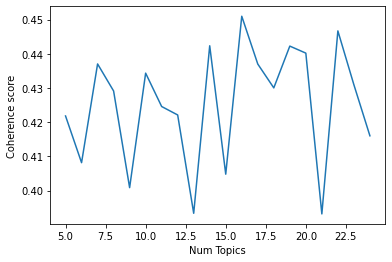

In [18]:
# Show graph
limit=25; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [19]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4218
Num Topics = 6 Coherence:  0.4082
Num Topics = 7 Coherence:  0.437
Num Topics = 8 Coherence:  0.4291
Num Topics = 9 Coherence:  0.4009
Num Topics = 10 Coherence:  0.4343
Num Topics = 11 Coherence:  0.4246
Num Topics = 12 Coherence:  0.4221
Num Topics = 13 Coherence:  0.3934
Num Topics = 14 Coherence:  0.4423
Num Topics = 15 Coherence:  0.4048
Num Topics = 16 Coherence:  0.451
Num Topics = 17 Coherence:  0.437
Num Topics = 18 Coherence:  0.43
Num Topics = 19 Coherence:  0.4422
Num Topics = 20 Coherence:  0.4402
Num Topics = 21 Coherence:  0.3932
Num Topics = 22 Coherence:  0.4467
Num Topics = 23 Coherence:  0.4309
Num Topics = 24 Coherence:  0.416


In [20]:
# Coherence for 16-topic model
print(coherence_values[11])

# Topics for 16-topic model
malletModel_16 = model_list[11]
model_topics_16 = malletModel_16.show_topics(formatted=False)
pprint(sorted(malletModel_16.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA16 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_16)

# Visualize the topics
pyLDAvis.enable_notebook()
vis16 = pyLDAvis.gensim.prepare(MalletLDA16, corpus, id2word, sort_topics=False)
vis16

0.45095732868305205
[(0,
  '0.082*"school" + 0.038*"church" + 0.025*"fact" + 0.021*"number" + '
  '0.020*"teacher" + 0.020*"service" + 0.017*"companion" + 0.016*"question" + '
  '0.016*"pupil" + 0.016*"attention"'),
 (1,
  '0.114*"land" + 0.092*"dollar" + 0.068*"acre" + 0.060*"money" + 0.060*"year" '
  '+ 0.032*"wood" + 0.029*"price" + 0.023*"expense" + 0.019*"lot" + '
  '0.017*"cost"'),
 (2,
  '0.122*"letter" + 0.086*"friend" + 0.067*"time" + 0.059*"girl" + '
  '0.029*"daughter" + 0.024*"spirit" + 0.018*"visit" + 0.017*"walk" + '
  '0.017*"mail" + 0.016*"word"'),
 (3,
  '0.081*"family" + 0.055*"people" + 0.038*"year" + 0.032*"government" + '
  '0.032*"law" + 0.028*"state" + 0.019*"man" + 0.019*"property" + '
  '0.014*"population" + 0.013*"duty"'),
 (4,
  '0.068*"room" + 0.054*"time" + 0.050*"house" + 0.037*"bed" + 0.031*"woman" + '
  '0.030*"door" + 0.027*"hospital" + 0.023*"table" + 0.022*"patient" + '
  '0.019*"case"'),
 (5,
  '0.149*"country" + 0.070*"year" + 0.063*"farm" + 0.039*"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.026836  0.030791       1        1  6.307899
1     -0.280012 -0.077962       2        1  6.496325
2      0.190793 -0.159842       3        1  6.042857
3     -0.182452  0.066514       4        1  6.386258
4      0.105975 -0.182429       5        1  6.232551
5     -0.244205 -0.111349       6        1  6.324698
6      0.182447  0.176839       7        1  6.227373
7      0.010847  0.105444       8        1  6.244621
8      0.168352 -0.028946       9        1  6.146442
9      0.028646  0.109558      10        1  6.432957
10    -0.009509 -0.167354      11        1  6.168997
11     0.058177 -0.122650      12        1  5.932811
12    -0.034315  0.073357      13        1  5.965242
13    -0.107361  0.123978      14        1  6.420020
14     0.090741 -0.107604      15        1  6.374816
15     0.048711  0.271654      16        1  6.296132, topic_info=        Term         Freq        Total Category  logprob  loglift
452  country   839.000000   839.000000  Default  30.0000  30.0000
118     work   773.000000   773.000000  Default  29.0000  29.0000
91       day  1189.000000  1189.000000  Default  28.0000  28.0000
18    letter   659.000000   659.000000  Default  27.0000  27.0000
16      land   663.000000   663.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
4      class    51.375427    98.897540  Topic16  -4.6947   2.1103
97     horse    65.005642   200.082903  Topic16  -4.4594   1.6410
61     woman    67.102598   254.479802  Topic16  -4.4276   1.4322
213   number    49.278471   222.072737  Topic16  -4.7364   1.2597
326      man    45.084558   578.864676  Topic16  -4.8253   0.2127

[1087 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
119       1  0.997816      abide
2142      2  0.933205  abundance
2142     14  0.056558  abundance
204       5  1.011091   accident
167       1  0.997816  accompany
...     ...       ...        ...
84        8  0.030460       year
185       3  0.385836  yesterday
185       7  0.615252  yesterday
3759      2  0.991470       yoke
5263      6  1.000126       youe

[1330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

## LDA Mallet (Nouns & Verbs)

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [22]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(8116 unique tokens: ['annoyance', 'anxiety', 'attend', 'catechism', 'cause']...)


In [23]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -8.96131
<20> LL/token: -8.67726
<30> LL/token: -8.45384
<40> LL/token: -8.29898

0	10	give school work life friend visit time day book read mind meet send church number boy hear year government rest 
1	10	country land year dollar money acre farm pay sell pound person board work month cent winter summer wheat price spring 
2	10	child house day girl call night time bed give buy people hold find room work evening week building morning hand 
3	10	place man day bring walk hour work pass speak reach travel gentleman door eye call turn water follow carry hospital 
4	10	letter write send time feel hear give receive people return week child world find place wife husband account suppose trouble 

<50> LL/token: -8.2063
<60> LL/token: -8.13682
<70> LL/token: -8.09089
<80> LL/token: -8.05581
<90> LL/token: -8.03416

0	10	give work school life mind visit meet read church fear paper n

<160> LL/token: -7.96576
<170> LL/token: -7.95902
<180> LL/token: -7.95505
<190> LL/token: -7.95914

0	8.33333	country year land dollar acre farm money sell pay house month winter pound buy summer grow cent wood tree wheat 
1	8.33333	send write letter give friend life receive time family expect book hear wife feel leave kind health death die trouble 
2	8.33333	school give man number speak church order place mind reach answer travel door gentleman time meet attend hospital begin case 
3	8.33333	bring call man water people pass government head law time carry day body hold foot eat state matter power air 
4	8.33333	work place people town year find pay house business city day arrive settle river office ship money world boat set 
5	8.33333	day child week feel hear girl time boy return fear room walk night morning bed visit give read woman rest 

<200> LL/token: -7.94955
<210> LL/token: -7.94578
<220> LL/token: -7.94643
<230> LL/token: -7.94165
<240> LL/token: -7.93844

0	8.33333	country yea

<210> LL/token: -7.96124
<220> LL/token: -7.95635
<230> LL/token: -7.95239
<240> LL/token: -7.9526

0	7.14286	send write letter hear week give day friend bring receive kind thing health account death trouble month find stay visit 
1	7.14286	school room give speak order place visit number door case show rest time hospital begin answer continue table face wait 
2	7.14286	child time feel family give girl return expect boy remain year woman heart leave morning night wife change live evening 
3	7.14286	day house town time bring board person arrive build travel river ship boat company set make tea require cent offer 
4	7.14286	work place man hand call water find city pass side business head carry hold world body eat matter air village 
5	7.14286	country land year dollar money acre farm pay sell winter pound buy summer grow wood house wheat price spring settle 
6	7.14286	people life work book mind read paper government law husband office interest state idea power copy pay promise study charac

<210> LL/token: -7.99815
<220> LL/token: -7.99766
<230> LL/token: -7.99492
<240> LL/token: -7.98491

0	6.25	letter hear week write friend send family time live expect return find winter receive year child health boy suppose kind 
1	6.25	give hand room time day place meet feel morning remain hold die visit rest lose hour attend call care doctor 
2	6.25	bring child feel girl night heart woman bed life world death husband daughter thing wife weather body draw baby air 
3	6.25	school mind time fear speak read stand answer life case door gentleman follow visit hospital begin fact continue wait receive 
4	6.25	country land dollar year money acre farm pay sell pound buy cent wood board wheat house price purchase farmer wage 
5	6.25	work send water day year give paper pay book foot spring write month remember fall tree grow mine head eat 
6	6.25	man people work give government law number state order idea copy teach character labour form condition class attention turn reach 
7	6.25	place day ho

<160> LL/token: -8.04526
<170> LL/token: -8.04198
<180> LL/token: -8.03402
<190> LL/token: -8.03937

0	5.55556	feel life friend heart give hear wife hand death die woman girl husband kind fear enjoy lose trouble spirit weather 
1	5.55556	bring night water foot day bed call head time body leave air side tree food idea flower grow lead drink 
2	5.55556	day child week school hear family boy return walk remain church morning time account town visit evening stay begin age 
3	5.55556	land country dollar year acre farm sell pound month winter buy summer money wood wheat price farmer employment produce spring 
4	5.55556	send write letter give work receive book read paper time thing live friend mine forget copy suppose promise health mail 
5	5.55556	work pay year find money people government house board business office person interest world situation obtain difficulty property thing move 
6	5.55556	give man place time number order reach expect gentleman girl start travel leave face return under

<110> LL/token: -8.09888
<120> LL/token: -8.0897
<130> LL/token: -8.07626
<140> LL/token: -8.06192

0	5	send write letter child hear feel friend week time family heart wife expect die death health husband kind trouble boy 
1	5	school give time receive rest call mind begin return remain place question change leave boy number understand teacher fear stage 
2	5	life hand speak girl daughter mind hold company continue idea man meet table attend woman promise study teach word notice 
3	5	day bring room house walk night bed foot stand door stay morning side hospital call hour patient face time clock 
4	5	give man work church place time order build follow gentleman case arrive doctor carry return train hour show answer move 
5	5	give book read paper life year time feel visit fear hear bear forget sit lose make copy live remember friend 
6	5	country land year acre farm winter pound buy summer money dollar sell wood wheat price spring purchase live raise farmer 
7	5	work pay dollar money month 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.39058
<20> LL/token: -8.93193
<30> LL/token: -8.64632
<40> LL/token: -8.47871

0	4.54545	write send letter friend book paper suppose feel day life find hear live wife draw health family give world kind 
1	4.54545	day receive week child mind find school interest time require climate offer end read obtain person family change territory eat 
2	4.54545	place people school church work man number law question walk gentleman inhabitant continue study business character world condition class teach 
3	4.54545	time girl send arrive give work hear office return place town letter stage receive read house thing stay bring travel 
4	4.54545	country month work farm winter summer wood land settle purchase wage road farmer labour people town trade house horse mill 
5	4.54545	year land dollar money pay acre sell pound cent buy wheat price farm expense produce cost copy bushel grow hal

<310> LL/token: -8.02697
<320> LL/token: -8.02753
<330> LL/token: -8.02679
<340> LL/token: -8.02359

0	4.54545	send write letter friend hear book kind life wife death heart husband family paper health live forget receive copy daughter 
1	4.54545	year time feel pay expect find receive read account interest mind leave give hand trouble age offer change hope mail 
2	4.54545	people school number law church state mind government study inhabitant teach teacher idea attend character form condition power fact class 
3	4.54545	bring place give time girl remain thing house travel month gentleman stay arrive spend office call difficulty horse turn dress 
4	4.54545	country money winter person month house work summer wood town settle place purchase cut road business wage employment find fall 
5	4.54545	land dollar year acre farm sell pound pay buy money cent country wheat price grow produce cost crop farmer raise 
6	4.54545	child week day hear boy morning night bed feel evening visit return table b

<160> LL/token: -8.07068
<170> LL/token: -8.06398
<180> LL/token: -8.05592
<190> LL/token: -8.052

0	4.16667	life feel write book heart read hand death die paper change year bear forget send flower soul nature trouble talk 
1	4.16667	day night time head call foot eye hour hear fall tree side turn woman air hold horse end play pass 
2	4.16667	give receive visit speak meet time case call interest care hospital doctor copy offer wait patient service attend show train 
3	4.16667	work day man time find hand bring money make live carry thing leave mine place face follow mind save lose 
4	4.16667	letter send child friend write hear week feel girl kind wife boy husband health return stay hope weather daughter baby 
5	4.16667	water state city ship world find body matter require village inhabitant climate food people drink vessel sea party island part 
6	4.16667	room day walk bed fear bring morning stand door evening return table week spend sit clock dinner hour stage dress 
7	4.16667	country la

Mallet LDA: 13 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.47221
<20> LL/token: -8.94667
<30> LL/token: -8.63734
<40> LL/token: -8.45401

0	3.84615	people place country state city world labour village idea employment inhabitant climate office class require field afford farmer grow government 
1	3.84615	land dollar year acre money farm pay country sell pound cent board buy wood wheat price wage month produce cost 
2	3.84615	school number work gentleman begin speak build time town fact teacher teach study stage claim remark pupil face plan stop 
3	3.84615	return visit church give judge lead term government prepare stay break year intend territory play lose war doubt station character 
4	3.84615	book life work find person matter air law read body world pass head carry publish move call heart boy leave 
5	3.84615	call horse work river start building thing bank enter market money drive arrive foot year time answer travel cross na

<260> LL/token: -8.0509
<270> LL/token: -8.04665
<280> LL/token: -8.05382
<290> LL/token: -8.04829

0	3.84615	people country place state city world office employment labour village inhabitant climate property obtain require form employ capital advice idea 
1	3.84615	land dollar acre year farm country sell pound money pay wheat price farmer buy board wood produce crop cost bushel 
2	3.84615	school number place gentleman fact teach teacher stage face remark note hour interest speak pupil church build board territory claim 
3	3.84615	give year return call law time visit company expect remain church government judge prepare lose lead change fear join interest 
4	3.84615	life book heart read work care age matter air mind woman call publish move world story year power picture blood 
5	3.84615	place horse reach travel river man call head start order mine day carry time foot road building drive bank follow 
6	3.84615	money give leave find country account business make arrive return year suppos

<110> LL/token: -8.17535
<120> LL/token: -8.15987
<130> LL/token: -8.14724
<140> LL/token: -8.12974

0	3.57143	bring water place expect return boat thing travel change dinner stage clothe turn clock box stop voice choose night step 
1	3.57143	school give town church arrive visit number evening gentleman day teach teacher remain play call place open pupil leave pleasure 
2	3.57143	people government law state case year office condition mind power receive form meeting party territory population enter interest duty native 
3	3.57143	time day give girl bring answer leave call mine follow remember mention fall claim drive companion expect gold turn cross 
4	3.57143	family house year live month give pay kind health woman spend situation suppose servant half respect bank week summer obtain 
5	3.57143	day stand head door place build walk carry begin start fear side speak foot face understand show horse call fire 
6	3.57143	work man hand time mind find matter hour study move give hold nature lab

<360> LL/token: -8.05747
<370> LL/token: -8.06204
<380> LL/token: -8.0658
<390> LL/token: -8.06857

0	3.57143	bring water walk place table set thing enjoy clock dinner stage drive dress clothe turn climate lie end box person 
1	3.57143	school give number church place build visit remain receive teach teacher day play speak condition open building pupil interest fact 
2	3.57143	people government law state call difficulty property judge form year office party population native member lawyer enter duty press possess 
3	3.57143	day time find give girl call leave answer make mine change fall mention reach claim reason intend gold rest cross 
4	3.57143	year house family live time month give health expect wife week kind suppose situation obtain promise woman respect offer settle 
5	3.57143	man place stand start fear carry understand horse head side rest return distance begin foot turn walk throw follow shoot 
6	3.57143	work hand mind man life thing idea study move time learn matter character p

<160> LL/token: -8.12345
<170> LL/token: -8.11496
<180> LL/token: -8.10638
<190> LL/token: -8.1043

0	3.33333	send write letter hear friend give kind health year paper hope find remember mention live winter snow forget mail leave 
1	3.33333	work day house build town money building time wage situation find river fall lay side fill learn grow set stone 
2	3.33333	speak order reach door gentleman man hospital start walk travel horse train place show answer drive wait follow station turn 
3	3.33333	place city cent business office ship village world inhabitant vessel employ street passenger advice enter steam pass advise give sort 
4	3.33333	land dollar country acre farm year wood wheat price sell farmer money produce buy crop pound bushel cost market purchase 
5	3.33333	week feel book day hear read morning evening stay weather receive return thing visit baby fear walk enjoy promise time 
6	3.33333	bring month save eat tea copy time water fall leave drink clothe summer supply wear bread int

<360> LL/token: -8.04419
<370> LL/token: -8.04461
<380> LL/token: -8.05016
<390> LL/token: -8.04888

0	3.33333	send write letter hear friend kind give health paper find year time hope live mention forget mail remember spring manner 
1	3.33333	work house day town wage building build set money find trade foot lay place stone week earn number coal learn 
2	3.33333	reach man order hospital gentleman speak wait train travel continue answer turn start place follow stage drive horse walk station 
3	3.33333	place business city cent river ship boat office employment find village town inhabitant world give employ advise street bank passenger 
4	3.33333	land country year acre farm dollar wood wheat price buy farmer pound grow sell produce crop bushel raise tree market 
5	3.33333	week book feel day receive evening stay trouble enjoy read walk weather return copy thing promise play dinner fear make 
6	3.33333	bring water month summer winter fall thing save table tea eat cut lie clothe supply bread 

<160> LL/token: -8.12747
<170> LL/token: -8.11785
<180> LL/token: -8.11091
<190> LL/token: -8.11121

0	3.125	school give number visit teacher begin service attend class church note play street pupil open window companion end knowledge boy 
1	3.125	receive time give hear change leave care mind friend year hand feel meet eye heart move soul matter spirit join 
2	3.125	order speak reach room door hospital show train patient question understand stand place stage answer remark continue realize gentleman station 
3	3.125	life night give bed room woman hour remain heart body feel suffer food time lose doctor hold drink bless pass 
4	3.125	family girl hear wife health life feel give husband die daughter year death live remember promise hope flower age bear 
5	3.125	work day business foot man time month make live money trade charge gold stone grow person rate follow piece coal 
6	3.125	dollar pay money sell month pound cent year price farmer board wage employment expense produce cost servant fl

<360> LL/token: -8.05403
<370> LL/token: -8.06085
<380> LL/token: -8.06416
<390> LL/token: -8.06048

0	3.125	school give number study teach teacher begin visit service companion pupil church territory attend play native member boy hold priest 
1	3.125	time receive give feel friend mind change care leave hand fact hear visit move soul end matter read join doubt 
2	3.125	order room reach door hospital speak train patient answer continue understand stage travel show wait sight question station gentleman follow 
3	3.125	life give bed hour night heart remain body woman food room case drink doctor sleep part arm bear suffer side 
4	3.125	family girl give live wife health hear death husband kind life daughter year die trouble hope flower age heart feel 
5	3.125	work day business find man time month foot make mine company trade live gold stone piece follow cut person assist 
6	3.125	dollar money pay year sell pound month country cent board wage employment expense cost situation purchase price 

<160> LL/token: -8.14508
<170> LL/token: -8.14021
<180> LL/token: -8.13279
<190> LL/token: -8.12766

0	2.94118	child feel girl return morning death visit evening trouble night baby bed hope fear bless leave island spirit news send 
1	2.94118	write send letter book hear receive paper give pay read copy sell friend forget publish story thing aunt debt creature 
2	2.94118	day house week town month place summer fall winter business year live intend servant person store country snow make commence 
3	2.94118	school gentleman continue call teach teacher office attend stage year open voice member hold throw step duty dress order service 
4	2.94118	city ship boat water river place tea cent captain vessel provision sea bread passenger person employment advice board article steam 
5	2.94118	give speak visit time hospital wait question train place understand pass answer attention doctor condition notice station territory show case 
6	2.94118	people country state government labour idea law settle f

<360> LL/token: -8.07396
<370> LL/token: -8.07834
<380> LL/token: -8.08082
<390> LL/token: -8.07676

0	2.94118	child week feel girl trouble visit boy evening send thing stay morning bed spend baby fear night return yesterday today 
1	2.94118	write letter send book receive paper give health sell copy hear read pay hope publish forget aunt story pen creature 
2	2.94118	day house place town month winter week summer find make fall country store year spring trade weather snow commence cut 
3	2.94118	school church gentleman office girl call teach teacher attend give open meeting pupil number service member hold supply music order 
4	2.94118	place ship city cent boat river water tea inhabitant village captain provision arrive sea bread vessel passenger advice steam lake 
5	2.94118	give visit place hospital pass train question patient understand speak case wait notice answer station mind condition remark return time 
6	2.94118	people country state government law form labour capital party rise 

<160> LL/token: -8.16123
<170> LL/token: -8.16211
<180> LL/token: -8.14851
<190> LL/token: -8.14769

0	2.77778	man life time case care meet hospital patient woman doctor mind learn save hand leave realize bring sight fire step 
1	2.77778	country money winter pay sell pound month buy summer price farmer live wage cut farm trade cost clothe person market 
2	2.77778	give bring state kind health thing expect receive settle turn change order gold make return deal trouble iron climate call 
3	2.77778	land acre year dollar farm wood wheat grow crop tree produce bushel purchase spring lot raise foot clear seed fall 
4	2.77778	write send letter book read paper receive copy life publish story forget year debt interest truth gain mail word succeed 
5	2.77778	child girl friend send letter feel wife death die heart husband stay daughter write visit yesterday bless age love hope 
6	2.77778	year pay money office company country difficulty captain expense party term month join amount interest possess 

<360> LL/token: -8.09346
<370> LL/token: -8.09746
<380> LL/token: -8.09794
<390> LL/token: -8.0954

0	2.77778	life time meet man case hospital woman care patient visit hand save doctor sight room reason eye bring assist danger 
1	2.77778	country dollar money sell pay winter pound buy month summer price farmer wage market board trade cost settle person servant 
2	2.77778	give time thing bring health change expect receive call return mine make mind hope set trouble gold deal rest kind 
3	2.77778	land acre year farm wood wheat grow produce tree dollar crop spring raise horse purchase bushel clear lot cut kind 
4	2.77778	write send letter book paper read receive copy life publish forget story history pen respect writing trust kindness word draw 
5	2.77778	girl child friend letter send wife heart death die husband feel kind daughter write suffer hear woman year bless age 
6	2.77778	year pay country money office company government difficulty expense interest term party possess amount proceed

<160> LL/token: -8.16175
<170> LL/token: -8.16136
<180> LL/token: -8.15688
<190> LL/token: -8.15841

0	2.63158	child week girl boy bed stay evening baby head yesterday today wear island learn dress age play doctor draw month 
1	2.63158	thing time remain call hear eye head lead suppose account talk remember catch ground join voice regret show step finish 
2	2.63158	give place visit church meet attend time patient answer notice bring remain call number remark show native prepare service person 
3	2.63158	heart enjoy night body woman life air food drink nature grow eat water part blood fill fire pain salt pass 
4	2.63158	write send letter receive hear friend health paper time hope winter promise forget respect news pleasure mention summer manner aunt 
5	2.63158	order man continue sell copy send stage give story open fear owe publish attack lose debt wagon understand term start 
6	2.63158	room turn tree table number train foot sit end dinner street hour station war window travel gold atten


0	2.63158	week child girl boy morning evening stay bed night baby spend dress play yesterday today island learn commence wear afternoon 
1	2.63158	time call thing remain hear head suppose account rest join ground catch remember eye lie voice follow prevent view manage 
2	2.63158	give place church visit attend time patient meet notice number bring remain service fact show answer present follow native treat 
3	2.63158	body enjoy doctor air care food night world change grow drink pass sleep matter eat fire blood pain part fever 
4	2.63158	send write letter hear friend receive kind health hope respect forget month mention mail pleasure paper news remember expect aunt 
5	2.63158	give order meet man gentleman life fear stage understand return continue term start owe attack wagon word travel driver throw 
6	2.63158	room turn house foot table train tree sit hour dinner gold street station reach cover war window hold lady end 
7	2.63158	arrive place boat save return city business vessel pass w

<70> LL/token: -8.31067
<80> LL/token: -8.28004
<90> LL/token: -8.25862

0	2.5	school give speak return teach teacher money meet pupil number office expect receive treat mention word order interest answer address 
1	2.5	work business life find employment set study flower class world employ fill live character give idea obtain serve day strength 
2	2.5	day leave thing bring move stage dress find spirit difficulty clothe box manner open island step catch happen companion child 
3	2.5	call body doctor eat heart air food die drink pass time sleep matter blood head meet continue fever burn hospital 
4	2.5	man give remain call work understand rest reason notice plan iron meet experience opinion wagon head attack point owe fact 
5	2.5	people government state world year form country rise office join property amount war account choose remain term debt end commence 
6	2.5	month winter time summer live fall spring find deal kind expect person suppose leave year health part raise cow field 
7	2.5	

<210> LL/token: -8.13321
<220> LL/token: -8.13355
<230> LL/token: -8.12727
<240> LL/token: -8.12342

0	2.5	school money number give teach teacher receive condition interest pupil answer follow territory member speak treat time office service lawyer 
1	2.5	work find business wage employment idea obtain character trade class employ situation world office learn stranger manufacture advise merchant gain 
2	2.5	house day hand thing bring turn move stage dress play leave expect catch difficulty sort mind happen surprise find hold 
3	2.5	call night body doctor head air food eat hour matter drink heart day pass blood pain fellow power thousand part 
4	2.5	man time work give mine understand meet remain show reach opinion experience attack wagon wait reason mountain feeling offer tribe 
5	2.5	people government state year world property form amount war population owe join debt party press industry rise power country establish 
6	2.5	month live time winter summer health fall expect year suppose sp

<360> LL/token: -8.11092
<370> LL/token: -8.11753
<380> LL/token: -8.1179
<390> LL/token: -8.12116

0	2.5	school number teach teacher give money condition speak interest study pupil territory receive lawyer plan remark member fact office note 
1	2.5	work business dollar day wage employment money find obtain place city trade world class situation man employ character learn board 
2	2.5	house hand day turn table find thing bring move stage dress street sort leave catch view surprise ground play hold 
3	2.5	call heart body doctor air food night pass head drink matter hour sleep part blood pain die carry meet thousand 
4	2.5	man work time give mine reach continue understand meet follow attack wagon reason show start tribe experience danger opinion claim 
5	2.5	people government state world form property law population amount idea war party power year habit press industry conduct join education 
6	2.5	time month live winter summer health fall find suppose leave expect intend weather spring 

<110> LL/token: -8.25066
<120> LL/token: -8.23807
<130> LL/token: -8.22382
<140> LL/token: -8.2129

0	2.38095	send letter write hear receive health kind expect weather mail thing news spirit mention aunt boy friend pleasure month feel 
1	2.38095	find account arrive difficulty respect offer captain store claim supply time world sail lawyer food treat agent idea prospect afford 
2	2.38095	country state year dollar expense produce crop climate pound market tea flour summer settle lake person people bread butter pork 
3	2.38095	school begin man call case teacher number boy judge companion build pupil study prevent speak lead mind afternoon occupy court 
4	2.38095	head call time fall find suppose lose expect manner drink water journey fellow carry life idea pain heat oblige rise 
5	2.38095	time remain meet rest remember fear receive thing table show answer join talk return nature manage attack belong subject promise 
6	2.38095	bring water person ship board clothe vessel sea land passenger s

<260> LL/token: -8.14512
<270> LL/token: -8.14037
<280> LL/token: -8.14276
<290> LL/token: -8.13773

0	2.38095	send letter write hear receive kind time find thing forget friend month mail hope expect news aunt writing mention spare 
1	2.38095	time account find leave arrive boat difficulty party store prospect supply offer deal expense idea town quarter treat lawyer opinion 
2	2.38095	country state pound money dollar summer person climate winter market month tea flour capital produce advantage butter bread profit settler 
3	2.38095	school man number call teacher teach judge pupil speak mind shoot begin condition study priest law companion court prevent prisoner 
4	2.38095	call head day water fall body food drink time manner carry throw eat fellow find pain idea suppose side doubt 
5	2.38095	time expect remain meet thing change fear receive lose talk return rest remember trust join belong promise show attack end 
6	2.38095	bring ship water set person captain vessel provision sea clothe p

Mallet LDA: 22 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.66149
<20> LL/token: -9.04301
<30> LL/token: -8.73054
<40> LL/token: -8.55244

0	2.27273	day water bed ship save time side captain vessel sea bread passenger article provision enter port salt night meat woman 
1	2.27273	dollar land acre farm sell pound cent wheat price country buy farmer year produce cost bushel market purchase clear money 
2	2.27273	place give office rest idea difficulty climate respect party rise year expect doubt grow emigrant enjoy heat irishman religion fortune 
3	2.27273	room order door give eye fear patient hand follow station train understand receive notice pass leave surprise open plain establish 
4	2.27273	work people business find city place state employment wage inhabitant teach board employ class trade population railroad thing character situation 
5	2.27273	month year family winter summer live country health bring servant fall field de

<160> LL/token: -8.19827
<170> LL/token: -8.19534
<180> LL/token: -8.18742
<190> LL/token: -8.18858

0	2.27273	ship water cent tea board captain vessel provision sea bread passenger arrive box article bed store arrival port passage salt 
1	2.27273	land acre farm dollar country pound year wheat price sell farmer buy produce crop wood bushel cost market clear purchase 
2	2.27273	give office idea place difficulty respect offer expect party enjoy meet doubt emigrant year rest climate world remember country district 
3	2.27273	order place time gentleman door remain receive reach train patient station arrive open doctor give leave condition notice fear attention 
4	2.27273	dollar business city work state wage employment find village inhabitant employ class board town trade place advise situation rate population 
5	2.27273	family month year winter live summer health week servant kind field house suppose fall snow weather cut heat son deal 
6	2.27273	book write read paper feel send life sell c

<310> LL/token: -8.15136
<320> LL/token: -8.15527
<330> LL/token: -8.14396
<340> LL/token: -8.15274

0	2.27273	water ship cent store tea boat captain vessel provision bread board sea passenger box sail require article port passage salt 
1	2.27273	land acre farm dollar year country pound wheat sell price buy farmer crop produce bushel market clear cost raise wood 
2	2.27273	find office expect world idea country offer place difficulty give respect party manner emigrant enjoy term character district religion conduct 
3	2.27273	time give order place gentleman train patient answer leave condition station attention door remain notice reach doctor accompany speak word 
4	2.27273	dollar business city wage employment inhabitant state board employ village advise place find rate work situation trade merchant population manufacture 
5	2.27273	month time family winter summer year health live week suppose fall weather account servant snow intend cut leave deal heat 
6	2.27273	book write read paper s

<60> LL/token: -8.37601
<70> LL/token: -8.32992
<80> LL/token: -8.30689
<90> LL/token: -8.27587

0	2.17391	room walk door reach continue order speak stand clock catch cross step fear shoot travel realize throw follow remain breakfast 
1	2.17391	dollar pound buy money pay bring price board cent tea month spring clothe servant person flour bread piece quarter butter 
2	2.17391	people state government law year world form capital call labour interest party manufacture district bear enter country education property independence 
3	2.17391	work day man company horse foot start face find road building coal number roof carpenter court yard stand move pick 
4	2.17391	family house live girl year month leave week offer wife snow place town fall answer regret support store find society 
5	2.17391	expect rest thing death receive remain lose enjoy day nature head health woman care meet join arm blood trouble accept 
6	2.17391	water pass body river air call food drink eat part fire draw man iron side

<210> LL/token: -8.17999
<220> LL/token: -8.18375
<230> LL/token: -8.17793
<240> LL/token: -8.17657

0	2.17391	room walk door order continue stand reach window step shoot side bed sit cross throw realize breakfast occupy prisoner court 
1	2.17391	dollar pay sell money bring board pound cent month tea buy price bread servant piece supply butter thing sugar potato 
2	2.17391	people state government law year party population world property form power press idea education enable constitution prison custom colony character 
3	2.17391	work day man company horse foot build trade find start lay building road hold coal roof carpenter month iron stand 
4	2.17391	house family live year girl time wife leave place week month find summer support town burn offer marry spare snow 
5	2.17391	expect life death remain care thing fall rest day woman meet fear head trouble end arm save join lose enjoy 
6	2.17391	call body air food drink water man head part blood eat fire thousand draw pass matter fellow pa

<360> LL/token: -8.15703
<370> LL/token: -8.16543
<380> LL/token: -8.17085
<390> LL/token: -8.17037

0	2.17391	room walk door stand order reach sit visit bed cross window companion step shoot side speak throw chair realize face 
1	2.17391	dollar bring month cent pound pay sell money board tea buy bread piece thing servant pork price cost butter sugar 
2	2.17391	people state government law form party power population idea world press choose property year education enable prison man measure officer 
3	2.17391	work day man foot company horse build building trade stone lay coal road roof distance paint brick iron yard pay 
4	2.17391	house family year live time girl wife month place week leave offer town find living support snow remember neighbour prospect 
5	2.17391	day life remain expect meet death fall trouble woman care thing save join fear belong rest arm head assist read 
6	2.17391	call body air matter food drink man eat fire head blood draw part thousand night water fellow move hair 

<110> LL/token: -8.27614
<120> LL/token: -8.2733
<130> LL/token: -8.25245
<140> LL/token: -8.23865

0	2.08333	work time mind interest remain find idea condition remember case possess obtain circumstance join learn credit company prove settlement influence 
1	2.08333	hand read man time begin change lose account woman stand creature soul priest progress history bring roof music catch doubt 
2	2.08333	church day place town meet land tree follow prepare question road turn carry native prevent salt fall mountain call scene 
3	2.08333	bring thing arrive boat captain bread sea month box servant provide kind board meat luggage clock sickness serve fish bed 
4	2.08333	feel friend heart child death die daughter life spirit flower trouble bless bear love trial loss comfort husband kind sorrow 
5	2.08333	book write paper work copy life sell publish year age send living debt term truth subject pen bear succeed fortune 
6	2.08333	family house year girl leave place wife give time child town husband m

<260> LL/token: -8.17293
<270> LL/token: -8.17247
<280> LL/token: -8.16716
<290> LL/token: -8.17032

0	2.08333	work mind time remain interest change idea condition possess receive plan succeed find circumstance opinion credit move expect influence determine 
1	2.08333	hand man give time bring lose hold begin face stand woman opportunity die meet doubt roof purpose lie soul priest 
2	2.08333	place day town church meet follow land belong native fact begin turn prepare prevent live possession direction jesuit pleasure residence 
3	2.08333	bring thing tea water bread provision kind box article salt butter bed buy sugar meat provide fish sea servant lbs 
4	2.08333	friend feel heart life death die bear daughter flower suffer bless child rest trouble love trial loss comfort age sorrow 
5	2.08333	book write paper read life copy send work sell publish picture history trust term story pen promise feel debt talent 
6	2.08333	year family house leave give girl time wife woman husband child place mo

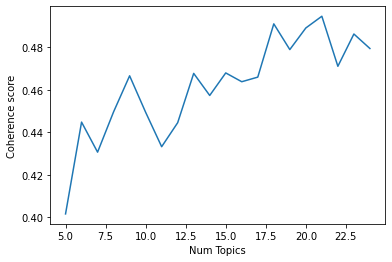

In [25]:
# Show graph
limit=25; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [26]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4016
Num Topics = 6 Coherence:  0.4448
Num Topics = 7 Coherence:  0.4307
Num Topics = 8 Coherence:  0.4497
Num Topics = 9 Coherence:  0.4666
Num Topics = 10 Coherence:  0.4494
Num Topics = 11 Coherence:  0.4332
Num Topics = 12 Coherence:  0.4445
Num Topics = 13 Coherence:  0.4677
Num Topics = 14 Coherence:  0.4574
Num Topics = 15 Coherence:  0.468
Num Topics = 16 Coherence:  0.4638
Num Topics = 17 Coherence:  0.466
Num Topics = 18 Coherence:  0.491
Num Topics = 19 Coherence:  0.4789
Num Topics = 20 Coherence:  0.4891
Num Topics = 21 Coherence:  0.4946
Num Topics = 22 Coherence:  0.4711
Num Topics = 23 Coherence:  0.4863
Num Topics = 24 Coherence:  0.4794


In [27]:
# Coherence for 21-topic model
print(coherence_values[16])

# Topics for 21-topic model
malletModel_21 = model_list[16]
model_topics_21 = malletModel_21.show_topics(formatted=False)
pprint(sorted(malletModel_21.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA21 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_21)

# Visualize the topics
pyLDAvis.enable_notebook()
vis21 = pyLDAvis.gensim.prepare(MalletLDA21, corpus, id2word, sort_topics=False)
vis21

0.4946181206048193
[(0,
  '0.110*"letter" + 0.100*"send" + 0.084*"write" + 0.067*"hear" + '
  '0.033*"receive" + 0.032*"kind" + 0.027*"time" + 0.024*"friend" + '
  '0.019*"hope" + 0.016*"visit"'),
 (1,
  '0.051*"find" + 0.033*"account" + 0.024*"leave" + 0.024*"time" + '
  '0.020*"difficulty" + 0.019*"expense" + 0.017*"arrive" + 0.017*"offer" + '
  '0.016*"party" + 0.015*"opinion"'),
 (2,
  '0.090*"country" + 0.033*"winter" + 0.031*"summer" + 0.029*"pound" + '
  '0.021*"money" + 0.019*"climate" + 0.018*"month" + 0.018*"market" + '
  '0.017*"person" + 0.016*"tea"'),
 (3,
  '0.078*"school" + 0.050*"man" + 0.028*"number" + 0.019*"teach" + '
  '0.019*"teacher" + 0.017*"judge" + 0.015*"mind" + 0.015*"pupil" + '
  '0.014*"study" + 0.012*"begin"'),
 (4,
  '0.028*"head" + 0.028*"fall" + 0.027*"water" + 0.026*"day" + 0.024*"body" + '
  '0.024*"work" + 0.021*"food" + 0.020*"air" + 0.020*"eat" + 0.018*"drink"'),
 (5,
  '0.086*"time" + 0.048*"remain" + 0.036*"meet" + 0.036*"thing" + '
  '0.035*"cha

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.067380  0.201996       1        1  4.729821
1     -0.014665 -0.006646       2        1  4.645033
2     -0.268813  0.028808       3        1  4.817055
3      0.084715 -0.145930       4        1  4.838178
4      0.035022  0.055303       5        1  4.607732
5      0.177948  0.089817       6        1  4.521535
6     -0.046512 -0.043866       7        1  4.689777
7      0.101952 -0.057348       8        1  4.643892
8     -0.075823 -0.188086       9        1  4.806394
9     -0.262621  0.002298      10        1  5.522991
10     0.090257 -0.105148      11        1  4.721312
11    -0.143981 -0.068551      12        1  4.861818
12    -0.074773 -0.015456      13        1  4.627856
13     0.166626 -0.050292      14        1  4.628198
14    -0.008243  0.243403      15        1  4.709745
15     0.103700  0.080403      16        1  4.635766
16     0.067897  0.191878      17        1  4.735643
17     0.124744 -0.160365      18        1  4.889595
18     0.022510 -0.201029      19        1  4.638202
19    -0.216316  0.068784      20        1  4.921848
20     0.068996  0.080028      21        1  4.807609, topic_info=        Term         Freq        Total Category  logprob  loglift
186     work  1109.000000  1109.000000  Default  30.0000  30.0000
132     year  1042.000000  1042.000000  Default  29.0000  29.0000
139      day  1273.000000  1273.000000  Default  28.0000  28.0000
87      give  1285.000000  1285.000000  Default  27.0000  27.0000
26    letter   696.000000   696.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
70      town    65.838830   367.571577  Topic21  -4.5853   1.3153
66      snow    47.321659    99.586490  Topic21  -4.9155   2.2909
25     leave    52.465317   350.751262  Topic21  -4.8123   1.1350
1075     cut    48.350391   149.567632  Topic21  -4.8940   1.9057
77     clock    46.292927   125.905788  Topic21  -4.9375   2.0344

[1603 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3135     11  0.105816      abound
3135     13  0.881801      abound
2801      3  0.988332   abundance
3940      6  1.005657       abuse
4076      7  0.903262  acceptance
...     ...       ...         ...
282      21  1.001828   yesterday
4721     10  0.976186        yoke
6385      1  0.958766        youe
2409     17  0.997434       youth
1360      7  0.903262    yuletide

[2145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

## Increased iterations

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [30]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6778 unique tokens: ['annoyance', 'anxiety', 'catechism', 'child', 'class']...)


In [31]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -8.78988
<20> LL/token: -8.45236
<30> LL/token: -8.24485
<40> LL/token: -8.10566

0	10	child school room girl day life week friend boy heart morning wife hand death husband time bed trouble door daughter 
1	10	time letter day friend woman kind interest case hospital office mind body work call doctor thing health patient head account 
2	10	man people day water world side government state river ship work book company place house number air food life person 
3	10	place work day time business town board city month cent people church boat year employment week wage hand village inhabitant 
4	10	year country land dollar money acre farm house winter pound family wood tree wheat price road spring farmer person crop 

<50> LL/token: -8.01676
<60> LL/token: -7.95541
<70> LL/token: -7.92223
<80> LL/token: -7.89438
<90> LL/token: -7.87278

0	10	child school room girl hand boy heart morn

<560> LL/token: -7.75441
<570> LL/token: -7.75132
<580> LL/token: -7.75519
<590> LL/token: -7.75932

0	10	child week school day room girl hand boy heart night morning bed wife death eye husband visit trouble door evening 
1	10	time letter friend mind day kind life health paper month case head family account interest return thing care woman hospital 
2	10	man book world number water life side government law office ship company body state power age air food matter property 
3	10	work place people day town house business board year city person boat employment church hour thing situation village inhabitant difficulty 
4	10	country year land dollar money acre farm winter pound house summer month cent horse wood tree wheat price road family 

<600> LL/token: -7.75786
<610> LL/token: -7.75371
<620> LL/token: -7.74916
<630> LL/token: -7.75125
<640> LL/token: -7.75391

0	10	child week school room day girl boy hand heart morning night bed death eye husband visit trouble door evening daughter 
1	

<110> LL/token: -7.88598
<120> LL/token: -7.87418
<130> LL/token: -7.86004
<140> LL/token: -7.8536

0	8.33333	day week child school girl boy place morning church account evening town return fact weather service teacher clock word train 
1	8.33333	family friend time life hand room year book wife mind case eye husband visit door trouble care hour hospital death 
2	8.33333	work man place day business house people board city person office number state money foot town village difficulty building question 
3	8.33333	letter time people world thing law government paper interest company rest mine life power patient man answer head end face 
4	8.33333	country year land dollar acre farm money winter pound house month summer cent wood wheat price river boat road spring 
5	8.33333	water heart day kind night health bed side woman daughter ship order body person air food tree tea flower garden 

<150> LL/token: -7.84877
<160> LL/token: -7.84569
<170> LL/token: -7.83941
<180> LL/token: -7.83106
<190> 

<560> LL/token: -7.7735
<570> LL/token: -7.77371
<580> LL/token: -7.7767
<590> LL/token: -7.77794

0	8.33333	child week day time school girl boy morning church evening hour account return place weather town baby call teacher clock 
1	8.33333	time life friend family room hand woman year wife case death eye husband visit trouble gentleman door daughter care hospital 
2	8.33333	work place man people business board city town state house number office person day boat employment fact village building inhabitant 
3	8.33333	letter people book world paper mind thing month government law kind interest company mine power idea time property face end 
4	8.33333	country year land dollar money acre farm winter pound summer month cent house wood wheat price road spring horse farmer 
5	8.33333	day water heart bed side head night foot person ship order body house tea air food health store flower captain 

<600> LL/token: -7.78057
<610> LL/token: -7.77786
<620> LL/token: -7.77181
<630> LL/token: -7.77559

Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -8.98874
<20> LL/token: -8.61335
<30> LL/token: -8.35924
<40> LL/token: -8.19857

0	7.14286	day week letter child time girl thing woman wife evening friend bed weather boat ship kind month clock captain spirit 
1	7.14286	people place world city time state business office town employment village labour inhabitant law air journey person work girl water 
2	7.14286	dollar year money country board wood water government cent family house day body expense wage month pay food person spring 
3	7.14286	man school work room house door church hospital order side number building patient place bank street stage meeting gentleman opinion 
4	7.14286	land country year acre farm winter pound summer horse wheat day tree river price farmer health road crop foot bushel 
5	7.14286	hand time morning place day trouble mind letter company table paper baby return room mine teacher end interest mail 

<410> LL/token: -7.7761
<420> LL/token: -7.77961
<430> LL/token: -7.77878
<440> LL/token: -7.77753

0	7.14286	child week day girl kind bed thing evening boat hour ship time night weather visit store clock tea town dinner 
1	7.14286	people place man world city government town law state office church idea village inhabitant labour character bank business journey class 
2	7.14286	work year house month money family person day dollar water board cent employment body health business wage situation pay food 
3	7.14286	school room man number door case hospital order fact patient mind service teacher gentleman train answer question hour condition companion 
4	7.14286	country land year acre farm winter dollar pound summer horse wood tree wheat price river spring farmer road money foot 
5	7.14286	time letter hand day place morning paper boy trouble return head mine baby interest night end attention table account gold 
6	7.14286	friend life book heart wife death mind eye husband daughter care rest

<810> LL/token: -7.76877
<820> LL/token: -7.76875
<830> LL/token: -7.76026
<840> LL/token: -7.76798

0	7.14286	day child week girl night morning bed town hour evening boat ship fear weather baby visit room store clock dinner 
1	7.14286	people place country man church city world government law state town office idea village inhabitant labour character class journey street 
2	7.14286	work month money house person day water family dollar board cent business year health employment body wage situation pay food 
3	7.14286	school man room number case gentleman door hospital order fact patient teacher train doctor answer question reason condition hour companion 
4	7.14286	land year country acre farm dollar winter pound summer horse wood tree house wheat price spring farmer river road money 
5	7.14286	time letter hand paper thing year place account return rest day interest mine trouble table foot end head gold mail 
6	7.14286	friend life book boy heart wife woman family death eye husband daught

<210> LL/token: -7.85345
<220> LL/token: -7.85462
<230> LL/token: -7.84252
<240> LL/token: -7.84012

0	6.25	time day bed night head account ship idea body air clock trouble character nature captain class world vessel walk today 
1	6.25	country land dollar year acre farm money cent summer wood wheat price road farmer employment wage crop labour bushel lot 
2	6.25	school room case mind hand door time hospital order fact number doctor patient answer service teacher train call attention question 
3	6.25	people work man business city government law interest office world boat power village inhabitant place copy street party advice opinion 
4	6.25	time life year girl boy woman book health letter kind friend rest paper fear mine spirit table mind change eye 
5	6.25	child week letter day friend heart morning wife death husband return evening visit daughter hand weather baby pleasure flower yesterday 
6	6.25	place house family town winter person month church money pound tree year time thing buil

<560> LL/token: -7.80659
<570> LL/token: -7.80702
<580> LL/token: -7.80221
<590> LL/token: -7.80657

0	6.25	day night room time bed head account ship eye body air store clock trouble captain vessel walk today sea dinner 
1	6.25	country land dollar year acre farm money pound cent wood wheat price spring farmer employment wage tree crop bushel market 
2	6.25	school man number door hour hospital room fact order patient answer mind teacher service train attention question case condition companion 
3	6.25	people work city business government law world office state boat man power village place inhabitant character class advice opinion population 
4	6.25	life letter time girl book boy friend health paper mind woman year mine change age word kind copy manner write 
5	6.25	child week day letter friend heart morning wife death husband kind return evening daughter visit fear weather baby care flower 
6	6.25	place house time family year month town winter money summer church thing person building d

<910> LL/token: -7.79185
<920> LL/token: -7.79625
<930> LL/token: -7.79538
<940> LL/token: -7.79109

0	6.25	day time night room bed head hour ship boat body eye doctor water air rest food store clock captain vessel 
1	6.25	country land dollar year acre farm pound money wood tree wheat price farmer employment spring wage crop bushel lot market 
2	6.25	school man number door hospital gentleman fact mind order patient room answer teacher train attention question condition companion case service 
3	6.25	people world work business city government law state office village inhabitant man character bank power class property labour party street 
4	6.25	life girl year book letter boy health hand paper account time woman interest friend mind change age word copy write 
5	6.25	child week letter friend day morning kind wife heart death husband visit trouble return evening daughter weather care fear baby 
6	6.25	place time house family month town year money thing summer church person winter building

<260> LL/token: -7.84641
<270> LL/token: -7.8406
<280> LL/token: -7.84046
<290> LL/token: -7.83239

0	5.55556	year morning woman person road horse house idea account head day baby pay change climate kind half nature distance leave 
1	5.55556	country land dollar year acre farm money pound cent wood wheat state price river boat farmer expense wage employment crop 
2	5.55556	letter child friend girl book boy wife paper husband kind trouble life daughter age flower copy yesterday spirit care visit 
3	5.55556	water day board foot tree person ship tea thing house inhabitant garden ground class vessel provision bread sea stone potato 
4	5.55556	people place church government law evening thing time manner party village captain mind judge population duty loss trust member lawyer 
5	5.55556	time hand life day heart death bed fear mine table clock face gentleman eye pleasure return door stage reason visit 
6	5.55556	week day work family time month town winter house business summer place health mo

<590> LL/token: -7.81415

0	5.55556	day night morning place bed kind evening woman road return head baby change person horse pay clock weather end dinner 
1	5.55556	land country dollar year acre farm money pound wood wheat price farmer employment expense wage crop bushel market river bank 
2	5.55556	letter child friend girl book boy wife paper husband life care daughter trouble age flower copy kind woman mail visit 
3	5.55556	water board person tree boat ship foot tea cent thing garden captain vessel sea bread provision passenger potato piece clothe 
4	5.55556	people country mind government law thing world state idea church matter difficulty character class village party property judge population duty 
5	5.55556	time hand man eye death heart life fear mine table face gentleman soul door word side stage visit reason scene 
6	5.55556	time week year family house place month day town winter money business summer health account situation store snow fall living 
7	5.55556	work man city day o

<910> LL/token: -7.79905
<920> LL/token: -7.80252
<930> LL/token: -7.80342
<940> LL/token: -7.8004

0	5.55556	day child week night morning boy bed girl evening return visit weather room baby change church clock rest dinner yesterday 
1	5.55556	land country dollar year acre farm pound money wood wheat price horse farmer expense wage crop bushel lot market river 
2	5.55556	letter friend book life heart wife paper husband kind woman care daughter trouble girl age flower copy write mail spirit 
3	5.55556	water board foot person tree cent boat ship thing table pay captain vessel sea bread provision passenger tea garden piece 
4	5.55556	people country year government law state world idea person difficulty labour character mind class party property interest opinion population duty 
5	5.55556	man time hand death eye mine mind face life reason hour place gold stage sight door word scene side fear 
6	5.55556	time place house family month year town money winter health summer account week road day

<210> LL/token: -7.88497
<220> LL/token: -7.87729
<230> LL/token: -7.86971
<240> LL/token: -7.86694

0	5	hand life time heart room death eye husband case trouble doctor patient soul condition fear sight flower story judge living 
1	5	dollar acre year land pound cent money tree wheat price spring kind expense crop bushel month lot half board garden 
2	5	man work mind time number order fact mine air place train attention gold meeting station care territory native call plan 
3	5	people place business government law state city office man idea village world inhabitant town bank class party advice property population 
4	5	child family week girl friend time woman thing wife house daughter return face spirit pay health comfort situation aunt prospect 
5	5	school boy morning church room gentleman hour door evening table teacher place clock service question visit dinner pupil stage window 
6	5	water side river head boat place ship employment body world food night board horse hour captain vessel 

<510> LL/token: -7.82252
<520> LL/token: -7.82316
<530> LL/token: -7.82297
<540> LL/token: -7.82703

0	5	hand time heart life case death eye room hospital doctor patient fear visit soul companion care sight man minute arm 
1	5	dollar acre year land pound cent tree wheat price horse spring kind expense month crop bushel half market lot garden 
2	5	work man time place number mind order fact mine train attention reason gold meeting station territory railroad interest wagon opportunity 
3	5	people government law state world office business city idea man inhabitant character power mind population party emigrant property duty bank 
4	5	child friend family girl thing woman week wife time health husband kind house daughter return flower comfort spirit sort picture 
5	5	school boy morning church room gentleman door evening table teacher clock dinner pupil stage place answer hour window call voice 
6	5	water day person boat ship board employment river side body air food place hour captain vessel

<810> LL/token: -7.81898
<820> LL/token: -7.8268
<830> LL/token: -7.82136
<840> LL/token: -7.82035

0	5	hand time heart case death eye life care room hospital doctor patient answer fear soul visit companion hour sight minute 
1	5	dollar acre land year pound tree wheat price horse cent farmer wage crop bushel half market month garden kind pork 
2	5	man place work time number mind order fact mine question train reason attention gold station meeting territory condition native railroad 
3	5	people government law state world office man idea power character business party property population emigrant mind labour lawyer class war 
4	5	child friend family letter girl thing woman time wife kind health husband daughter rest pleasure flower boy spirit news baby 
5	5	school morning room church boy door evening table gentleman teacher clock dinner yesterday service pupil call stage side night return 
6	5	water place city boat ship body board person river village air employment food hour journey hea

<110> LL/token: -7.94707
<120> LL/token: -7.94188
<130> LL/token: -7.92548
<140> LL/token: -7.91041

0	4.54545	school girl time morning church eye number order door teacher change condition companion face meeting pupil territory judge scene service 
1	4.54545	country money year winter summer month wood price spring farmer account weather climate deal market garden bank difficulty kind potato 
2	4.54545	day house place town city cent side water river boat employment building inhabitant store capital street steam population emigrant charge 
3	4.54545	land dollar year acre farm pound money tree horse wheat bushel lot half tea mill expense pork cost flour foot 
4	4.54545	child day family room week boy night wife bed woman visit trouble daughter evening fear baby doctor health time snow 
5	4.54545	letter time friend thing kind book week return paper flower yesterday mail write health fire respect aunt news truth opportunity 
6	4.54545	hand life heart death husband care case hospital fact ta

<370> LL/token: -7.8293
<380> LL/token: -7.82388
<390> LL/token: -7.82649

0	4.54545	school time morning church girl door number order eye teacher service face condition call companion meeting pupil territory scene native 
1	4.54545	country year money winter month summer wood account kind road spring farmer labour climate difficulty health garden trade snow seed 
2	4.54545	place house day town city river boat employment building village water hour inhabitant store journey dollar bank street cent steam 
3	4.54545	land dollar acre year farm pound wheat price tree money crop cent bushel half lot market tea pork cost house 
4	4.54545	child day family week room boy wife bed night woman evening daughter weather doctor trouble baby clock train visit fear 
5	4.54545	letter friend time book thing paper return kind week girl age change flower health yesterday mail write comfort news picture 
6	4.54545	hand life heart case death husband year care hospital interest patient answer friend soul mind 


0	4.54545	school time church girl number door teacher service question condition face companion call pupil meeting territory scene native lady voice 
1	4.54545	country year family money winter month summer health kind account farmer spring climate difficulty manner trade snow fall emigrant respect 
2	4.54545	place house day town city river boat building employment cent dollar village side water inhabitant bank mill journey business distance 
3	4.54545	land dollar acre farm pound year wood wheat price tree money crop horse bushel lot half market garden cost expense 
4	4.54545	child day week boy room morning visit bed evening night daughter fear woman weather doctor baby clock trouble spirit dinner 
5	4.54545	letter time friend thing book paper return kind girl age flower copy pleasure change mail write news word picture aunt 
6	4.54545	hand life heart friend death mind case husband wife care year hospital room interest patient soul answer story living end 
7	4.54545	person day board wa


0	4.54545	school time church door number service teacher condition companion meeting pupil call territory fact native girl lady member order voice 
1	4.54545	country year family month money winter time summer health kind farmer wage pay difficulty manner climate trade snow comfort fall 
2	4.54545	place day town house city river boat cent dollar building employment business village inhabitant side bank mill journey distance street 
3	4.54545	land acre dollar farm year pound wood wheat price tree money road crop bushel house lot half market horse garden 
4	4.54545	day child week room boy morning girl night bed evening visit fear weather doctor baby clock dinner yesterday today island 
5	4.54545	letter book paper time thing friend kind age return account flower copy word mail write pleasure term news picture sort 
6	4.54545	life hand friend heart wife case death husband care hospital mind patient answer soul trouble end daughter living interest trial 
7	4.54545	person board water ship ta

<110> LL/token: -7.95596
<120> LL/token: -7.9439
<130> LL/token: -7.92796
<140> LL/token: -7.92014

0	4.16667	work time woman paper mine head age man story living arm company trust debt lawyer truth success face claim mountain 
1	4.16667	mind gentleman order time call care life day train companion meeting sight stage station rest return lady morning hour fear 
2	4.16667	day place town family church spring village evening inhabitant bank pleasure journey snow opinion railroad emigrant lake field plan iron 
3	4.16667	school people number state law fact teacher class pupil territory judge population duty native building member study company knowledge history 
4	4.16667	world house board city business government office employment idea wage interest situation street people party month arrival sort character rate 
5	4.16667	man month year account day food climate leave person distance walk time word fellow road war wagon head mile opportunity 
6	4.16667	letter week girl book friend boy healt

<360> LL/token: -7.83422
<370> LL/token: -7.83664
<380> LL/token: -7.83787
<390> LL/token: -7.83757

0	4.16667	work time man paper interest woman mine company opinion thing story arm living purpose debt lawyer trust truth claim face 
1	4.16667	mind gentleman order time train call service life companion meeting stage station sight place railroad lady wagon conversation priest position 
2	4.16667	day place family week town church evening village inhabitant return snow today pleasure plan spring point afternoon account lake note 
3	4.16667	school people number state government law teacher fact building pupil territory judge population duty condition native member study question knowledge 
4	4.16667	house world business board city office employment idea wage mind situation month power street party advice sort class rate stranger 
5	4.16667	man month head time day food year account end night word distance rest field walk leave woman body fellow thousand 
6	4.16667	letter girl book health we

<610> LL/token: -7.83504
<620> LL/token: -7.82645
<630> LL/token: -7.83012
<640> LL/token: -7.83639

0	4.16667	work time man woman paper interest account mine reason face opinion story living gold debt lawyer company truth success history 
1	4.16667	gentleman order mind train hour companion life stage sight station meeting time rest railroad lady service wagon conversation priest driver 
2	4.16667	day place family week town church evening house river child weather dinner return snow inhabitant island lake clock distance point 
3	4.16667	school people number government law state fact teacher condition mind pupil territory population building duty question member study native knowledge 
4	4.16667	business board city world office employment house wage idea bank trade situation village month party street advice power mind rate 
5	4.16667	day man time head month body night food end walk horse life company call road thousand pain war rest part 
6	4.16667	letter girl book health friend boy th

<860> LL/token: -7.83485
<870> LL/token: -7.83296
<880> LL/token: -7.83481
<890> LL/token: -7.83037

0	4.16667	work man time paper mind interest mine reason gold thing story company living change lawyer truth success history debt claim 
1	4.16667	time gentleman place train attention order journey companion stage sight station hour service railroad lady wagon conversation priest driver danger 
2	4.16667	day week family place town church morning house evening child weather return dinner snow walk clock island river road afternoon 
3	4.16667	school people number government law state fact teacher mind pupil territory judge duty native member building study knowledge condition population 
4	4.16667	business city world place board house office employment people idea wage village inhabitant bank trade street party advice class character 
5	4.16667	man head day time body month food end night horse air call arm fellow blood field thousand pain war company 
6	4.16667	letter book time boy health 

<110> LL/token: -7.97008
<120> LL/token: -7.96787
<130> LL/token: -7.96274
<140> LL/token: -7.94778

0	3.84615	month kind horse employment city foot world board dinner business mill distance side vessel gold provision seed sort box iron 
1	3.84615	work day week man paper time month mine account copy head company respect trust foot prospect wagon writing reason claim 
2	3.84615	life mind death evening order fear return hand spirit train manner answer soul station stage friend trial picture arm time 
3	3.84615	year house money winter summer time spring thing building crop expense pork end fall store quarter health tree rain lot 
4	3.84615	land dollar acre farm pound cent country wood wheat price boat river farmer wage money bushel market cost flour purchase 
5	3.84615	letter child family friend girl boy heart wife daughter baby husband age health kind write week news loss aunt creature 
6	3.84615	day water place ship labour tree flower church bank tea captain walk island passenger road t

<360> LL/token: -7.85406
<370> LL/token: -7.8521
<380> LL/token: -7.85093
<390> LL/token: -7.85304

0	3.84615	board horse foot thing hour month table place kind journey distance city gold clothe article piece box dinner iron street 
1	3.84615	work day man time month paper week company mine copy term respect prospect account claim pleasure trust coal carpenter business 
2	3.84615	life mind time death order train face hand soul gentleman stage return station nature arm attention mail picture trial spirit 
3	3.84615	year house money town winter summer place spring building health pay account store kind lot fall stone quarter pork amount 
4	3.84615	land dollar acre farm pound country cent wood wheat price year farmer wage crop bushel market mill cost expense flour 
5	3.84615	letter child friend family girl boy wife heart husband daughter age kind write health news aunt creature dress kindness loss 
6	3.84615	water day river boat ship tea tree flower road bank captain vessel walk sea passen

<610> LL/token: -7.84881
<620> LL/token: -7.83067
<630> LL/token: -7.83436
<640> LL/token: -7.84007

0	3.84615	thing board foot horse table hour dinner wage gold street clothe box iron piece kind journey store half tea hotel 
1	3.84615	work book day paper company mine copy account story picture man trust head history sum notice coal pen nature term 
2	3.84615	time life mind death hand hour order gentleman return train soul reason answer stage station fear rest question driver attention 
3	3.84615	year money house month winter summer health town dollar place building pay kind spring account fall stone quarter prospect amount 
4	3.84615	land acre dollar farm pound country year wood wheat price farmer tree crop bushel market mill cost potato seed garden 
5	3.84615	letter child friend family girl heart wife husband daughter kind boy age write news word aunt creature writing son kindness 
6	3.84615	day water cent boat road ship river flower bank deal captain side person vessel sea provision

<860> LL/token: -7.84374
<870> LL/token: -7.83292
<880> LL/token: -7.83378
<890> LL/token: -7.83582

0	3.84615	thing horse hour tea table dollar dinner foot gold street board piece clothe box iron half bread kind dress turn 
1	3.84615	work book paper life mine copy day story company change truth success history time term claim notice sum account picture 
2	3.84615	time life death gentleman woman order hour mind return answer train word question reason soul stage rest station fear voice 
3	3.84615	year house money month winter summer health town building place family account pay kind spring stone pork quarter fall living 
4	3.84615	land acre farm dollar country pound year wood wheat price tree farmer crop bushel lot market mill cost flour potato 
5	3.84615	letter friend child family girl heart wife husband daughter kind age boy woman write news aunt trial writing creature comfort 
6	3.84615	water day cent river boat ship road board side flower captain distance vessel sea provision passe

<110> LL/token: -7.99001
<120> LL/token: -7.98356
<130> LL/token: -7.96788
<140> LL/token: -7.95833

0	3.57143	work man month business time world company mine day thing city end gold street distance bread drink meat character strength 
1	3.57143	room time trouble door bed hand rest morning account table spirit companion side fear walk death fellow thing writing breakfast 
2	3.57143	child school family boy week wife number baby girl teacher church write trial native anxiety return word class tomorrow leave 
3	3.57143	house health tree order body food climate building head side capital matter sort blood labour half soil part minute prospect 
4	3.57143	dollar board cent boat ship employment river wage person bank mill tea servant sea month flour potato pay situation purchase 
5	3.57143	time woman girl eye visit heart air change garden death age scene window news lady aunt pleasure voice world creature 
6	3.57143	mind life time hand case hospital care doctor patient answer fact question co

<310> LL/token: -7.87644
<320> LL/token: -7.87787
<330> LL/token: -7.87369
<340> LL/token: -7.87104

0	3.57143	work man time month business world day company mine gold street kind deal claim character charge job woman boarding city 
1	3.57143	time room hand bed night door trouble fear table spirit rest yesterday face walk morning account visit fellow companion anxiety 
2	3.57143	child family school boy number baby year teacher class church pupil return native trial study knowledge word position tomorrow lesson 
3	3.57143	side water body head air food matter climate tree sort blood river health thousand soil part nature drink heat earth 
4	3.57143	dollar board cent boat ship wage employment person mill captain vessel sea flour city passenger bread tea river steam article 
5	3.57143	girl heart time wife death health daughter eye woman change age visit scene news loss lady aunt voice pleasure creature 
6	3.57143	mind life case time care hospital doctor patient answer service question reas

<510> LL/token: -7.86109
<520> LL/token: -7.85976
<530> LL/token: -7.85832
<540> LL/token: -7.85884

0	3.57143	work man time month day business company world mine gold street wage kind profit claim strength reason carpenter job situation 
1	3.57143	room hand time night bed trouble door fear table morning spirit face yesterday walk side arm fellow visit anxiety servant 
2	3.57143	child family school boy number baby teacher year pupil church study native knowledge mind word position religion tomorrow lesson salary 
3	3.57143	head life body air food matter tree blood nature part pain drink heat side thousand earth health hour hair object 
4	3.57143	dollar board cent boat person ship employment captain vessel city bread water sea flour provision passenger tea steam arrival article 
5	3.57143	girl heart wife woman death daughter time change age eye visit return soul rest scene news trial aunt loss creature 
6	3.57143	time mind case care life hospital fact patient answer doctor question cond

<710> LL/token: -7.86401
<720> LL/token: -7.84515
<730> LL/token: -7.84985
<740> LL/token: -7.84891

0	3.57143	work man month day time business money company mine wage gold world situation claim reason note carpenter job boarding clothing 
1	3.57143	room hand time night bed morning fear table spirit side baby trouble face yesterday walk fellow sort servant anxiety door 
2	3.57143	child family school boy number teacher mind church year time pupil native study trouble position word religion lesson salary knowledge 
3	3.57143	head life body eye air food water nature matter hour blood pain part drink heat change power hair memory object 
4	3.57143	cent board dollar water boat ship employment person tea city captain vessel sea provision flour passenger advice bread article steam 
5	3.57143	friend girl wife heart death woman daughter visit return flower time news scene age trial comfort soul year aunt loss 
6	3.57143	time case mind care hospital fact call patient life answer question service

<910> LL/token: -7.85159
<920> LL/token: -7.85308
<930> LL/token: -7.85679
<940> LL/token: -7.84988

0	3.57143	work man time month day money business company mine wage gold street end claim turn situation note carpenter job boarding 
1	3.57143	room hand time night bed morning trouble fear spirit table baby rest visit walk yesterday fellow door face anxiety window 
2	3.57143	child school family boy church number teacher class pupil time native study knowledge year field music position religion lesson mind 
3	3.57143	head life eye world body air food matter nature side hour blood pain water part drink power arm earth memory 
4	3.57143	dollar cent board boat ship employment person city water captain vessel tea sea provision bread flour passenger article steam lake 
5	3.57143	friend girl wife heart woman death husband daughter year kind flower word news change trial age visit aunt soul return 
6	3.57143	time mind case hospital life patient fact answer doctor service question call condition

<110> LL/token: -8.01965
<120> LL/token: -8.00388
<130> LL/token: -7.98986
<140> LL/token: -7.9679

0	3.33333	law idea word property character world soul nature order difficulty manner year opinion judge time native study stranger power circumstance 
1	3.33333	hand horse door visit eye day teacher morning place companion pupil number minute road time member school wagon man strength 
2	3.33333	man work government people interest office mind street labour hand life matter lawyer success power story history habit coal knowledge 
3	3.33333	dollar business city employment water village world food inhabitant climate tea place bread flour advice lake capital journey head butter 
4	3.33333	school room hospital case doctor gentleman patient train question meeting answer stage station territory attention voice number conversation hour lady 
5	3.33333	child life girl friend heart woman wife boy husband death care age loss music scene sorrow memory face trust fear 
6	3.33333	time mind work return

<310> LL/token: -7.86864
<320> LL/token: -7.87771
<330> LL/token: -7.86935
<340> LL/token: -7.87293

0	3.33333	world law property character idea nature soul word year comfort hand population judge native study party case position prisoner condition 
1	3.33333	hand man eye door place horse teacher room companion walk pupil number sight call fear member wagon road tribe object 
2	3.33333	man people government life mind office interest work power labour duty matter living debt war lawyer success history son industry 
3	3.33333	dollar city cent board place employment water business tea village inhabitant capital bread flour advice steam lake distance pork journey 
4	3.33333	school room hospital number case patient train question answer gentleman doctor attention meeting stage station territory hour voice conversation danger 
5	3.33333	child girl friend life boy heart wife woman death husband daughter care age loss music sorrow memory lesson peace talent 
6	3.33333	time day work visit retur

<510> LL/token: -7.85875
<520> LL/token: -7.85334
<530> LL/token: -7.85885
<540> LL/token: -7.86428

0	3.33333	life world law hand idea character property soul party judge case native population nature study position circumstance court prisoner sort 
1	3.33333	hand man door eye number horse place teacher companion pupil sight wagon distance road driver ground tribe attack scene gang 
2	3.33333	people man government office power state interest member matter labour war duty son success mind knowledge industry support debt education 
3	3.33333	dollar board city cent employment business wage village inhabitant water place boat bread flour advice steam lake rate journey provision 
4	3.33333	school room hospital patient hour answer case train question condition gentleman attention meeting stage service territory fact station doctor interest 
5	3.33333	child girl friend woman heart boy wife life death husband trouble daughter care age trial music sorrow memory lesson peace 
6	3.33333	time day

<710> LL/token: -7.8714
<720> LL/token: -7.86287
<730> LL/token: -7.86283
<740> LL/token: -7.85425

0	3.33333	life law hand world character soul case party judge mind native study stranger position property power nature idea sort court 
1	3.33333	hand man door eye number teacher horse companion place pupil sight road wagon driver tribe attack gang fear distance journey 
2	3.33333	people government man office state year company duty interest matter labour war population debt power success thousand field industry son 
3	3.33333	dollar board cent city boat employment wage business village inhabitant place bread flour advice steam lake rate river town water 
4	3.33333	school room hospital patient fact answer train question attention service condition case doctor meeting stage station gentleman territory hour number 
5	3.33333	child friend girl woman heart wife death husband life daughter care trouble boy age trial music sorrow peace memory piano 
6	3.33333	day time work mind visit return r

<910> LL/token: -7.86543
<920> LL/token: -7.87054
<930> LL/token: -7.86887
<940> LL/token: -7.86962

0	3.33333	life hand mind character law party idea judge native study sort soul position son court prisoner society stranger world case 
1	3.33333	man door hand horse eye place companion pupil stage sight road wagon hour fear driver journey tribe ground attack distance 
2	3.33333	people year government state office man power labour property law population duty war knowledge field thousand debt member success doubt 
3	3.33333	dollar board city cent boat employment business river inhabitant place wage class bread flour provision advice steam village lake rate 
4	3.33333	school room hospital case patient answer teacher doctor train number question condition order interest meeting service territory station attention voice 
5	3.33333	child friend girl heart wife woman life death husband trouble daughter boy care age trial visit music dress sorrow peace 
6	3.33333	day time work place return re

<110> LL/token: -8.0067
<120> LL/token: -7.99059
<130> LL/token: -7.97587
<140> LL/token: -7.95003

0	3.125	school church order fact service teacher attention condition companion mind pupil question territory judge lady voice answer member lawyer conversation 
1	3.125	land dollar acre year money price expense wood lot spring month cost seed purchase quarter sale soil shilling sugar meat 
2	3.125	letter time girl friend visit fear spirit word rest mail change week write term news aunt writing thing today creature 
3	3.125	family people year law state government inhabitant man property world field population money thousand debt governor knowledge end support class 
4	3.125	room house water time bed door case doctor patient side store meeting sight minute street window fire danger chair step 
5	3.125	country farm year winter summer house farmer person situation labour capital servant emigrant respect money land neighbour settler living neighbourhood 
6	3.125	child week day wife boy evenin

<310> LL/token: -7.88702
<320> LL/token: -7.89356
<330> LL/token: -7.88674
<340> LL/token: -7.88427

0	3.125	school church number mind fact teacher question service attention companion pupil territory condition lady call member voice lawyer conversation order 
1	3.125	land dollar acre year money wood price expense lot cost spring seed piece quarter half sale soil amount shilling purchase 
2	3.125	letter friend time girl spirit daughter walk mail write rest week news word visit death aunt writing creature term change 
3	3.125	family people government law state year property world population man duty class debt character power industry field education governor constitution 
4	3.125	room house time bed door hospital table side patient water store station answer woman window fire case sight rest chair 
5	3.125	country year farm house summer winter farmer health person situation money labour capital respect emigrant neighbourhood stock neighbour settler spring 
6	3.125	child day week boy wi

<510> LL/token: -7.87849
<520> LL/token: -7.87197
<530> LL/token: -7.87448
<540> LL/token: -7.87348

0	3.125	school church number fact service teacher condition companion meeting pupil territory lady voice member lawyer judge music position court governor 
1	3.125	land dollar acre money year wood price wheat lot expense cost crop spring seed half quarter pay bushel shilling soil 
2	3.125	letter family friend girl time kind daughter child spirit mail write news aunt word writing rest creature term pleasure son 
3	3.125	people law government state man office year property character world population duty power labour industry debt class study support education 
4	3.125	room time bed house door hospital table patient train case care woman answer sight station order side attention window fire 
5	3.125	country year farm summer winter person house farmer climate health capital situation stock emigrant respect neighbourhood neighbour spring settler labour 
6	3.125	week day child boy morning ev

<710> LL/token: -7.89393
<720> LL/token: -7.88645
<730> LL/token: -7.88177
<740> LL/token: -7.87021

0	3.125	school church number service teacher fact companion condition meeting pupil territory call lady member voice judge lawyer priest position native 
1	3.125	land acre year dollar money farm wood wheat price pound crop house lot cost expense seed purchase bushel pay soil 
2	3.125	letter friend family girl child wife daughter time pleasure kind mail write news comfort aunt writing creature son kindness word 
3	3.125	people law state government man year office world duty war property population character industry class field support education constitution soldier 
4	3.125	room time door bed house hospital hand table patient woman train case order care sight doctor station window question attention 
5	3.125	country year winter summer health kind person spring climate farmer farm stock labour emigrant capital respect neighbourhood neighbour settler fall 
6	3.125	day week child morning b

<910> LL/token: -7.87911
<920> LL/token: -7.88189
<930> LL/token: -7.88464
<940> LL/token: -7.86857

0	3.125	school church number fact service teacher condition pupil territory scene meeting lady member lawyer priest music native call question governor 
1	3.125	land acre year farm dollar money wood pound wheat price farmer crop house lot cost bushel expense seed soil pay 
2	3.125	letter family friend girl child wife kind daughter time mail write news word aunt writing creature son kindness pleasure likeness 
3	3.125	people government law office state man world labour property population year duty power debt war field education soldier prison countryman 
4	3.125	room hand time door hospital table patient answer case train doctor order hour woman care bed sight station attention window 
5	3.125	country year winter summer health person spring climate capital fall emigrant respect market neighbourhood neighbour settler kind advantage comfort settlement 
6	3.125	day week child boy morning e

<110> LL/token: -8.02543
<120> LL/token: -8.01738
<130> LL/token: -8.00027
<140> LL/token: -7.98724

0	2.94118	town dollar business city boat place village class stone station steam native mill day work point luggage building hour hotel 
1	2.94118	day foot side hour evening horse church clock dinner distance companion tree walk morning rest voice wagon mile fear driver 
2	2.94118	school thing board table teacher number pupil bread pay territory piece money expense fact opportunity butter purpose week governor cotton 
3	2.94118	girl boy life time woman mind street matter lady study knowledge music sum note prisoner lesson fact dress college jail 
4	2.94118	room life gentleman door place hand face baby stage head word living position rest danger judge conversation court talk stand 
5	2.94118	book paper work interest manner copy church story party fear prospect truth success kindness sale religion answer physician view power 
6	2.94118	letter friend kind heart time spirit change death chi

<310> LL/token: -7.90227
<320> LL/token: -7.91114
<330> LL/token: -7.9019
<340> LL/token: -7.90068

0	2.94118	dollar business town city cent boat place employment village inhabitant building day mill advice steam bank half luggage merchant irishman 
1	2.94118	foot hour horse road dinner day distance walk tree wagon voice clock coal driver chair breakfast train mountain fire prayer 
2	2.94118	school thing number board hand table teacher money interest town pupil bread piece fact pay turn governor salary supply wage 
3	2.94118	time life girl boy church woman scene lady study knowledge music position prisoner lesson soldier college jail progress instruction memory 
4	2.94118	room gentleman door place hand eye face side bed stage word rest window head danger life light gang trouble stand 
5	2.94118	book work paper copy thing letter account story picture interest trust truth sort success notice sale pen sum power talent 
6	2.94118	letter kind friend death heart trouble change spirit fear wr

<510> LL/token: -7.90504
<520> LL/token: -7.90694
<530> LL/token: -7.91237
<540> LL/token: -7.91272

0	2.94118	dollar business place city boat river employment wage village inhabitant town mill day bank building advice cent steam stone emigrant 
1	2.94118	foot hour horse day road dinner tree walk stage companion distance wagon order voice driver coal minute breakfast journey roof 
2	2.94118	school thing number hand teacher money table board interest pupil fact manner class service governor religion building salary branch meeting 
3	2.94118	time girl boy church life character mind scene study priest knowledge music lesson lady position eye direction soldier college jail 
4	2.94118	room place gentleman door hand bed face head rest eye side window danger fear conversation prisoner gang pleasure plain beauty 
5	2.94118	book paper letter work copy account story picture interest truth history notice success pen term talent matter volume power sale 
6	2.94118	letter heart friend kind death tr

<710> LL/token: -7.91153
<720> LL/token: -7.90331
<730> LL/token: -7.90392
<740> LL/token: -7.89164

0	2.94118	dollar place city business river boat town employment wage village inhabitant cent day mill building stone advice steam bank lake 
1	2.94118	foot hour place horse road tree distance stage gentleman wagon dinner driver coal mountain train attack journey order breakfast roof 
2	2.94118	school thing number hand mind table teacher board pupil class interest manner meeting money ground fact governor religion salary building 
3	2.94118	girl time boy church woman sort character lady study priest music service view knowledge lesson society post scene soldier college 
4	2.94118	room hand place door time bed rest face companion gentleman head eye window fear call danger walk side prisoner gang 
5	2.94118	book work paper account copy thing story picture interest truth success history notice pen term letter illness sum power fortune 
6	2.94118	letter kind heart time death trouble friend b

<910> LL/token: -7.90645
<920> LL/token: -7.90861
<930> LL/token: -7.90898
<940> LL/token: -7.89621

0	2.94118	place dollar city river business town boat employment cent wage village inhabitant board building bank mill house advice steam rate 
1	2.94118	foot horse hour gentleman tree dinner road day distance place stage wagon mile driver journey coal mountain attack roof animal 
2	2.94118	school hand thing number table teacher class mind pupil board interest fact territory meeting turn manner governor salary religion sort 
3	2.94118	time girl boy church character lady study knowledge priest music view scene prayer lesson post soldier voice position college progress 
4	2.94118	room door time place head rest face hand walk bed eye window fear side sight prisoner judge companion talk danger 
5	2.94118	book paper work letter account copy interest story picture truth term fortune sum pen history pay pleasure sale notice success 
6	2.94118	letter time death heart friend kind trouble child ch

<110> LL/token: -8.05145
<120> LL/token: -8.03957
<130> LL/token: -8.02379
<140> LL/token: -8.00746

0	2.77778	water person boat ship deal bank captain vessel sea provision passenger steam article box arrival port luggage sickness salt voyage 
1	2.77778	week day winter health account foot weather tea snow month walk bread piece butter meat likeness spot milk master pig 
2	2.77778	life work heart woman age boy nature opinion story death trial pain trouble sorrow object case prison thought happiness progress 
3	2.77778	time paper letter thing interest work money mail death trust call reason lawyer opportunity writing success claim truth position darling 
4	2.77778	school number fact order teacher companion meeting pupil question territory judge native member study tribe court salary governor possession branch 
5	2.77778	man church person mind case woman duty word soul service priest son attack condition hour mission time sense content neighbourhood 
6	2.77778	place world body village cit

<310> LL/token: -7.92445
<320> LL/token: -7.92597
<330> LL/token: -7.9212
<340> LL/token: -7.9176

0	2.77778	water boat ship person captain vessel sea provision passenger article steam purpose arrival box port luggage salt sickness passage voyage 
1	2.77778	week winter day account weather tea snow walk bread today piece pork fall tree foot butter meat month likeness fish 
2	2.77778	life work boy death heart age woman nature story trial loss world sorrow circumstance power memory thought college prison happiness 
3	2.77778	time paper thing interest money letter mail term spirit lawyer claim notice fortune pen opportunity bank office work return position 
4	2.77778	school number fact teacher pupil meeting territory companion judge native patient member law order court prisoner salary governor lady group 
5	2.77778	church man case service mind reason soul answer word question woman priest duty tribe attack place condition person war son 
6	2.77778	city world body place village food inhabi

<510> LL/token: -7.90858
<520> LL/token: -7.90708
<530> LL/token: -7.9098
<540> LL/token: -7.91422

0	2.77778	water boat ship person captain vessel provision sea passenger thing article bank arrival box port luggage salt passage voyage sickness 
1	2.77778	day week winter weather tea tree walk snow bread today pork piece account foot meat morning ground likeness milk coffee 
2	2.77778	life heart work death age woman nature story trial loss sorrow circumstance memory power sum thought college talent study happiness 
3	2.77778	time money paper thing interest letter work account office term mail debt lawyer opportunity truth claim success pen lesson post 
4	2.77778	school number fact teacher meeting pupil condition companion territory judge native case order law member attention court governor prisoner conversation 
5	2.77778	church man mind reason case service woman sight life answer person soul priest duty son question religion attack tribe return 
6	2.77778	place city world body village

<710> LL/token: -7.91601
<720> LL/token: -7.90943
<730> LL/token: -7.90422
<740> LL/token: -7.89865

0	2.77778	water ship boat thing person captain vessel sea provision passenger article purpose arrival box port luggage salt board bank agent 
1	2.77778	winter week day weather tea tree pork snow walk today bread piece ground foot butter meat fish likeness milk coffee 
2	2.77778	life heart death work woman nature story trial loss truth matter sorrow soul world peace memory power happiness notice thought 
3	2.77778	time money thing interest account paper mail office term debt lawyer opportunity success amount claim pen work pay fortune post 
4	2.77778	school number fact teacher condition companion meeting pupil territory judge native question member conversation attention call governor prisoner salary court 
5	2.77778	church man mind service reason sight case war answer priest group tribe attack religion woman soul ranch trip time sense 
6	2.77778	place city world body village food inhabi

<910> LL/token: -7.90767
<920> LL/token: -7.90376
<930> LL/token: -7.90398
<940> LL/token: -7.89166

0	2.77778	water ship boat person store captain vessel sea provision deal passenger arrival article box thing agent port luggage salt sickness 
1	2.77778	winter week weather tea tree pork snow walk bread today piece foot day butter meat ground view fish likeness milk 
2	2.77778	life heart death work nature world matter husband story trial loss truth friend soul sorrow memory peace power thought sum 
3	2.77778	time money thing interest pay office account mail term debt lawyer letter claim pen experience opportunity subject post doubt amount 
4	2.77778	school number teacher condition fact pupil territory judge native member class question companion court governor prisoner conversation salary physician attention 
5	2.77778	church mind man reason answer sight person service life war priest eye group case tribe attack religion meeting trip ranch 
6	2.77778	city place world body village food i

<60> LL/token: -8.17994
<70> LL/token: -8.13323
<80> LL/token: -8.09219
<90> LL/token: -8.05121

0	2.63158	room hand eye time table pay door service purpose interest step writing rent yesterday turn attention surprise mission manner piano 
1	2.63158	letter health week friend kind death morning weather trouble spirit return flower news arm aunt kindness tomorrow time word likeness 
2	2.63158	body night air food change head blood thousand iron power pain rain drink hair sleep climate earth amount degree tobacco 
3	2.63158	place city people dollar employment village inhabitant trade world labour advice population work building point irishman hotel mill experience support 
4	2.63158	school number law state teacher fact government pupil territory native condition member study knowledge meeting priest class court mind education 
5	2.63158	water cent river boat board ship store day tea pork captain vessel provision island sea flour passenger steam arrival person 
6	2.63158	case hospital care 

<210> LL/token: -7.94916
<220> LL/token: -7.94252
<230> LL/token: -7.93461
<240> LL/token: -7.93102

0	2.63158	room hand time eye mind table door face pay purpose writing meeting service order pleasure talk step yesterday surprise piano 
1	2.63158	letter friend health kind spirit time flower morning mail news return death respect word aunt pleasure leave kindness likeness painting 
2	2.63158	body night head air food morning arm blood iron fever pain change rest thousand rain fellow part earth drink climate 
3	2.63158	city dollar place employment village state river inhabitant bank advice mill population world office labour people lake merchant irishman point 
4	2.63158	school law number government teacher fact pupil territory native condition study member priest duty state music court governor boy class 
5	2.63158	water cent boat ship store pork captain person vessel tea sea provision passenger arrival article steam board pound port butter 
6	2.63158	time case hospital doctor patient t

<360> LL/token: -7.90944
<370> LL/token: -7.90894
<380> LL/token: -7.90516
<390> LL/token: -7.90586

0	2.63158	room hand mind door eye time table order face purpose step spirit pleasure window yesterday trouble surprise piano turn talk 
1	2.63158	letter friend health kind death flower mail write return news respect aunt picture pleasure time leave word writing rest kindness 
2	2.63158	body food air head night arm blood fellow fever power pain drink iron climate nature sleep object matter stomach heart 
3	2.63158	dollar city state business employment office village inhabitant place bank river mill people advice population lake class merchant irishman district 
4	2.63158	school law fact teacher government number pupil territory condition native member study duty priest music tribe governor salary constitution college 
5	2.63158	cent water boat ship store tea vessel captain sea passenger pound steam provision person article arrival pork port sugar butter 
6	2.63158	time case hospital pati

<510> LL/token: -7.90312
<520> LL/token: -7.90023
<530> LL/token: -7.901
<540> LL/token: -7.8968

0	2.63158	room hand door eye table mind face hour order spirit window time chair step turn surprise scene parent car piano 
1	2.63158	letter friend health kind flower pleasure return time write account mail news aunt writing death word kindness likeness line prospect 
2	2.63158	body air night food head matter fellow blood iron fever pain arm drink nature sleep part object climate rain hair 
3	2.63158	city employment place village inhabitant business office state bank dollar world advice mill population lake merchant irishman river class capital 
4	2.63158	school law number fact teacher government mind pupil territory condition duty native priest member music study tribe governor salary question 
5	2.63158	water boat cent ship store captain vessel provision bread sea tea passenger arrival person article port sugar pork luggage salt 
6	2.63158	time case hospital patient train attention docto

<660> LL/token: -7.89594
<670> LL/token: -7.89182
<680> LL/token: -7.89409
<690> LL/token: -7.88978

0	2.63158	room hand door eye table time mind face window hour scene turn chair order step stand spirit surprise dinner parent 
1	2.63158	letter friend health kind flower return mail time account write news pleasure aunt living writing word likeness kindness painting leave 
2	2.63158	night head body air food matter blood arm pain fellow drink hair earth object nature sleep heart stomach animal part 
3	2.63158	city state people place village inhabitant office employment business bank mill advice population lake world number river irishman district merchant 
4	2.63158	school law government number teacher pupil condition territory fact native duty member mind interest study character salary governor education branch 
5	2.63158	water boat ship cent tea captain vessel provision sea passenger bread arrival store person pound pork port sugar butter article 
6	2.63158	time case hospital place pa

<810> LL/token: -7.8946
<820> LL/token: -7.89329
<830> LL/token: -7.89478
<840> LL/token: -7.89976

0	2.63158	room hand door eye table hour walk scene window time dinner order turn chair prayer step face mind stand breakfast 
1	2.63158	letter friend health kind pleasure return flower mail write thing time news death word aunt writing account kindness leave likeness 
2	2.63158	body air food head matter night arm fellow blood pain fever drink heart hair nature part sleep object stomach animal 
3	2.63158	city state people village place business office inhabitant mill advice employment population lake bank boat merchant town irishman district world 
4	2.63158	school number mind fact law teacher condition pupil territory duty native member study interest tribe governor salary government education branch 
5	2.63158	water cent ship store person captain tea vessel boat passenger sea provision article arrival bread pork port sugar butter salt 
6	2.63158	time case hospital doctor patient train a

<960> LL/token: -7.88461
<970> LL/token: -7.88312
<980> LL/token: -7.88284
<990> LL/token: -7.88388

0	2.63158	room hand door eye table mind time hour walk window scene order bed dinner music step lady prayer chair turn 
1	2.63158	letter friend health kind flower return mail write news living aunt rest death writing thing time opportunity likeness kindness pleasure 
2	2.63158	body night air food head arm fellow blood pain drink rain matter fever sleep heart strength earth nature object stomach 
3	2.63158	city place people state inhabitant village business town bank advice population world mill office lake employment class point merchant irishman 
4	2.63158	school mind fact teacher number pupil law territory duty member condition native interest tribe governor salary lawyer education study college 
5	2.63158	cent water ship captain boat vessel sea provision bread tea passenger person arrival article port sugar butter agent luggage salt 
6	2.63158	time case hospital patient doctor answer

<110> LL/token: -8.0638
<120> LL/token: -8.05806
<130> LL/token: -8.03814
<140> LL/token: -8.01544

0	2.5	life heart world mind nature soul death woman trust truth habit memory feeling book peace earth power knowledge industry emigration 
1	2.5	hand time mind case care hospital order doctor patient eye voice arm history service meeting call roof story fellow message 
2	2.5	foot horse wood tree house road flower garden ground lot spring coal grass timber piece call brick yard mountain pig 
3	2.5	work man building town business character station fact plan attention wagon lawyer profit irishman conversation interest face job stone governor 
4	2.5	school girl daughter thing child teacher pupil class news number success music dress painting soldier hope thought salary picture darling 
5	2.5	place gentleman rest train journey visit hour stage railroad word driver danger hotel point group attack note native newspaper direction 
6	2.5	land acre year farm country wheat price dollar farmer crop 

<260> LL/token: -7.96289
<270> LL/token: -7.95618
<280> LL/token: -7.9498
<290> LL/token: -7.93905

0	2.5	life heart mind death soul nature world power trust truth habit feeling memory woman peace circumstance thought happiness society soldier 
1	2.5	hand time case care hospital order doctor patient mind eye answer meeting call service voice fire history roof question message 
2	2.5	foot horse tree house wood road flower garden stone fellow half iron coal grass lot fruit brick ground piece spot 
3	2.5	town work man building business character money interest attention lawyer plan face pay expense fact note governor job physician condition 
4	2.5	school girl thing daughter number teacher class pupil news native music territory situation salary condition ground talk painting position hope 
5	2.5	gentleman place time hour rest train word stage journey station railroad priest driver danger hotel visit attack woman newspaper plain 
6	2.5	land country acre farm year wheat price farmer crop po

<410> LL/token: -7.93261
<420> LL/token: -7.93835
<430> LL/token: -7.94288
<440> LL/token: -7.9331

0	2.5	life heart death mind hand world nature soul power truth trial habit sorrow circumstance memory woman peace feeling soldier thought 
1	2.5	time case hospital order care doctor patient attention service meeting answer question call fire mind voice eye hand physician message 
2	2.5	house horse foot tree wood road flower garden day stone piece lot coal length fruit grass half river brick spot 
3	2.5	money man town building interest work mind fact pay face plan lawyer business note roof incident instruction period warrant trade 
4	2.5	school girl number teacher class pupil territory native knowledge thing study music position sort fact salary branch college situation character 
5	2.5	place gentleman train journey time stage station railroad word wagon rest priest driver hotel tribe hour distance attack trip carriage 
6	2.5	land acre year country farm wheat farmer pound crop bushel doll

<560> LL/token: -7.91999
<570> LL/token: -7.9262
<580> LL/token: -7.91653
<590> LL/token: -7.92592

0	2.5	life heart death mind hand world nature soul woman trial truth comfort trust sorrow habit power spirit peace feeling memory 
1	2.5	time case hospital order doctor patient care service attention call answer question fire minute mind voice physician residence charge meeting 
2	2.5	house horse wood tree foot road water garden flower stone piece half ground coal length grass mill fruit side spot 
3	2.5	money man house building time work mind interest fact pay town face plan lawyer expense governor note roof incident period 
4	2.5	school number girl church teacher class pupil territory native study condition knowledge music position fact salary meeting mission college member 
5	2.5	place gentleman man train hour stage station railroad journey wagon time driver hotel group tribe attack distance gang experience rest 
6	2.5	land year acre farm country wheat farmer pound crop price bushel s

<710> LL/token: -7.9318
<720> LL/token: -7.92791
<730> LL/token: -7.93097
<740> LL/token: -7.91732

0	2.5	life heart hand death mind year soul world comfort nature trial woman truth sorrow feeling peace power happiness strength beauty 
1	2.5	time case hospital care doctor patient order attention question answer meeting voice person condition call hour minute physician conversation stranger 
2	2.5	foot horse tree wood house road flower garden side stone water seed river half coal grass fruit piece yard spot 
3	2.5	money time work mind building interest difficulty house expense face plan lawyer fact pay governor note man roof incident credit 
4	2.5	school church number teacher pupil girl territory fact native service study class priest music position salary knowledge college mission instruction 
5	2.5	place gentleman man train time stage station railroad hour journey wagon driver danger group tribe woman attack distance gang trip 
6	2.5	land year acre farm country wheat farmer crop bushe

<860> LL/token: -7.91402
<870> LL/token: -7.91293
<880> LL/token: -7.91177
<890> LL/token: -7.91207

0	2.5	life heart hand death mind soul woman trial comfort change sorrow world strength matter peace power nature feeling thought spirit 
1	2.5	time case hospital care doctor patient answer question order call voice person attention stranger meeting step service minute residence meet 
2	2.5	horse tree foot road wood garden flower water stone side mill river lot half ground house coal grass mile brick 
3	2.5	money house town mind building pay interest difficulty time expense plan lawyer fact work governor roof note face credit effect 
4	2.5	school church number teacher pupil girl fact native class study territory member service priest music condition salary knowledge branch college 
5	2.5	gentleman place time train man stage journey wagon railroad driver rest group tribe hour attack station gang return trip mountain 
6	2.5	land acre year farm country wheat farmer pound crop dollar price b

Mallet LDA: 21 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.48363
<20> LL/token: -8.86953
<30> LL/token: -8.56037
<40> LL/token: -8.40403

0	2.38095	hand mind death interest horse order time pupil family call ground thousand claim character lawyer memory member conversation sort message 
1	2.38095	foot side tree head walk street thing companion voice time strength hour prisoner light grass quality turn reason clock clothe 
2	2.38095	country winter month summer farmer wage weather family wood labour servant pork town snow spring year fall day deal heat 
3	2.38095	man work life world body law war part people shilling mind trust nature sorrow stomach jail miner supply form sense 
4	2.38095	house work building money distance town opinion iron water fire plan case matter pen rent roof mile brick job question 
5	2.38095	friend year kind train paper comfort news spring cattle opportunity feeling leave interest incident trip animal pl

<160> LL/token: -8.00104
<170> LL/token: -7.99523
<180> LL/token: -7.98707
<190> LL/token: -7.98162

0	2.38095	hand mind time interest call condition matter attention order lawyer sort minute group tribe animal message meet object credit conversation 
1	2.38095	foot head tree side road walk voice scene ground street length grass companion number prisoner bed spot strength jail inch 
2	2.38095	month winter country summer horse spring weather wage day servant snow pork town fall climate wood year heat rain oats 
3	2.38095	work man life nature soul pay business trust world carpenter war stomach mind sense wealth form part artist whiskey fact 
4	2.38095	house place town money building store lot distance plan stone thing agent opinion work roof iron brick order carriage boarding 
5	2.38095	friend life time year paper death train age kind opportunity end leave kindness question incident trip address term instruction uncle 
6	2.38095	day night hour morning bed baby rest clock window week prie

<310> LL/token: -7.9373
<320> LL/token: -7.94116
<330> LL/token: -7.93494
<340> LL/token: -7.92953

0	2.38095	hand mind interest time order call attention face lawyer conversation character tribe group object condition message animal credit matter success 
1	2.38095	foot head tree road side walk scene door voice length prisoner rest spot mountain light ground jail round mile car 
2	2.38095	day winter summer horse month spring town weather pork snow country wood fall climate pleasure neighbourhood quarter rain deal heat 
3	2.38095	work man life world soul nature business trust pay war feeling carpenter form sense whiskey truth point workman turn silence 
4	2.38095	house place money town building store lot distance day stone iron plan roof brick carriage boarding agent fire order business 
5	2.38095	friend year life kind paper death leave end age term opportunity trip incident address uncle content living answer plant favor 
6	2.38095	day night hour bed baby week train time rest morning 

<460> LL/token: -7.91534
<470> LL/token: -7.9228
<480> LL/token: -7.91366
<490> LL/token: -7.92128

0	2.38095	hand time mind interest call face order lawyer companion subject group tribe conversation animal credit piano message camp dog incident 
1	2.38095	head foot tree side garden walk door half hour length mountain prisoner scene voice street fellow mile step spot rest 
2	2.38095	day winter summer horse spring weather month climate pork snow pleasure quarter fall wood town time rain heat deal pay 
3	2.38095	work man life nature soul world trust pay war business success feeling carpenter sense arrangement form artist leg description silence 
4	2.38095	house place money town building road store distance stone plan ground roof brick order agent gentleman iron wagon story mud 
5	2.38095	year friend kind life death leave living opportunity term end age trip loss spirit doubt view address world uncle paper 
6	2.38095	day night time hour bed baby train week morning arm word priest pain sle

<610> LL/token: -7.92719
<620> LL/token: -7.90979
<630> LL/token: -7.91677
<640> LL/token: -7.92252

0	2.38095	time hand mind interest call face order spirit lawyer conversation group subject matter residence message credit animal piano attention purpose 
1	2.38095	foot head tree side door garden walk scene voice rest mountain view length prisoner street spot jail mile road distance 
2	2.38095	winter summer day horse month time weather spring climate town snow pork fall deal pay change health rain heat pleasure 
3	2.38095	work man life nature soul reason fire war feeling pay trust sense success favor request artist beauty leg workman drop 
4	2.38095	place house town building money road gentleman plan ground stone store distance roof brick order carriage lot wagon agent mud 
5	2.38095	year friend letter kind health life death living leave respect aunt opportunity news trip neighbour loss uncle acquaintance bear write 
6	2.38095	day night time hour baby train fear morning arm priest rest

<760> LL/token: -7.92644
<770> LL/token: -7.9174
<780> LL/token: -7.92346
<790> LL/token: -7.91866

0	2.38095	hand time mind interest order call face companion conversation lawyer group purpose message death matter piano camp dog animal promise 
1	2.38095	head foot side tree garden door scene walk fellow voice distance street length step prisoner mile spot jail number car 
2	2.38095	time day winter summer horse month weather spring snow fall climate health heat pleasure rain change wood town degree pig 
3	2.38095	man work life mind soul nature reason fire feeling doubt trust war beauty sense success favor end request artist generation 
4	2.38095	place house town building road ground stone plan wagon store gentleman brick money roof carriage iron charge mud distance workman 
5	2.38095	letter friend year kind health spirit write news respect aunt return leave opportunity kindness living likeness writing deal address acquaintance 
6	2.38095	night time day hour rest morning fear train word

<910> LL/token: -7.91524
<920> LL/token: -7.9183
<930> LL/token: -7.92018
<940> LL/token: -7.91306

0	2.38095	hand time mind call interest order face death spirit lawyer companion matter message piano warrant camp light dog residence play 
1	2.38095	foot head side tree walk scene door voice view turn street length distance step prisoner ground garden spot mountain mile 
2	2.38095	day winter time summer month horse spring weather snow pleasure climate fall pay change town rain heat road pig degree 
3	2.38095	man work life soul mind reason eye nature fire character change feeling trust end doubt beauty war sense favor artist 
4	2.38095	place house town building road store wagon gentleman plan stone roof agent brick direction charge order mud material workman carriage 
5	2.38095	letter friend kind year health write return news living deal respect aunt opportunity likeness answer kindness neighbour line writing acquaintance 
6	2.38095	time night day hour rest stage railroad word driver jou

<60> LL/token: -8.22926
<70> LL/token: -8.18912
<80> LL/token: -8.15104
<90> LL/token: -8.12364

0	2.27273	government city place people world village inhabitant law company advice office capital railroad study war merchant journey irishman governor power 
1	2.27273	ship world water vessel sea people island passenger captain arrival person iron thousand fever emigrant agent port head company sickness 
2	2.27273	cent day board boat employment wage servant month pork store provision flour river business rate steam week luggage salt meat 
3	2.27273	land acre farm year dollar wheat wood crop bushel market farmer money price tree lot country soil shilling expense pound 
4	2.27273	day church place foot horse side word distance coal purpose hair gang evening yard group car mountain miner work time 
5	2.27273	letter friend heart death visit daughter spirit wife soul news husband life nature writing write time sorrow trust regret hand 
6	2.27273	letter book year friend age boy copy family pay he

<210> LL/token: -8.0008
<220> LL/token: -7.99575
<230> LL/token: -7.98915
<240> LL/token: -7.98526

0	2.27273	people city government world law inhabitant village office advice state war power irishman railroad journey newspaper merchant class party press 
1	2.27273	water ship world captain vessel sea provision passenger article iron person port agent fever purpose sickness salt arrival voyage fish 
2	2.27273	dollar cent board boat employment wage store month day pork flour steam lake rate luggage servant river good lbs labourer 
3	2.27273	land acre farm year dollar wheat wood farmer crop bushel lot price seed soil shilling cattle tree timber potato barrel 
4	2.27273	day church foot head horse side mine tree river distance time company coal mountain length stand number yard mill place 
5	2.27273	letter friend heart death life spirit write news time writing sorrow soul likeness kind darling trip change husband vicker hope 
6	2.27273	book work age year copy study history story boy nature 

<360> LL/token: -7.93996
<370> LL/token: -7.94281
<380> LL/token: -7.93432
<390> LL/token: -7.93903

0	2.27273	people government state law inhabitant world city population power war office irishman village journey advice thousand bank newspaper constitution duty 
1	2.27273	water ship person captain vessel sea passenger provision article arrival port agent salt voyage world fish sickness piece description purpose 
2	2.27273	dollar cent board boat employment wage business month city servant steam store day rate good luggage lake mechanic profit job 
3	2.27273	land acre farm year wood wheat dollar farmer crop bushel seed lot soil shilling expense price cattle timber rent grain 
4	2.27273	day foot side river mine tree horse distance head company time mill coal mile mountain number stand yard length car 
5	2.27273	letter friend heart death kind trouble write spirit news trial loss writing sorrow opportunity darling word likeness vicker aunt promise 
6	2.27273	book paper life work copy story

<510> LL/token: -7.91877
<520> LL/token: -7.9091
<530> LL/token: -7.91737
<540> LL/token: -7.91624

0	2.27273	people government state law office world population war bank power city company education newspaper matter party press officer custom colony 
1	2.27273	water ship person store captain vessel sea passenger article provision box fever arrival port end salt world voyage purpose sickness 
2	2.27273	dollar cent business board boat city employment wage month servant inhabitant advice steam journey rate lake profit hour luggage merchant 
3	2.27273	land acre farm year wood dollar wheat farmer crop price seed bushel lot cost soil shilling expense cattle grain rent 
4	2.27273	day foot side horse river tree mine water mill distance coal mile length mountain company yard stand car miner inch 
5	2.27273	letter friend heart death kind spirit write trouble news trial writing sorrow peace likeness darling word vicker aunt world blessing 
6	2.27273	book paper life work copy story study truth hi

<660> LL/token: -7.91343
<670> LL/token: -7.91284
<680> LL/token: -7.91691
<690> LL/token: -7.9189

0	2.27273	people government state law world population war power office property education party prison duty press officer custom city majority colony 
1	2.27273	water ship person captain vessel provision store sea passenger arrival box board port sickness salt company article voyage fever fish 
2	2.27273	dollar cent business city boat employment wage board journey inhabitant advice village month steam rate servant lake luggage bank hour 
3	2.27273	land acre farm year dollar wheat farmer wood crop bushel price seed stock cost soil lot cattle grass farming shilling 
4	2.27273	day foot side river tree mine water horse mill distance company mile wood half coal mountain quarter view length yard 
5	2.27273	letter friend heart death kind trouble write news trial aunt writing creature sorrow comfort likeness peace darling vicker loss word 
6	2.27273	book paper life work copy study truth story h

<810> LL/token: -7.92042
<820> LL/token: -7.92377
<830> LL/token: -7.9258
<840> LL/token: -7.93003

0	2.27273	people government state law world population war office duty power education prison countryman property press custom colony officer party member 
1	2.27273	water ship captain vessel sea company passenger provision article arrival box person end clothe port world salt sickness good passage 
2	2.27273	dollar cent city business boat board employment wage village inhabitant advice steam rate servant bank office luggage merchant month lake 
3	2.27273	land acre farm year dollar wheat farmer crop wood cost bushel price seed lot stock soil shilling expense market cattle 
4	2.27273	foot day tree side horse road river water mine distance half wood mile mill coal mountain length yard stand place 
5	2.27273	letter friend heart death time kind write news aunt creature writing sorrow world word trial trouble opportunity peace likeness darling 
6	2.27273	book paper life copy work picture trut

<960> LL/token: -7.92933
<970> LL/token: -7.93048
<980> LL/token: -7.92166
<990> LL/token: -7.91311

0	2.27273	people government state law world population war office property power education prison party duty press officer custom countryman majority wealth 
1	2.27273	ship water company captain vessel sea passenger clothe box person provision arrival port salt agent sickness passage voyage end board 
2	2.27273	dollar cent city boat business employment wage village board inhabitant month advice steam lake luggage merchant office journey job rate 
3	2.27273	land acre farm year dollar wheat farmer wood crop bushel price seed cost lot soil shilling market cattle grain tree 
4	2.27273	day foot side horse river road tree water half distance mill mile coal number bank length wood mountain yard stand 
5	2.27273	letter friend heart death kind time write world news trial writing creature spirit sorrow likeness loss peace rest happiness word 
6	2.27273	book paper work life copy story truth histor

<110> LL/token: -8.0553
<120> LL/token: -8.05411
<130> LL/token: -8.02488
<140> LL/token: -8.00475

0	2.17391	life day work account man power world truth history coal company description stand car clearing yard sheet read battle author 
1	2.17391	land acre year farm country dollar wood wheat farmer price crop bushel seed cow shilling stock cattle cost barrel oats 
2	2.17391	bed death heart body food matter trouble arm night snow blood pain head rain drink memory sleep stomach heat degree 
3	2.17391	child letter boy friend baby week write heart mail aunt news writing fear word tomorrow likeness darling college painting vicker 
4	2.17391	pound cent water tea person pork sea provision article port sugar butter potato meat salt beef lbs voyage flour fish 
5	2.17391	work business man horse hand clothe change strength purchase carpenter support job favor wealth profit card soul boot water knife 
6	2.17391	school church teacher number condition interest pupil territory class lawyer law judge 

<260> LL/token: -7.96126
<270> LL/token: -7.96133
<280> LL/token: -7.95734
<290> LL/token: -7.94411

0	2.17391	life world power death account nature truth trust coal soul earth description doubt car day stand feeling picture work clearing 
1	2.17391	land acre farm country year dollar wheat farmer price wood crop bushel market stock cow shilling cattle timber horse grain 
2	2.17391	bed night body air food head hour arm matter blood pain heart part drink sleep fire eye stomach disease degree 
3	2.17391	letter child heart boy baby friend mail write news aunt trouble writing word fear tomorrow likeness darling college vicker hope 
4	2.17391	pound water tea pork provision bread sea person cent article butter sugar salt meat voyage clothe flour beef fish lbs 
5	2.17391	work man business horse hand woman strength wood carpenter half master change favor wealth sell card workman lordship maker basket 
6	2.17391	school church teacher pupil interest territory duty service meeting class member off

<410> LL/token: -7.94856
<420> LL/token: -7.94944
<430> LL/token: -7.94663
<440> LL/token: -7.94085

0	2.17391	life death power idea world nature account trial day trust soul coal description stand doubt earth feeling thought car truth 
1	2.17391	land acre farm country year wheat dollar wood farmer price pound crop bushel market shilling stock cattle lot cow timber 
2	2.17391	bed body night air food arm blood matter pain part drink head sleep heart stomach degree tobacco world mouth ear 
3	2.17391	child letter friend baby boy heart mail write news aunt writing spirit fear tomorrow likeness darling trouble painting college vicker 
4	2.17391	water tea person pound pork sea bread article potato sugar butter box salt meat voyage provision fish lbs cent dozen 
5	2.17391	work man business horse town hand carpenter woman trade master half reason favor card coach mode wood workman lordship opportunity 
6	2.17391	school church teacher pupil territory number service class member lawyer meeting i

<560> LL/token: -7.93446
<570> LL/token: -7.93598
<580> LL/token: -7.93884
<590> LL/token: -7.93859

0	2.17391	life death account day soul power trust trial nature idea matter respect face coal earth description peace judge feeling thought 
1	2.17391	land acre farm year country wheat price pound farmer crop bushel market dollar wood cow shilling cattle timber grain lot 
2	2.17391	bed body food air world night head arm blood pain drink sleep memory stomach matter tobacco degree heart mouth fire 
3	2.17391	child letter friend baby heart boy mail write news aunt word creature writing darling painting fear likeness vicker hope nurse 
4	2.17391	water tea pork pound bread person article box potato clothe piece thing butter salt sugar flour meat fish lbs dozen 
5	2.17391	work man business town trade hand strength carpenter class wood opportunity horse favor fact mode stand half workman coach reason 
6	2.17391	school church number teacher pupil territory interest fact office member service con

<710> LL/token: -7.94818
<720> LL/token: -7.93679
<730> LL/token: -7.93622
<740> LL/token: -7.92361

0	2.17391	life death mind soul account nature idea trial coal woman description peace judge power truth doubt respect world feeling matter 
1	2.17391	land acre farm year country wheat farmer price dollar bushel crop market pound cow shilling neighbour stock timber cost oats 
2	2.17391	body air food night world blood arm matter pain drink part sleep heart heat memory head stomach tobacco iron disease 
3	2.17391	child letter heart baby boy write news aunt friend mail creature writing word likeness darling painting hope time vicker cottage 
4	2.17391	water tea pork pound bread thing box piece flour butter salt potato meat article sugar beef fish lbs person clothe 
5	2.17391	work man business hand town horse trade strength carpenter half coach class favor lordship maker workman chapel opportunity mode energy 
6	2.17391	school church teacher number pupil territory meeting native office inter

<860> LL/token: -7.93154
<870> LL/token: -7.92897
<880> LL/token: -7.93137
<890> LL/token: -7.92644

0	2.17391	life death mind soul trust trial nature manner matter coal feeling peace doubt account earth benefit thought idea truth car 
1	2.17391	land acre farm year country wheat dollar farmer price crop bushel market wood cow shilling cattle field timber farming expense 
2	2.17391	body air food arm head blood night pain drink matter heat sleep part object heart iron stomach degree tobacco power 
3	2.17391	child letter heart baby friend kind write news word aunt girl writing creature likeness darling painting deal mail fear vicker 
4	2.17391	water tea bread pork pound piece sugar butter box salt meat article thing beef potato lbs fish person clothe coffee 
5	2.17391	work man business day hand trade horse carpenter half coach strength favor mode workman lordship maker chapel energy rise class 
6	2.17391	school church number teacher pupil town territory fact native interest meeting member

Mallet LDA: 24 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 83
total tokens: 87627
<10> LL/token: -9.526
<20> LL/token: -8.89576
<30> LL/token: -8.59559
<40> LL/token: -8.4215

0	2.08333	friend letter kind flower copy mail aunt news return change picture child doubt painting prayer cottage volume pay respect kindness 
1	2.08333	child wife time week hand return account creature lady day idea sorrow mountain weather head darling soldier regret vicker camp 
2	2.08333	girl spring farmer tree time judge place situation law money garden sort plan cow church change scene college credit study 
3	2.08333	ship town place village inhabitant vessel stage passenger advice gold today journey island store day port business good passage steam 
4	2.08333	book government labour captain paper war living history settler capital character field neighbourhood pen hope custom service officer success prospect 
5	2.08333	woman day money pork street account head pay part box prisoner voyage j

<160> LL/token: -8.05043
<170> LL/token: -8.04399
<180> LL/token: -8.03032
<190> LL/token: -8.02284

0	2.08333	letter friend kind husband copy flower mail news picture aunt return kindness pleasure likeness painting volume write cousin read tale 
1	2.08333	child day wife daughter baby return week weather creature trial thing time sorrow position darling living vicker hope nurse uncle 
2	2.08333	girl time place change head spring scene music view plan sort note opportunity college character garden judge post rise knee 
3	2.08333	place town city ship boat village inhabitant store captain vessel journey gold passenger island advice population port steam point luggage 
4	2.08333	book paper war story history success pen term soldier illness age prospect thousand independence study field enemy clearing power author 
5	2.08333	woman account pay street clothe box town kind head dress arrival prisoner pound job supply milk jail weight bread piano 
6	2.08333	land acre farm year pound country whe

<310> LL/token: -7.97173
<320> LL/token: -7.97987
<330> LL/token: -7.96841
<340> LL/token: -7.96533

0	2.08333	letter friend kind flower mail copy news pleasure aunt picture write likeness painting uncle artist cousin read sale plant cat 
1	2.08333	child wife husband daughter heart baby fear loss creature visit son comfort sorrow trial darling age vicker care hope promise 
2	2.08333	girl head time place change scene note music prayer college character study post judge position word knee talent hall straw 
3	2.08333	place city boat ship village inhabitant store journey captain vessel island passenger town steam lake business advice port luggage good 
4	2.08333	book paper work story term age history notice success pen soldier trust volume subject enemy race progress clearing sheet battle 
5	2.08333	account man money law woman pay town street clothe box dress supply prisoner arrival job kind milk jail piano show 
6	2.08333	land acre farm year wheat dollar price crop bushel pound wood coun

<460> LL/token: -7.9548
<470> LL/token: -7.96117
<480> LL/token: -7.96205
<490> LL/token: -7.96193

0	2.08333	letter friend kind flower mail write news pleasure aunt writing visit word death health likeness opportunity painting return cousin picture 
1	2.08333	child wife husband heart daughter baby trouble care anxiety death age creature trial son woman sorrow girl fear darling loss 
2	2.08333	girl time head change scene class character music rest note post study dress college soldier position word talent rise hall 
3	2.08333	city place boat ship village inhabitant captain vessel passenger town steam journey lake agent advice port luggage passage arrival world 
4	2.08333	book work paper life copy story term interest truth history age pen volume notice subject race progress clearing success sheet 
5	2.08333	man account woman pay street clothe box side law leave court prisoner lot show walk jail piano content fire supply 
6	2.08333	land acre farm year wheat country price pound crop farme

<610> LL/token: -7.97457
<620> LL/token: -7.96251
<630> LL/token: -7.96677
<640> LL/token: -7.9701

0	2.08333	letter friend kind flower mail write news spirit word aunt picture writing health visit account return likeness painting pleasure card 
1	2.08333	child wife heart husband daughter trouble woman death anxiety trial creature care son sorrow comfort loss vicker hope world cottage 
2	2.08333	girl time change head scene character study class rest music priest post soldier college progress dress pleasure light position rise 
3	2.08333	place boat city village inhabitant ship captain vessel passenger steam journey lake agent hour point luggage passage merchant port advice 
4	2.08333	book paper work life copy story history truth interest notice pen nature volume enemy race talent term clearing sale age 
5	2.08333	man account walk woman street clothe fire law leave death court prisoner box show lot jail judge stand content piano 
6	2.08333	land acre farm year wheat country price crop far

<760> LL/token: -7.96878
<770> LL/token: -7.95298
<780> LL/token: -7.95647
<790> LL/token: -7.96778

0	2.08333	letter friend kind flower mail write pleasure news health aunt return account writing spirit word opportunity likeness painting card promise 
1	2.08333	child wife heart husband daughter trouble woman death care anxiety creature comfort son sorrow fear loss baby vicker hope nurse 
2	2.08333	girl time head change scene study class priest character position prayer light church post college soldier service uncle life rise 
3	2.08333	city boat village inhabitant place ship captain vessel passenger advice steam arrival office journey port lake luggage passage river agent 
4	2.08333	book paper work copy story interest life truth history pen notice nature picture term volume subject sale enemy race clearing 
5	2.08333	man life woman walk judge account mind fire law death prisoner court clothe show jail street pocket stand leave piano 
6	2.08333	land acre farm year wheat country farmer

<910> LL/token: -7.95225
<920> LL/token: -7.95235
<930> LL/token: -7.95326
<940> LL/token: -7.94519

0	2.08333	letter friend kind account flower mail return write pleasure news word aunt writing health likeness painting picture uncle card respect 
1	2.08333	child wife heart husband woman daughter trouble death girl creature son trial comfort sorrow care kind vicker nurse peace sympathy 
2	2.08333	girl time head scene class study character service priest music dress post prayer soldier college progress change word knee instrument 
3	2.08333	city boat place village ship inhabitant captain vessel passenger advice water steam lake luggage passage arrival office port point agent 
4	2.08333	book paper work copy life story interest truth history pen notice term sale volume enemy debt race subject sheet nature 
5	2.08333	man life mind walk woman judge fire court prisoner mine street show jail account leave pocket miner content law event 
6	2.08333	land acre farm year wheat pound dollar price f

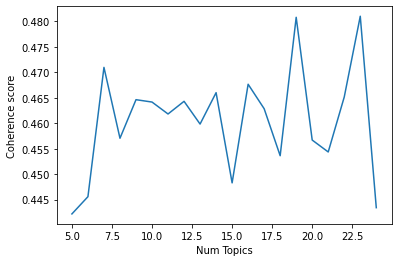

In [33]:
# Show graph
limit=25; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [34]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4422
Num Topics = 6 Coherence:  0.4456
Num Topics = 7 Coherence:  0.471
Num Topics = 8 Coherence:  0.4571
Num Topics = 9 Coherence:  0.4646
Num Topics = 10 Coherence:  0.4642
Num Topics = 11 Coherence:  0.4618
Num Topics = 12 Coherence:  0.4643
Num Topics = 13 Coherence:  0.4598
Num Topics = 14 Coherence:  0.466
Num Topics = 15 Coherence:  0.4483
Num Topics = 16 Coherence:  0.4677
Num Topics = 17 Coherence:  0.4629
Num Topics = 18 Coherence:  0.4536
Num Topics = 19 Coherence:  0.4808
Num Topics = 20 Coherence:  0.4567
Num Topics = 21 Coherence:  0.4544
Num Topics = 22 Coherence:  0.4652
Num Topics = 23 Coherence:  0.481
Num Topics = 24 Coherence:  0.4434


In [36]:
# Coherence for 23-topic model
print(coherence_values[18])

# Topics for 23-topic model
malletModel_23 = model_list[18]
model_topics_23 = malletModel_23.show_topics(formatted=False)
pprint(sorted(malletModel_23.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA23 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_23)

# Visualize the topics
pyLDAvis.enable_notebook()
vis23 = pyLDAvis.gensim.prepare(MalletLDA23, corpus, id2word, sort_topics=False)
vis23

0.48102076353639056
[(0,
  '0.127*"life" + 0.051*"death" + 0.043*"mind" + 0.028*"manner" + 0.024*"soul" '
  '+ 0.021*"nature" + 0.020*"trial" + 0.017*"truth" + 0.016*"coal" + '
  '0.016*"matter"'),
 (1,
  '0.132*"land" + 0.079*"acre" + 0.073*"year" + 0.071*"farm" + 0.034*"wheat" + '
  '0.032*"dollar" + 0.029*"farmer" + 0.024*"crop" + 0.024*"price" + '
  '0.023*"bushel"'),
 (2,
  '0.035*"body" + 0.033*"air" + 0.032*"food" + 0.023*"night" + 0.022*"head" + '
  '0.022*"arm" + 0.020*"blood" + 0.019*"pain" + 0.017*"drink" + 0.016*"heat"'),
 (3,
  '0.154*"child" + 0.145*"letter" + 0.035*"friend" + 0.032*"heart" + '
  '0.031*"baby" + 0.031*"kind" + 0.022*"write" + 0.021*"boy" + 0.020*"news" + '
  '0.020*"girl"'),
 (4,
  '0.047*"water" + 0.033*"tea" + 0.025*"pork" + 0.023*"bread" + 0.022*"thing" '
  '+ 0.020*"piece" + 0.019*"box" + 0.016*"pound" + 0.016*"butter" + '
  '0.016*"sugar"'),
 (6,
  '0.123*"school" + 0.057*"church" + 0.038*"number" + 0.030*"teacher" + '
  '0.024*"pupil" + 0.023*"town"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.124475  0.074143       1        1  4.242985
1      0.182857  0.001884       2        1  5.071668
2      0.068892  0.055730       3        1  4.310070
3      0.074993  0.232503       4        1  4.303465
4      0.029930 -0.095622       5        1  4.495702
5     -0.181886  0.084995       6        1  4.246997
6     -0.012936 -0.040531       7        1  4.307466
7     -0.017116  0.064746       8        1  4.157382
8     -0.284632  0.023306       9        1  4.182086
9      0.107626  0.137796      10        1  4.266561
10    -0.127079 -0.062345      11        1  4.307157
11     0.025281 -0.256191      12        1  4.460847
12     0.004570  0.115448      13        1  4.221607
13     0.077346  0.022394      14        1  4.500405
14     0.113082 -0.125798      15        1  4.391874
15     0.151364  0.163633      16        1  4.343531
16    -0.128291 -0.038722      17        1  4.216097
17    -0.040045 -0.017840      18        1  4.356356
18    -0.210441  0.079264      19        1  4.213716
19    -0.017499 -0.238792      20        1  4.207867
20     0.060296 -0.088542      21        1  4.317986
21    -0.145543  0.030971      22        1  4.313762
22     0.144756 -0.122432      23        1  4.564413, topic_info=              Term         Freq        Total Category  logprob  loglift
118           work   784.000000   784.000000  Default  30.0000  30.0000
91             day  1226.000000  1226.000000  Default  29.0000  29.0000
166           time  1138.000000  1138.000000  Default  28.0000  28.0000
452        country   834.000000   834.000000  Default  27.0000  27.0000
99           place   765.000000   765.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
452        country    97.032220   834.713123  Topic23  -3.7372   0.9348
2231  constitution    30.693866    45.261181  Topic23  -4.8882   2.6985
779          power    39.604988   125.801788  Topic23  -4.6333   1.9311
538          world    42.575362   251.423931  Topic23  -4.5610   1.3110
942        opinion    32.674115    83.860443  Topic23  -4.8256   2.1443

[1557 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
119      17  0.961056      abide
3111      1  1.031837    absence
2142     14  1.002178  abundance
502      13  1.012326    academy
1413     21  0.975747     access
...     ...       ...        ...
185      19  1.000690  yesterday
3759      2  0.984277       yoke
5263     14  1.002178       youe
1816     13  0.991496      youth
2525     21  0.975747       zinc

[2009 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [39]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [40]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(8116 unique tokens: ['annoyance', 'anxiety', 'attend', 'catechism', 'cause']...)


In [44]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=35, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -8.96131
<20> LL/token: -8.67726
<30> LL/token: -8.45384
<40> LL/token: -8.29898

0	10	give school work life friend visit time day book read mind meet send church number boy hear year government rest 
1	10	country land year dollar money acre farm pay sell pound person board work month cent winter summer wheat price spring 
2	10	child house day girl call night time bed give buy people hold find room work evening week building morning hand 
3	10	place man day bring walk hour work pass speak reach travel gentleman door eye call turn water follow carry hospital 
4	10	letter write send time feel hear give receive people return week child world find place wife husband account suppose trouble 

<50> LL/token: -8.2063
<60> LL/token: -8.13682
<70> LL/token: -8.09089
<80> LL/token: -8.05581
<90> LL/token: -8.03416

0	10	give work school life mind visit meet read church fear paper n

<610> LL/token: -7.90618
<620> LL/token: -7.907
<630> LL/token: -7.90657
<640> LL/token: -7.90599

0	10	people work school mind man number read church year give government law interest remain life world office call build idea 
1	10	country land year dollar money pay acre farm sell work winter pound person month buy business summer house grow cent 
2	10	day week child bring girl house time boy night find morning woman bed leave board make water end town thing 
3	10	place man give time call hand room speak work turn pass order eye stand day reach hour meet face visit 
4	10	send write letter hear give feel time friend receive family life expect book heart return kind year wife find health 

<650> LL/token: -7.90597
<660> LL/token: -7.90111
<670> LL/token: -7.90135
<680> LL/token: -7.89952
<690> LL/token: -7.89243

0	10	work people school mind man give number church year government law read interest call office world fact idea state family 
1	10	country land year dollar money acre pay farm

<160> LL/token: -7.96576
<170> LL/token: -7.95902
<180> LL/token: -7.95505
<190> LL/token: -7.95914

0	8.33333	country year land dollar acre farm money sell pay house month winter pound buy summer grow cent wood tree wheat 
1	8.33333	send write letter give friend life receive time family expect book hear wife feel leave kind health death die trouble 
2	8.33333	school give man number speak church order place mind reach answer travel door gentleman time meet attend hospital begin case 
3	8.33333	bring call man water people pass government head law time carry day body hold foot eat state matter power air 
4	8.33333	work place people town year find pay house business city day arrive settle river office ship money world boat set 
5	8.33333	day child week feel hear girl time boy return fear room walk night morning bed visit give read woman rest 

<200> LL/token: -7.94955
<210> LL/token: -7.94578
<220> LL/token: -7.94643
<230> LL/token: -7.94165
<240> LL/token: -7.93844

0	8.33333	country yea

<660> LL/token: -7.90843
<670> LL/token: -7.90874
<680> LL/token: -7.90668
<690> LL/token: -7.90544

0	8.33333	land year country dollar acre money farm pay sell winter month pound house buy summer grow cent wood family tree 
1	8.33333	send write letter friend give life time receive year expect book feel heart kind read paper live health account die 
2	8.33333	school give man speak place order case number reach church stand time door gentleman meet attend hospital begin room continue 
3	8.33333	bring call hand water man head thing pass side hold government law ship carry foot table body eat save power 
4	8.33333	work place people town find world business country city arrive person house pay day office board boat state employment idea 
5	8.33333	day child week time hear return feel girl give boy night walk room morning bed leave remain fear woman visit 

<700> LL/token: -7.90266
<710> LL/token: -7.90454
<720> LL/token: -7.905
<730> LL/token: -7.90675
<740> LL/token: -7.9059

0	8.33333	ye

<110> LL/token: -8.04645
<120> LL/token: -8.02837
<130> LL/token: -8.02073
<140> LL/token: -8.0093

0	7.14286	send write letter hear week give friend day bring kind receive health trouble account thing stay death month find weather 
1	7.14286	school room speak time church visit order case answer call stand door gentleman attend show rest hospital begin walk give 
2	7.14286	child time feel family girl give expect woman heart wife boy morning night change remain year leave evening carry remember 
3	7.14286	day house town person board bring find arrive build travel river ship boat company building set require situation offer return 
4	7.14286	place work man hand water city side hold head call pass business employment expense body hour matter labour air village 
5	7.14286	country year land dollar money acre farm pay sell winter pound buy summer wood horse wheat price spring settle road 
6	7.14286	work people life give book read mind paper law husband lose state interest idea time mine rece

<510> LL/token: -7.92111
<520> LL/token: -7.92655
<530> LL/token: -7.92572
<540> LL/token: -7.91872

0	7.14286	send write letter hear give friend day week receive thing kind health feel visit find month return account die stay 
1	7.14286	school room give speak order number stand reach door follow show hospital begin case fact table meet place wait answer 
2	7.14286	time child family feel girl give remain expect boy life night live woman heart leave morning wife bed change care 
3	7.14286	day bring place town house arrive board water person time church travel river ship boat company set horse road intend 
4	7.14286	work man hand place call find business city head carry hold employment body pass air village food inhabitant water eat 
5	7.14286	country land year dollar money acre farm pay sell winter pound buy summer month house grow wood wheat price tree 
6	7.14286	people year book mind work pay world government law husband interest life office state read idea copy study teach character 

<910> LL/token: -7.92286
<920> LL/token: -7.93031
<930> LL/token: -7.9293
<940> LL/token: -7.92746

0	7.14286	send write letter hear week give day friend return receive kind feel health expect visit thing month find account stay 
1	7.14286	school room give number speak order reach place door time hospital begin attend continue call wait build visit train question 
2	7.14286	time child family feel girl life boy night woman heart year wife remain live meet change die care death husband 
3	7.14286	day bring town house person water arrive board leave travel river ship boat place time tea table intend save company 
4	7.14286	work man place hand call find business give city pass hold carry walk body mine employment air village head food 
5	7.14286	country land dollar year money acre farm pay sell pound house buy month summer grow winter wood cent wheat price 
6	7.14286	people year mind work book government law interest pay state world office life idea copy paper character read study publish 

<310> LL/token: -7.9626
<320> LL/token: -7.9573
<330> LL/token: -7.94993
<340> LL/token: -7.95035

0	6.25	letter write week hear time friend send family live expect find return day health receive boy account trouble kind winter 
1	6.25	give day time hand room meet remain place walk hold die morning rest hour lose eye attend feel table turn 
2	6.25	bring child feel girl night woman heart wife bed world life death thing husband daughter body weather draw matter baby 
3	6.25	school speak stand reach time follow mind door gentleman answer case visit call receive hospital begin leave fact number continue 
4	6.25	country land year dollar money acre farm pay sell pound buy house cent wood wheat price board purchase farmer wage 
5	6.25	work give year send water book pay paper life month call remember cut make mine eat forget tree copy offer 
6	6.25	man people work government law state mind idea company give study character form condition class party amount opinion belong population 
7	6.25	pla

<710> LL/token: -7.94539
<720> LL/token: -7.95018
<730> LL/token: -7.94797
<740> LL/token: -7.94828

0	6.25	letter week send hear time friend write family child return feel day boy receive expect health visit account kind thing 
1	6.25	day give hand time room bring remain place meet walk morning order hour stand die eye rest face foot turn 
2	6.25	girl bring child feel night woman heart wife bed death life change husband world head body draw eat baby air 
3	6.25	school speak case reach call door gentleman follow hospital begin visit continue time answer wait train question give patient understand 
4	6.25	country land year dollar money acre farm pound sell buy pay winter wood wheat price grow summer purchase farmer wage 
5	6.25	work give year pay book life call send write read paper month live interest mine age copy remember offer end 
6	6.25	man people mind government law state idea enter number character form study class power office party belong property population experience 
7	6.25

<60> LL/token: -8.252
<70> LL/token: -8.20939
<80> LL/token: -8.172
<90> LL/token: -8.14513

0	5.55556	feel friend life hear hand fear death die give husband trouble receive wife kind spirit gentleman judge soul nature enjoy 
1	5.55556	day night water foot side call bed bring idea body hold give air food morning climate world man head grow 
2	5.55556	child day week school family boy hear return walk church town account visit evening remain stay feel hope begin spend 
3	5.55556	land country dollar year acre farm sell money pound winter buy summer wood wheat price farmer month employment spring produce 
4	5.55556	write send letter work time book give heart read paper live mine forget copy face thing promise life draw offer 
5	5.55556	work pay find year money house board office ship person government world doctor business situation obtain difficulty wage month character 
6	5.55556	time man give girl expect number place people year return start order leave intend travel question change und

<410> LL/token: -7.97685
<420> LL/token: -7.97644
<430> LL/token: -7.97398
<440> LL/token: -7.97758

0	5.55556	feel life give leave woman friend hand heart wife kind death die trouble husband daughter bear fear live change enjoy 
1	5.55556	bring night day head call water bed hold body eat air foot food eye side drink fire lie thing sleep 
2	5.55556	day child week family hear time return boy walk morning church girl remain town evening stay visit spend baby learn 
3	5.55556	land country year dollar acre farm winter pound sell buy summer money wood wheat price house purchase farmer spring grow 
4	5.55556	send write letter give time receive book friend work read year paper account thing expect mine hear find copy forget 
5	5.55556	work pay people money country year government board office find month wage employment business idea world situation mind offer person 
6	5.55556	man give school place number time order reach gentleman start call travel remain fear begin attention build stage rea

<760> LL/token: -7.97993
<770> LL/token: -7.97639
<780> LL/token: -7.98942
<790> LL/token: -7.98553

0	5.55556	life feel family girl friend child hand live woman heart wife give death die trouble husband bear daughter care age 
1	5.55556	bring water head call bed work foot body eat air table hold food thing set drink clothe fire night sea 
2	5.55556	day week hear time child return boy morning church month visit remain town walk night expect evening stay make feel 
3	5.55556	land year country acre farm dollar winter pound buy money sell summer wood month wheat price house tree pay purchase 
4	5.55556	send write letter time give receive book read health paper hear friend account leave year thing find work remember forget 
5	5.55556	work people pay country money year government law office mind idea situation offer obtain wage world difficulty board property character 
6	5.55556	man give school place number order reach gentleman time follow call fact fear begin build reason start stage min

<110> LL/token: -8.09888
<120> LL/token: -8.0897
<130> LL/token: -8.07626
<140> LL/token: -8.06192

0	5	send write letter child hear feel friend week time family heart wife expect die death health husband kind trouble boy 
1	5	school give time receive rest call mind begin return remain place question change leave boy number understand teacher fear stage 
2	5	life hand speak girl daughter mind hold company continue idea man meet table attend woman promise study teach word notice 
3	5	day bring room house walk night bed foot stand door stay morning side hospital call hour patient face time clock 
4	5	give man work church place time order build follow gentleman case arrive doctor carry return train hour show answer move 
5	5	give book read paper life year time feel visit fear hear bear forget sit lose make copy live remember friend 
6	5	country land year acre farm winter pound buy summer money dollar sell wood wheat price spring purchase live raise farmer 
7	5	work pay dollar money month 

<410> LL/token: -7.99128
<420> LL/token: -7.98963
<430> LL/token: -7.99502
<440> LL/token: -7.99842

0	5	write letter child hear friend send family feel week time heart wife kind give girl health expect receive trouble husband 
1	5	school give visit time place return call number speak receive remain change continue mine question fact understand teach teacher stage 
2	5	life hand mind woman meet eye suppose hold boy man idea girl study interest turn character dress attend lead end 
3	5	day room bring night walk morning week bed time hour evening door stay house stand table foot eat tea sit 
4	5	man give church order place time gentleman work show hospital reach follow build wait train fear case answer reason carry 
5	5	give send book feel work read paper account bear life fear year copy forget care pleasure time suffer flower promise 
6	5	land country year acre farm winter pound buy wood summer wheat sell price spring purchase farmer tree grow produce settle 
7	5	work pay dollar money m

<710> LL/token: -7.99123
<720> LL/token: -7.99073
<730> LL/token: -7.99646
<740> LL/token: -7.99283

0	5	write letter child friend hear send time girl feel give kind wife health heart week family husband death daughter expect 
1	5	school give call number speak time visit remain return continue face interest fact question understand teach meet teacher receive reason 
2	5	hand family life woman mind meet eye boy suppose remember man hold learn study service enter year difficulty character attend 
3	5	day week room night walk morning bed bring house evening church foot table fear eat hour sit head stand clock 
4	5	man give place order time reach follow gentleman show hospital wait train patient doctor case travel carry hour answer station 
5	5	send feel time give book year read life paper work care account bear receive age forget copy promise flower live 
6	5	land country year acre farm winter pound dollar buy wood sell summer wheat price purchase grow tree farmer produce money 
7	5	work 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.39058
<20> LL/token: -8.93193
<30> LL/token: -8.64632
<40> LL/token: -8.47871

0	4.54545	write send letter friend book paper suppose feel day life find hear live wife draw health family give world kind 
1	4.54545	day receive week child mind find school interest time require climate offer end read obtain person family change territory eat 
2	4.54545	place people school church work man number law question walk gentleman inhabitant continue study business character world condition class teach 
3	4.54545	time girl send arrive give work hear office return place town letter stage receive read house thing stay bring travel 
4	4.54545	country month work farm winter summer wood land settle purchase wage road farmer labour people town trade house horse mill 
5	4.54545	year land dollar money pay acre sell pound cent buy wheat price farm expense produce cost copy bushel grow hal

<310> LL/token: -8.02697
<320> LL/token: -8.02753
<330> LL/token: -8.02679
<340> LL/token: -8.02359

0	4.54545	send write letter friend hear book kind life wife death heart husband family paper health live forget receive copy daughter 
1	4.54545	year time feel pay expect find receive read account interest mind leave give hand trouble age offer change hope mail 
2	4.54545	people school number law church state mind government study inhabitant teach teacher idea attend character form condition power fact class 
3	4.54545	bring place give time girl remain thing house travel month gentleman stay arrive spend office call difficulty horse turn dress 
4	4.54545	country money winter person month house work summer wood town settle place purchase cut road business wage employment find fall 
5	4.54545	land dollar year acre farm sell pound pay buy money cent country wheat price grow produce cost crop farmer raise 
6	4.54545	child week day hear boy morning night bed feel evening visit return table b

<610> LL/token: -8.01103
<620> LL/token: -8.0067
<630> LL/token: -8.00507
<640> LL/token: -8.01101

0	4.54545	send write letter friend book heart kind life husband paper feel wife hear death daughter health forget copy promise bear 
1	4.54545	year pay time expect receive feel account give interest hand leave change age world offer read mind lose manner care 
2	4.54545	school people number law government state mind study teach teacher enter church idea form power meeting pupil attend office territory 
3	4.54545	bring place give time girl thing remain call suppose gentleman return arrive travel month enjoy remember meet house stage dress 
4	4.54545	country house person month business board work summer money live settle family winter find road dollar wage employment labour fall 
5	4.54545	land year acre dollar farm sell country pound money buy pay wheat grow price cent purchase farmer tree produce cost 
6	4.54545	child week day hear boy night morning bed feel visit evening stay table spen

<910> LL/token: -8.00426
<920> LL/token: -8.00663
<930> LL/token: -8.01002
<940> LL/token: -8.00989

0	4.54545	send write letter friend book heart hear feel kind husband death paper life read receive health copy forget die flower 
1	4.54545	year pay time expect money receive change feel interest leave hand account mind age meet care offer difficulty manner give 
2	4.54545	school people state government law number office study teach enter teacher character church class form idea fact pupil meeting territory 
3	4.54545	give bring time girl thing place call live remain woman suppose remember house month meet wife enjoy stage dress gentleman 
4	4.54545	country house place find family dollar person month business summer work day settle town winter board wage employment people labour 
5	4.54545	land acre year farm dollar sell country pound buy pay money wheat price grow tree purchase farmer produce wood cent 
6	4.54545	child week day hear boy return night morning bed feel evening stay fear w

<160> LL/token: -8.07068
<170> LL/token: -8.06398
<180> LL/token: -8.05592
<190> LL/token: -8.052

0	4.16667	life feel write book heart read hand death die paper change year bear forget send flower soul nature trouble talk 
1	4.16667	day night time head call foot eye hour hear fall tree side turn woman air hold horse end play pass 
2	4.16667	give receive visit speak meet time case call interest care hospital doctor copy offer wait patient service attend show train 
3	4.16667	work day man time find hand bring money make live carry thing leave mine place face follow mind save lose 
4	4.16667	letter send child friend write hear week feel girl kind wife boy husband health return stay hope weather daughter baby 
5	4.16667	water state city ship world find body matter require village inhabitant climate food people drink vessel sea party island part 
6	4.16667	room day walk bed fear bring morning stand door evening return table week spend sit clock dinner hour stage dress 
7	4.16667	country la

<410> LL/token: -8.00979
<420> LL/token: -8.01263
<430> LL/token: -8.0161
<440> LL/token: -8.01812

0	4.16667	write life book feel heart read paper death die send hand friend copy forget bear flower age give publish talk 
1	4.16667	day night call eye head hold fall foot side air time tree play turn end horse snow watch draw hour 
2	4.16667	give time visit meet case receive answer call speak hospital care pass doctor train patient notice interest question attention enter 
3	4.16667	work time day man leave thing find money hand make live place mind mine bring suppose trade company woman remember 
4	4.16667	letter child send hear week write friend feel boy girl wife kind husband expect receive stay daughter hope health baby 
5	4.16667	water city world find ship body require food inhabitant change deal drink eat meet tea people bread sea part sort 
6	4.16667	room bring walk bed morning stand fear door hour table gentleman rest sit clock dinner stage evening dress drive island 
7	4.16667	la

<660> LL/token: -8.00251
<670> LL/token: -8.00141
<680> LL/token: -7.9986
<690> LL/token: -8.00008

0	4.16667	life feel book write read paper death send heart bear friend forget copy year age flower die nature trust publish 
1	4.16667	day night head hold eye call time hour fall foot air side snow sleep turn weather arm end tree cover 
2	4.16667	give time meet receive visit call case speak woman hospital answer doctor care wait pass train question patient notice attend 
3	4.16667	work time day man find thing leave place make suppose bring company money hand mine offer carry turn trade mind 
4	4.16667	letter child send write hear week friend feel kind boy wife girl husband health stay daughter hope trouble receive baby 
5	4.16667	water ship body tea city world food inhabitant find drink clothe eat provision captain sea bread meet journey climate require 
6	4.16667	room walk bed bring hand stand door fear morning gentleman table sit hear clock horse play hour evening dinner stage 
7	4.166

<910> LL/token: -8.01077
<920> LL/token: -8.00639
<930> LL/token: -8.0101
<940> LL/token: -8.01545

0	4.16667	life write book feel paper friend send death read heart year husband copy age flower die forget care bear publish 
1	4.16667	day night call head side eye hour hold fall air lie pass meet face turn watch sleep tree cover arm 
2	4.16667	give time visit receive call case meet answer speak woman hospital order doctor wait train question patient notice service attention 
3	4.16667	work time find day man place money leave give change hand company mine offer thing suppose live make gold join 
4	4.16667	letter child send week hear write feel friend girl wife boy time stay daughter kind hope trouble health baby expect 
5	4.16667	bring water ship body eat tea food person find drink require captain clothe world woman vessel thing provision bread sea 
6	4.16667	room walk fear morning hand door stand table bed sit hear rest clock play gentleman dinner stage dress drive horse 
7	4.16667	land

<160> LL/token: -8.09856
<170> LL/token: -8.09504
<180> LL/token: -8.08954
<190> LL/token: -8.08262

0	3.84615	people country state city place office world employment idea labour village inhabitant require climate property find form employ field capital 
1	3.84615	land dollar acre year farm country sell pound money pay buy wood wheat price farmer produce board cost wage crop 
2	3.84615	school place number gentleman fact hour begin teach teacher face interest stage speak manage remark train note board pupil time 
3	3.84615	give return visit call year law time church company change lose judge remain lead day government prepare join belong reason 
4	3.84615	life book read heart work year mind matter air woman care age move call nature world publish story boy power 
5	3.84615	place horse foot turn follow time river travel carry order start mine build call bank drive reach distance head building 
6	3.84615	country give find money year expect suppose arrive remember remain business make acco

<410> LL/token: -8.03277
<420> LL/token: -8.03627
<430> LL/token: -8.03586
<440> LL/token: -8.03584

0	3.84615	people country state city world place employment labour village find obtain inhabitant property character employ capital idea advice population emigrant 
1	3.84615	land dollar acre country year farm sell pound money buy pay wheat price farmer produce cost crop bushel raise market 
2	3.84615	school give number church place gentleman fact teach teacher stage condition remark begin follow pupil claim face territory build hour 
3	3.84615	call return year law remain give expect end government interest judge fear office join time belong term visit lead war 
4	3.84615	life work book heart read mind age matter woman power care nature boy hold year publish world story picture call 
5	3.84615	man day place reach order river travel horse side start foot carry walk mine head turn bank drive distance build 
6	3.84615	give find money business year leave arrive account country suppose return

<660> LL/token: -8.03225
<670> LL/token: -8.03812
<680> LL/token: -8.03204
<690> LL/token: -8.03052

0	3.84615	people place city state business world employment dollar village obtain inhabitant labour property office idea employ wage require advice trade 
1	3.84615	land dollar acre country year farm pound sell money price wheat buy farmer purchase produce wood crop cost pay bushel 
2	3.84615	school give church number gentleman fact place teach teacher building condition begin claim build receive pupil follow face territory enter 
3	3.84615	call remain year government law give end interest return mind judge expect fear term lead join visit belong war prevent 
4	3.84615	life work book heart read woman age year copy mind care paper publish bear draw world matter hold picture story 
5	3.84615	man day place reach travel river side horse carry start mine call head turn drive stage order foot distance gold 
6	3.84615	country money return find arrive account give feel make leave suppose people

<910> LL/token: -8.02779
<920> LL/token: -8.02878
<930> LL/token: -8.03234
<940> LL/token: -8.03235

0	3.84615	place people business state city find world employment wage village inhabitant dollar character labour obtain property employ street office advice 
1	3.84615	land acre dollar farm year country pound sell money wheat price buy purchase farmer wood produce crop pay bushel raise 
2	3.84615	school give number church family build fact teach teacher building begin claim hold pupil study condition territory open follow receive 
3	3.84615	man call law government remain end year interest mind judge lose join belong lead give war office prevent expect lawyer 
4	3.84615	work life book read heart year paper mind age copy bear woman publish boy sell nature story care picture trial 
5	3.84615	man day reach travel river place start side carry head meet horse give mine walk order gentleman distance turn foot 
6	3.84615	country money people account person year find suppose feel give change mee

<160> LL/token: -8.12854
<170> LL/token: -8.12551
<180> LL/token: -8.11797
<190> LL/token: -8.11821

0	3.57143	bring water place boat table thing walk dinner turn stage travel set expect return follow make clock clothe box change 
1	3.57143	school give church day remain visit number arrive place town teach teacher play open gentleman pupil pass attend building lead 
2	3.57143	people government law state year office form condition party enter receive case territory population difficulty duty native member amount priest 
3	3.57143	time give girl day call answer leave bring expect mine remember mention hand make claim reach gold reason cross follow 
4	3.57143	house family year live month give kind health woman spend summer situation suppose day servant obtain respect class week commence 
5	3.57143	man place stand door head fear carry begin start walk time understand horse build call distance speak side foot fire 
6	3.57143	work man hand mind time find life idea study matter move eye trade

<410> LL/token: -8.05323
<420> LL/token: -8.05305
<430> LL/token: -8.05386
<440> LL/token: -8.05527

0	3.57143	bring water thing table enjoy eat walk dinner stage dress clock set clothe tea lie box place climate cut rain 
1	3.57143	school number church give place remain build receive visit teach teacher return condition play town attend interest pupil building call 
2	3.57143	people law government state year difficulty property judge form office party population duty member lawyer call press belong prevent choose 
3	3.57143	time day give girl leave find call answer change mine fall lose reason claim rest mention reach gold follow intend 
4	3.57143	house family year live time month health expect give wife kind week woman situation obtain summer promise offer respect country 
5	3.57143	man place stand start walk fear hand horse turn side head carry show foot face rest stop shoot begin attack 
6	3.57143	work mind man hand life find idea study time move power thing learn possess trade char

<660> LL/token: -8.03796
<670> LL/token: -8.03947
<680> LL/token: -8.0386
<690> LL/token: -8.0321

0	3.57143	bring water thing table enjoy tea walk dinner foot clothe eat bread turn piece clock box dress cut sea set 
1	3.57143	school give church number remain place build visit teach teacher play building fact receive condition pupil interest territory call town 
2	3.57143	people year government law state call form world party judge property population office duty person opinion habit prevent end press 
3	3.57143	time day give girl leave find change call rest make company mine fall account pleasure lose claim face reason gold 
4	3.57143	family year house live friend hear kind health country wife time expect suppose month daughter remember situation obtain winter give 
5	3.57143	man place stand reach fear walk turn start stage travel show carry meet begin horse prepare shoot stop attack road 
6	3.57143	work hand mind man life find idea study move power labour class possess trade matter p

<910> LL/token: -8.03679
<920> LL/token: -8.03122
<930> LL/token: -8.0359
<940> LL/token: -8.03276

0	3.57143	bring water house thing table tea eat dinner dress clothe bread bed piece lie set article box kind salt servant 
1	3.57143	school church number give build call remain teach teacher fact gentleman note pupil receive speak place territory interest native follow 
2	3.57143	people country state year government law office property world party form judge population choose opinion duty person prevent press power 
3	3.57143	time day give girl leave find place make company call rest mine face change intend fall account pleasure gold claim 
4	3.57143	family friend year live hear kind house expect give time wife health husband month daughter winter situation letter remember enjoy 
5	3.57143	man reach start fear walk continue stand stage turn horse prepare travel place begin carry head drive side throw road 
6	3.57143	work mind hand man life idea obtain move class difficulty study labour p

<110> LL/token: -8.17012
<120> LL/token: -8.15467
<130> LL/token: -8.14289
<140> LL/token: -8.13028

0	3.33333	send write letter hear year friend health find kind give paper live hope account forget word mention remember leave winter 
1	3.33333	work house day money time side build give fall set bring grow situation lay river fellow fill carry stone present 
2	3.33333	man speak reach place door gentleman travel hospital hour start train continue horse follow order show boat answer station drive 
3	3.33333	place city cent office ship town village world business inhabitant employ street passenger advice day river water people lake steam 
4	3.33333	land country dollar year acre farm wood sell wheat price farmer pound produce buy money crop bushel winter purchase market 
5	3.33333	week day feel book visit walk receive return read evening stay hear fear thing time trouble enjoy baby promise dinner 
6	3.33333	bring month save eat tea time copy woman summer clothe drink wear leave supply inten

<310> LL/token: -8.05158
<320> LL/token: -8.05218
<330> LL/token: -8.04839
<340> LL/token: -8.04846

0	3.33333	send write letter hear give kind friend find health time paper year hope forget leave mention mail remember account spring 
1	3.33333	work house day town build wage building money trade foot week lay stone find fall learn fill set earn offer 
2	3.33333	speak reach man order place hospital train gentleman start answer travel door wait follow show drive fear walk stage turn 
3	3.33333	place city cent business boat ship office employment river world village inhabitant town give employ street advise find passenger vessel 
4	3.33333	land country acre year farm dollar wood wheat price farmer pound produce buy crop raise grow bushel market horse clear 
5	3.33333	week book feel day evening stay walk read trouble enjoy weather receive baby copy morning dinner return play promise yesterday 
6	3.33333	bring month water thing save summer eat table fall cut winter tea drink clothe lie wear

<510> LL/token: -8.04892
<520> LL/token: -8.05314
<530> LL/token: -8.05279
<540> LL/token: -8.04755

0	3.33333	send write letter hear friend time kind health give paper find year hope account respect mention forget month mail answer 
1	3.33333	work house day build wage building foot week find fall place trade set stone lay road view company earn town 
2	3.33333	reach place man gentleman hospital speak order start wait train follow show patient walk travel stage horse continue station answer 
3	3.33333	place business city cent office river find boat employment town village inhabitant bank employ give make advise street pass water 
4	3.33333	land country year acre farm dollar wheat price wood sell buy farmer grow produce pound winter crop tree bushel market 
5	3.33333	week feel book read evening day boy stay child receive trouble enjoy copy spirit morning baby fear thing walk weather 
6	3.33333	bring water thing month table save tea lie clothe dinner wear eat dress bread cut fall climate

<710> LL/token: -8.03907
<720> LL/token: -8.03839
<730> LL/token: -8.04056
<740> LL/token: -8.03955

0	3.33333	send write letter hear friend give year kind health paper find time account hope remember forget summer live mail mention 
1	3.33333	work day house foot wage building build place hand trade set road stone week lay company find number earn view 
2	3.33333	speak reach place gentleman travel wait man order train patient horse start continue stage station follow show clock turn stop 
3	3.33333	place business city office river boat find employment town world village inhabitant bank mill employ advise water advice steam capital 
4	3.33333	land country year acre farm dollar pound wheat winter wood price sell farmer grow buy produce money crop summer bushel 
5	3.33333	week feel book child boy stay read weather receive copy spirit thing day enjoy morning yesterday baby trust publish today 
6	3.33333	bring water thing tea table dinner eat clothe supply wear buy bread person month dress 

<910> LL/token: -8.02352
<920> LL/token: -8.03263
<930> LL/token: -8.03301
<940> LL/token: -8.0359

0	3.33333	send write letter hear friend health give time paper kind receive account hope forget find respect winter leave month year 
1	3.33333	work house day wage building hand build foot place find week lay stone trade view earn cover road coal roof 
2	3.33333	speak order place reach gentleman continue wait train patient travel man start stage station horse answer turn sight show reason 
3	3.33333	place city find town business river employment village office inhabitant situation bank give boat world employ advise side road cross 
4	3.33333	land country acre year farm pound wood dollar wheat winter buy price farmer grow sell produce summer crop bushel market 
5	3.33333	week feel book read stay child boy copy spirit weather day enjoy fear yesterday trouble trust publish make today island 
6	3.33333	bring water thing tea kind table dress eat month clothe dinner wear bread piece box cut bu

<110> LL/token: -8.16239
<120> LL/token: -8.15496
<130> LL/token: -8.14676
<140> LL/token: -8.14409

0	3.125	school give number visit teacher stay return note day hear service street pupil present meet window boy open play attention 
1	3.125	time receive give leave mind change hand friend care feel begin matter year move soul meet eye companion read call 
2	3.125	order door speak room reach hospital train question patient gentleman understand continue show answer stage follow station remark minute realize 
3	3.125	room give night woman feel life bed heart body time doctor food suffer hold lose hour bless eat case sleep 
4	3.125	hear family girl feel health wife life live husband daughter remember death die hope promise year flower letter age thing 
5	3.125	work day business foot month man make time trade live money charge stone piece gold summer pay rate person grow 
6	3.125	dollar pay money sell year pound cent month price farmer employment produce expense board wage cost servant flou

<310> LL/token: -8.06631
<320> LL/token: -8.06207
<330> LL/token: -8.05399
<340> LL/token: -8.06212

0	3.125	school number give begin teach teacher service attend companion pupil territory class play study native window member boy visit open 
1	3.125	give time receive feel friend mind change care hand hear leave fact visit meet move soul year join pleasure scene 
2	3.125	order reach room door hospital train question speak patient answer understand show continue stage station fear hour notice sight follow 
3	3.125	life room bed night hour heart body bear remain food give drink hold woman sleep lose part arm fall case 
4	3.125	family girl wife live health life death hear husband kind daughter year give die age trouble flower remember heart remain 
5	3.125	work day time man business foot month mine make company trade gold stone cut intend piece house live charge follow 
6	3.125	dollar money pay year sell pound month country cent price wage employment expense board cost situation summer pu

<510> LL/token: -8.05845
<520> LL/token: -8.05669
<530> LL/token: -8.05535
<540> LL/token: -8.05376

0	3.125	school give number begin study teach service teacher fact companion pupil attend territory hold native lead member priest class visit 
1	3.125	time receive give feel mind change care leave return hear end meet pleasure spirit interest soul hand visit join reason 
2	3.125	order reach door hospital wait train patient continue speak show follow room answer stage station gentleman understand hour question notice 
3	3.125	room life bed give night remain body hour food suffer time month lose drink bear sit woman doctor sleep side 
4	3.125	friend family girl child wife year kind live health death heart husband die life daughter age flower bless feel love 
5	3.125	work day man time business find company make mine trade foot gold month stone intend piece prospect follow live coal 
6	3.125	dollar pay money year sell pound month cent country board wage expense cost situation price servant 

<710> LL/token: -8.0507
<720> LL/token: -8.04639
<730> LL/token: -8.05457
<740> LL/token: -8.05197

0	3.125	school give number fact teach teacher begin service condition attend pupil study territory church remain native note member priest music 
1	3.125	time give mind receive life feel year change care end hear leave visit interest return meet soul reason join doubt 
2	3.125	order reach door speak hospital room train patient show wait continue stage hour understand station sight answer man visit question 
3	3.125	time give bed room night month body life food doctor hour rest drink bear suffer sleep feel part fellow arm 
4	3.125	friend family girl child wife live kind health death husband heart die daughter feel flower life age hear bless love 
5	3.125	work day man find business time company foot mine make live trade gold stone claim intend number burn coal carpenter 
6	3.125	dollar pay money year pound sell month cent board wage employment expense situation price servant purchase offer

<910> LL/token: -8.04119
<920> LL/token: -8.04764
<930> LL/token: -8.05266
<940> LL/token: -8.05645

0	3.125	school give number teach teacher hold begin service condition fact note pupil attend territory study native remain judge member treat 
1	3.125	time give mind life feel receive change hear interest leave return meet lose care reason nature doubt trust end year 
2	3.125	order speak hospital man visit wait reach train patient continue stage door station fear show understand sight answer companion gentleman 
3	3.125	give hour time bed night room month body doctor case remain food drink sleep eat care arm suffer fellow sit 
4	3.125	friend girl family child wife health live heart death give husband die year kind daughter age flower feel respect bless 
5	3.125	work day man find time business company mine foot live make summer place cut gold stone week intend trade number 
6	3.125	dollar pay money year month sell board cent country wage employment expense situation purchase price obtain

<110> LL/token: -8.19986
<120> LL/token: -8.18564
<130> LL/token: -8.16956
<140> LL/token: -8.15074

0	2.94118	child feel girl morning trouble evening death return night visit baby fear thing bed bless yesterday weather sleep bear year 
1	2.94118	send write letter book hear give paper friend pay copy forget receive kind publish hope read love sell aunt truth 
2	2.94118	house day year week town business winter summer live fall person month place intend store servant country make snow commence 
3	2.94118	school gentleman continue call office teach teacher stage open drive attend hold quarter duty throw voice member dress supply expense 
4	2.94118	city ship boat place employment river water month captain tea vessel street journey provision sea passenger person board arrival side 
5	2.94118	give place time speak hospital visit wait train question understand attention condition notice remark pass show judge territory railroad native 
6	2.94118	people country state government settle labour l

<310> LL/token: -8.08964
<320> LL/token: -8.0859
<330> LL/token: -8.07867
<340> LL/token: -8.08885

0	2.94118	child feel week girl trouble night boy evening morning visit baby bed return fear spend yesterday today island send sleep 
1	2.94118	write send letter book paper receive copy hear forget read pay sell publish health give hope story aunt creature pen 
2	2.94118	day house week town month place find winter summer make fall country store business snow live commence person year stay 
3	2.94118	school church gentleman call attend girl office teach teacher open meeting service pupil lady expense member give dress continue order 
4	2.94118	place city ship boat cent water inhabitant arrive river captain vessel village provision bread sea passenger tea advice steam arrival 
5	2.94118	give visit place hospital pass train question patient wait understand answer mind speak condition receive notice case station show territory 
6	2.94118	people country state government law labour form idea ca

<510> LL/token: -8.07476
<520> LL/token: -8.07773
<530> LL/token: -8.07386
<540> LL/token: -8.07967

0	2.94118	child feel week girl boy trouble hear visit evening stay thing return baby night send morning yesterday hope bed today 
1	2.94118	write send letter book receive paper give read copy feel sell forget mail publish pay picture aunt health creature writing 
2	2.94118	day house town place month winter week summer find fall country make spring store health business snow commence trade cut 
3	2.94118	school church call give teach girl teacher attend office number service meeting pupil gentleman hold lead lady learn member class 
4	2.94118	place cent city ship boat water river inhabitant tea captain vessel provision village sea passenger advice bread steam arrival lake 
5	2.94118	give time visit hospital case train question speak patient understand fact place pass notice answer remark wait attention meet territory 
6	2.94118	people country state government law person labour form clima

<710> LL/token: -8.07049
<720> LL/token: -8.07198
<730> LL/token: -8.06799
<740> LL/token: -8.07321

0	2.94118	child week girl day feel boy hear evening morning stay visit trouble send baby night return bed spend yesterday hope 
1	2.94118	write letter send book give paper receive feel read copy forget mail publish news aunt writing picture pen story content 
2	2.94118	house day place town winter find summer week month fall make account settle store country spring snow leave commence climate 
3	2.94118	school church call attend number teach teacher office meeting pupil service fact begin lady class member hold note post music 
4	2.94118	water ship city boat place cent river person tea captain village vessel provision inhabitant sea arrive passenger advice steam arrival 
5	2.94118	give visit hospital wait time train question patient case understand answer place notice remark speak attention territory station order pass 
6	2.94118	people country state government law form labour property p

<910> LL/token: -8.07098
<920> LL/token: -8.0696
<930> LL/token: -8.06918
<940> LL/token: -8.0705

0	2.94118	child week feel day girl hear boy morning visit trouble evening stay night baby spirit yesterday return bed today island 
1	2.94118	write letter send book paper give receive feel read copy forget hope publish mail picture news writing flower pen story 
2	2.94118	place house day town find winter country summer month week settle person store fall cut make leave snow live commence 
3	2.94118	school church attend call give number teach teacher service gentleman pupil meeting note girl lady member class music office open 
4	2.94118	city ship boat water cent tea captain river place vessel provision sea village passenger advice side steam arrive arrival inhabitant 
5	2.94118	give time case hospital visit question patient place answer notice speak receive understand order train wait meet remark fact attention 
6	2.94118	people country state government law property labour form population

<110> LL/token: -8.21306
<120> LL/token: -8.19697
<130> LL/token: -8.185
<140> LL/token: -8.17063

0	2.77778	time case meet man life hospital care patient visit mind hand save bring learn lose fire leave doctor find interest 
1	2.77778	country money sell pound buy pay winter price month farmer cut summer work live wage trade clothe market labour intend 
2	2.77778	give bring state health kind settle rest thing receive answer people gold deal climate change order iron mail make opinion 
3	2.77778	land year acre farm dollar wood wheat tree spring family crop purchase bushel raise fall lot foot garden clear produce 
4	2.77778	send write letter book read paper receive copy work life publish account word debt pay respect story trust forget gain 
5	2.77778	child girl friend feel wife letter death die husband heart stay daughter send write baby hear woman time visit bless 
6	2.77778	year pay office company money country property difficulty call month captain party possess expense join time pro

<310> LL/token: -8.09733
<320> LL/token: -8.09504
<330> LL/token: -8.09204
<340> LL/token: -8.09254

0	2.77778	time life meet man case hospital woman care patient visit hand doctor sight eye reason pass lose meeting save assist 
1	2.77778	country dollar money sell winter pound buy month pay price summer farmer wage market board farm settle rate trade save 
2	2.77778	give time bring thing health change expect call mine make answer gold mind trouble deal return kind present order settle 
3	2.77778	land acre year farm wood wheat tree dollar grow raise crop horse bushel produce spring clear lot seed foot garden 
4	2.77778	write send letter book paper read receive copy forget publish life story respect history trust pen truth mail hope draw 
5	2.77778	girl friend child send wife heart death die husband kind hear feel letter daughter suffer write woman age year bless 
6	2.77778	year pay country money office company month difficulty expense interest party call government possess amount purcha

<510> LL/token: -8.09606
<520> LL/token: -8.09275
<530> LL/token: -8.08151
<540> LL/token: -8.08812

0	2.77778	time meet case visit hospital care life hand patient woman doctor reason experience man service save question eye sight bring 
1	2.77778	country money dollar winter pay sell pound buy month summer farmer wage price board farm servant situation house market cost 
2	2.77778	give time thing bring change return receive kind health hear expect mine mind hope deal gold answer set prospect month 
3	2.77778	land acre year farm wood wheat grow tree dollar produce crop bushel spring horse raise clear lot seed kind climate 
4	2.77778	write send letter book read paper forget copy receive publish story writing life truth history success pen sell notice mail 
5	2.77778	girl child friend wife heart death die husband life daughter feel woman suffer send letter year trouble bless age love 
6	2.77778	year pay country office company call difficulty expense month term amount interest emigrant aff

<710> LL/token: -8.08628
<720> LL/token: -8.08325
<730> LL/token: -8.08691
<740> LL/token: -8.09199

0	2.77778	time case meet hospital life care patient doctor visit reason bring attend wait man answer question woman sight notice understand 
1	2.77778	dollar country money pay sell pound winter month buy price farmer wage farm summer board cent business situation servant person 
2	2.77778	give time letter health expect kind change month bring hear receive mine hope call deal return mind gold make prospect 
3	2.77778	land acre year farm country wood wheat grow tree produce crop bushel spring dollar raise lot clear seed foot stock 
4	2.77778	write send letter book paper read receive forget copy life publish writing truth pen picture promise draw mail story kindness 
5	2.77778	child girl feel friend wife heart death husband life woman daughter die age suffer family send bless trouble love kind 
6	2.77778	year pay office country company difficulty end interest expense term amount world war 

<910> LL/token: -8.08647
<920> LL/token: -8.08232
<930> LL/token: -8.08646
<940> LL/token: -8.08642

0	2.77778	time case visit hospital hand meet bring patient doctor answer care attend question pass reason service save notice understand eye 
1	2.77778	dollar money pay sell country cent month pound board price wage purchase business situation obtain house buy quarter rate summer 
2	2.77778	give time hear letter friend receive health expect month change kind call winter hope respect settle gold prospect deal account 
3	2.77778	land acre farm year country wood wheat grow tree produce farmer crop bushel lot raise horse winter buy clear seed 
4	2.77778	write send letter book read paper copy forget receive life publish writing truth draw pen picture promise story news history 
5	2.77778	child girl friend life wife heart woman death husband feel die daughter age kind suffer year boy family trouble bless 
6	2.77778	year country office pay company difficulty expense end possess war emigrant pr

<110> LL/token: -8.19979
<120> LL/token: -8.1957
<130> LL/token: -8.18311
<140> LL/token: -8.16778

0	2.63158	child week girl boy bed evening stay doctor baby yesterday bless island care today sleep draw call wear dress learn 
1	2.63158	time thing remain hear head account eye lead talk call sort catch suppose regret remember ground assure finish succeed address 
2	2.63158	give church visit bring time attend meet answer remain patient place notice show remark prepare follow native accompany treat service 
3	2.63158	heart night life enjoy water body air food age woman nature drink clothe eat part fire blood climate rain salt 
4	2.63158	send write letter receive paper hear health hope time promise winter forget respect mention remember news aunt pleasure month expect 
5	2.63158	order continue man copy fear stage sell life return start story meet understand lose owe attack open debt publish wagon 
6	2.63158	number turn room tree table woman train company station side foot gold street atten

<290> LL/token: -8.12002

0	2.63158	child week girl boy evening stay bed baby morning spend dress yesterday wear today island play learn month afternoon tomorrow 
1	2.63158	call time thing hear head remain eye rest follow show join suppose step voice view regret ground manage account succeed 
2	2.63158	give church time visit attend meet place bring patient notice remark remain prepare service attention gentleman show number native accompany 
3	2.63158	night care enjoy body doctor grow air food change drink woman sleep blood fire pass hour draw fever water pain 
4	2.63158	send write letter receive hear friend health hope time respect paper forget remember kind mail month news expect promise pleasure 
5	2.63158	give man order stage meet life fear term continue return story pay owe attack word wagon speak lose driver send 
6	2.63158	room turn foot table train tree side sit end dinner station woman gold street hold house cover number war window 
7	2.63158	place arrive boat save city day ho

<460> LL/token: -8.11226
<470> LL/token: -8.1102
<480> LL/token: -8.11267
<490> LL/token: -8.11243

0	2.63158	week child girl boy day morning night evening bed stay spend baby yesterday today island wear spirit clock afternoon feel 
1	2.63158	time call thing give remain head feel hear follow eye join account catch lie rest voice prevent lead talk address 
2	2.63158	give visit church time attend remain patient notice place number service answer enter follow native fact bring priest experience remark 
3	2.63158	body doctor change air food call drink night time arm part world matter blood pain fever eat draw life mind 
4	2.63158	send write letter hear receive friend time health remember kind hope respect mail forget expect news mention aunt answer word 
5	2.63158	man give reach order meet gentleman return travel stage continue start life open attack wagon belong understand accept driver owe 
6	2.63158	house room foot tree table turn sit end train hold station street cover side hour window

<660> LL/token: -8.11102
<670> LL/token: -8.1121
<680> LL/token: -8.10711
<690> LL/token: -8.10534

0	2.63158	week day child boy morning return night evening stay bed spend baby clock play visit yesterday make today island hope 
1	2.63158	time give call remain account head thing hear feel pass remember follow hour join leave lie prevent people rest assist 
2	2.63158	give time church visit attend place patient bring enter attention meet service remain follow native wait notice priest experience lead 
3	2.63158	body doctor air food drink matter mind part call arm fire night blood wear fever pain care head change eye 
4	2.63158	send write letter hear receive friend health kind time expect respect forget pleasure mail promise news hope mention paper aunt 
5	2.63158	give reach man order travel return stage meet build gentleman building point journey start stop fear attack wagon owe lose 
6	2.63158	house room foot turn table tree side sit train hand station street door garden window end lay 

<860> LL/token: -8.10251
<870> LL/token: -8.1077
<880> LL/token: -8.10723
<890> LL/token: -8.10646

0	2.63158	week child day boy return morning evening stay night visit spend baby bed clock fear feel play yesterday today island 
1	2.63158	time call hear remain account thing people give head remember pass join feel talk manage finish assist prevent intend prepare 
2	2.63158	give time church visit attend place patient attention remain enter case service answer meet station native wait notice follow bring 
3	2.63158	call body night air food matter head drink part arm eat blood pain fever doctor give sleep climate fellow pass 
4	2.63158	send letter write hear friend receive health kind time expect forget hope respect mail news aunt suppose promise word writing 
5	2.63158	give reach man order travel return train meet stage gentleman open stop attack start wagon point journey build begin driver 
6	2.63158	house room hand foot place tree table build sit side street lay move window cover view 

<30> LL/token: -8.72609
<40> LL/token: -8.54703

0	2.5	school give speak office time meet teach teacher return order pupil interest money term answer duty lawyer manner expect hold 
1	2.5	work bring life business set flower employment time give live class thing year fill strength situation group job prisoner court 
2	2.5	day find child hand mind leave stage dress clothe move island spirit place box suppose road ride pain sit chair 
3	2.5	heart give body doctor food call eat pass drink air die continue sleep word matter hospital draw woman blood attack 
4	2.5	man work call understand time reason character plan proceed power government opinion notice condition form remain tribe wagon rest company 
5	2.5	people account time government world rise labour head join amount war commence state catch choose advantage cattle debt play property 
6	2.5	month winter summer spring find live health fall people time raise deal part leave lake cow employ expect shoot thousand 
7	2.5	church travel place 

<160> LL/token: -8.16444
<170> LL/token: -8.15681
<180> LL/token: -8.15274
<190> LL/token: -8.14909

0	2.5	school give money teach teacher receive return speak number interest pupil change condition member time office hold treat territory board 
1	2.5	work business find employment wage idea obtain character class employ trade situation world learn study life knowledge stranger gain day 
2	2.5	day hand house bring turn find move stage dress manner thing island spirit open play box mind sort surprise happen 
3	2.5	call body night eat matter doctor food hour air head drink heart pass fellow day time die blood pain continue 
4	2.5	man remain time meet mine understand work reach notice give show reason opinion experience wait call attack wagon fact visit 
5	2.5	people government state year world property form office amount join war power debt owe country habit choose circumstance establish benefit 
6	2.5	month time live winter summer fall health year spring kind suppose week expect find lea

<310> LL/token: -8.11807
<320> LL/token: -8.11646
<330> LL/token: -8.10879
<340> LL/token: -8.11335

0	2.5	school number teach teacher interest condition pupil money fact speak give study territory receive lawyer meeting office member open governor 
1	2.5	work business day money dollar employment wage world obtain trade make find class employ character learn situation require earn place 
2	2.5	house day hand thing find turn move dress table stage hold bring street ground sort catch head manner play view 
3	2.5	call heart night body doctor air food pass drink hour head sleep part matter blood pain eat continue eye thousand 
4	2.5	man time work reach understand meet mine give experience attack wagon follow wait danger tribe reason mountain continue feeling cross 
5	2.5	people state government world property form law amount idea population war debt power habit press industry establish benefit office duty 
6	2.5	time month live winter summer health year fall find expect suppose week leave 

<460> LL/token: -8.12501
<470> LL/token: -8.11586
<480> LL/token: -8.1205
<490> LL/token: -8.11362

0	2.5	school teach teacher give number condition study question pupil order receive money territory interest notice member note speak meeting fact 
1	2.5	work business money day dollar wage employment city situation find obtain give board trade man employ class office offer world 
2	2.5	house hand turn find day table call end move stage hold remain catch ground dress play difficulty sort surprise view 
3	2.5	call body air night food head drink sleep part matter doctor blood pain power life meet pass eat fellow hour 
4	2.5	man time work give mine follow continue understand experience attack reason wagon reach danger tribe place mountain claim gang start 
5	2.5	people government state world law form idea year population property habit office press power belong conduct industry party benefit amount 
6	2.5	time month winter summer health fall live find suppose expect leave year week spring i

<620> LL/token: -8.12633
<630> LL/token: -8.1258
<640> LL/token: -8.12666

0	2.5	school number give study teach teacher condition interest pupil notice territory plan fact lawyer speak note knowledge governor question call 
1	2.5	work money dollar day business pay wage employment board find obtain man situation trade employ office offer rate city character 
2	2.5	house hand time day table hour end stage turn hold save thing sort ground play set head learn surprise chair 
3	2.5	call body air night food drink head matter sleep part arm blood pain pass move meet eat lose burn draw 
4	2.5	man work time give reach mine follow continue claim understand head start attack fear wagon experience kill danger mountain reason 
5	2.5	people government state law form year power idea property call habit world press office duty benefit population war industry choose 
6	2.5	time month winter summer year fall expect health leave find suppose account live weather deal intend week spring snow prospect 
7	2

<770> LL/token: -8.12139
<780> LL/token: -8.12279
<790> LL/token: -8.11528

0	2.5	school number teach teacher call give condition note interest fact pupil study territory native lawyer change notice money question governor 
1	2.5	work dollar money day business pay board wage employment office find obtain man city trade employ offer situation learn rate 
2	2.5	house hand time hold turn hour table tree end day set eye stage lady half window play view move watch 
3	2.5	call head body air food night drink matter sleep part doctor arm pass blood pain care meet burn draw gather 
4	2.5	man time give reach work continue follow claim mine gold reason understand attack wagon start head tribe order number fear 
5	2.5	people government state law form world power year population join duty idea amount press industry party conduct education war property 
6	2.5	time month winter find summer health fall live account year leave expect weather week feel deal snow suppose intend prospect 
7	2.5	place give

<920> LL/token: -8.10833
<930> LL/token: -8.11821
<940> LL/token: -8.11233

0	2.5	school call number teach give teacher fact condition interest pupil territory study mind native note lawyer knowledge question progress treat 
1	2.5	work money dollar pay business board day wage employment find obtain man trade situation employ city office rate earn servant 
2	2.5	house hand day time hold table turn end tree place play eye window set lady watch sit cover view surprise 
3	2.5	call body air food night drink matter sleep fellow arm part blood pain pass lose head object strength care hour 
4	2.5	man give time work continue claim start reach mine follow gold understand order attack reason wagon head fear question number 
5	2.5	people government state law idea form year office power population press religion industry property party world education amount observe conduct 
6	2.5	time month winter find summer health fall expect year account live week weather feel leave spring deal change hear plac

<60> LL/token: -8.39038
<70> LL/token: -8.35035
<80> LL/token: -8.31703
<90> LL/token: -8.29368

0	2.38095	letter send write hear book kind feel friend receive baby weather health trouble mail visit news today week month boy 
1	2.38095	arrive find difficulty food store captain claim supply engage sail property matter treat respect stranger lawyer learn passage term irishman 
2	2.38095	country state year person produce expense crop climate people dollar market tea flour pay field pound lake provide butter servant 
3	2.38095	school begin boy teacher man judge call companion mind give pupil study power law prevent court occupy knowledge pleasure point 
4	2.38095	time find call head give expect water carry drink fall place meet feel lose fellow manner suppose quarter idea improve 
5	2.38095	time thing rest fear remember receive remain table meet join nature return manage expect attack end reason show answer accompany 
6	2.38095	bring land water board person ship clothe vessel require sea p

<210> LL/token: -8.16234
<220> LL/token: -8.16119
<230> LL/token: -8.15727
<240> LL/token: -8.15533

0	2.38095	send letter write hear receive time kind friend thing expect month find mail news forget spirit hope aunt writing likeness 
1	2.38095	time find arrive account leave difficulty supply party offer claim prospect store woman treat agent lawyer advise amount man save 
2	2.38095	country state pound year person summer money dollar winter climate tea market expense flour price lake produce bread advantage capital 
3	2.38095	school call man number begin speak teacher judge pupil case shoot hold study priest receive law condition court mind prisoner 
4	2.38095	head suppose fall day call find body water manner drink meet throw idea place fellow lose eat pain carry side 
5	2.38095	time remain expect remember thing meet fear return talk promise rest change belong join show lose end attack receive pray 
6	2.38095	bring water ship set person captain vessel sea passenger require article proc

<360> LL/token: -8.1361
<370> LL/token: -8.13627
<380> LL/token: -8.14152
<390> LL/token: -8.13517

0	2.38095	letter send write hear receive kind time friend hope thing expect mail visit mention month news find aunt writing kindness 
1	2.38095	find account leave time difficulty expense arrive offer party advise opinion prospect idea amount quarter treat supply stranger require character 
2	2.38095	country winter summer pound climate money market month tea person farmer flour bread produce enjoy potato increase pork butter sugar 
3	2.38095	school man number teach teacher judge pupil begin mind native study shoot speak priest law companion remark court hold prisoner 
4	2.38095	fall work day water head body food eat air drink call throw fellow blood grow part pain life strength oblige 
5	2.38095	time remain meet change thing expect fear promise return manner lose receive join belong talk trust remember assure rest address 
6	2.38095	bring ship clothe captain vessel sea passenger set perso

<510> LL/token: -8.12863
<520> LL/token: -8.12725
<530> LL/token: -8.12517
<540> LL/token: -8.12719

0	2.38095	send letter write hear receive time kind hope friend find forget mention thing news mail aunt writing kindness expect weather 
1	2.38095	account find leave time difficulty idea expense make capital opinion require prospect proceed emigrant amount purchase owe advise deal treat 
2	2.38095	country winter summer pound month kind climate market grow tea bread potato person cut advantage flour butter enjoy pork sugar 
3	2.38095	school number man teach teacher judge pupil speak native class shoot begin study end lead priest mind face court prisoner 
4	2.38095	head body air food call water day eat drink work fellow blood pain fever part pass fire arm lie strength 
5	2.38095	time place expect thing remain change meet fear return manner promise give pleasure join remember interest rest scene show belong 
6	2.38095	bring ship captain vessel sea passenger provision water company arrive s

<660> LL/token: -8.12028
<670> LL/token: -8.11548
<680> LL/token: -8.11432
<690> LL/token: -8.11404

0	2.38095	send letter write hear time receive kind friend hope forget find mail thing spring news aunt writing word kindness mention 
1	2.38095	account find leave idea expense difficulty make require time opinion deal party capital proceed emigrant owe amount prospect arrive set 
2	2.38095	country winter summer pound grow month market kind climate person bread potato tea buy enjoy supply flour pork butter sugar 
3	2.38095	school number teach teacher judge man pupil companion begin mind lead native class study priest fact speak court prisoner salary 
4	2.38095	call head body air water food drink work part throw blood eat eye fellow thousand pass fire strength pain move 
5	2.38095	place time expect change meet remain thing fear promise hear return end pleasure join manner doubt rest scene address belong 
6	2.38095	bring ship water captain arrive vessel provision cent sea passenger clothe 

<810> LL/token: -8.11581
<820> LL/token: -8.11722
<830> LL/token: -8.11015
<840> LL/token: -8.11271

0	2.38095	send letter write hear time receive friend kind give find hope forget mail news spring mention word aunt expect writing 
1	2.38095	country account leave find idea money difficulty expense party opinion arrive time proceed emigrant purchase possess capital neighbourhood prospect amount 
2	2.38095	country winter summer grow pound month kind climate person tea cut bread potato enjoy pork market garden stone salt butter 
3	2.38095	school number teach teacher judge begin pupil man native lead mind boy class companion priest condition fact hold court prisoner 
4	2.38095	call body air food drink head water fire throw part arm fellow blood work pain pass night fall burn eye 
5	2.38095	time place meet expect change fear thing hear remain promise remember manner return join scene doubt end pleasure finish show 
6	2.38095	bring ship water captain vessel sea provision passenger clothe set

<960> LL/token: -8.11316
<970> LL/token: -8.11531
<980> LL/token: -8.11444
<990> LL/token: -8.11001

0	2.38095	send letter write hear time receive friend kind give forget thing hope mail find news aunt mention writing kindness content 
1	2.38095	country find account difficulty idea party expense possess opinion proceed town emigrant arrive make capital neighbourhood leave feeling settlement increase 
2	2.38095	winter summer grow pound month climate cut kind tea sell spring potato bread supply country enjoy garden salt butter person 
3	2.38095	school number man teach teacher begin mind judge pupil native study hold priest condition lead companion boy fact prisoner court 
4	2.38095	call work body air food drink fire water arm head fellow blood pain throw strength part thousand pass draw eat 
5	2.38095	time place expect meet change fear hear return thing promise end remember pleasure prepare join scene remain doubt manner treat 
6	2.38095	bring ship set water captain arrive vessel sea pas

<110> LL/token: -8.24121
<120> LL/token: -8.23384
<130> LL/token: -8.21692
<140> LL/token: -8.20688

0	2.27273	water ship cent day board captain vessel tea store bread sea passenger arrive arrival article box bed save provision quarter 
1	2.27273	land acre farm dollar pound year country sell wheat price buy farmer produce crop bushel market purchase clear wood lot 
2	2.27273	give expect place office idea difficulty respect meet offer climate rest party remember doubt emigrant enjoy world religion fortune succeed 
3	2.27273	time receive door gentleman place order train patient reach remain open notice station follow arrive fear accompany continue fact surprise 
4	2.27273	dollar business city state place wage employment find village work inhabitant employ board population class trade rate support people advise 
5	2.27273	month family year live winter summer health week fall servant field snow suppose country heat deal enjoy kind bring set 
6	2.27273	book read write paper receive send cop

<260> LL/token: -8.15693
<270> LL/token: -8.15288
<280> LL/token: -8.14968
<290> LL/token: -8.15259

0	2.27273	cent ship water board tea captain vessel provision store sea bread passenger person box sail save day passage salt meat 
1	2.27273	land acre farm dollar country pound sell year wheat price farmer wood produce crop buy bushel market clear cost seed 
2	2.27273	world country expect office idea difficulty give place offer respect party meet find emigrant character neighbourhood doubt rise district religion 
3	2.27273	give time place order gentleman door train patient remain attention station answer doctor condition pass accompany reach leave notice surprise 
4	2.27273	dollar business city wage employment find place inhabitant state village advise employ work steam situation trade board mill obtain profit 
5	2.27273	month family winter year time summer health live week receive servant fall account intend snow suppose weather enjoy kind heat 
6	2.27273	book write read paper copy lif

<410> LL/token: -8.13459
<420> LL/token: -8.13312
<430> LL/token: -8.13382
<440> LL/token: -8.14383

0	2.27273	water ship cent person tea boat captain vessel sea passenger bread box board sail port passage salt provision arrival article 
1	2.27273	land acre farm dollar country year pound sell buy wheat price produce farmer crop bushel market cost clear raise wood 
2	2.27273	office world place offer friend difficulty country respect give enjoy party manner idea meet expect emigrant expense suppose find religion 
3	2.27273	give place order time gentleman train remain question door pass attention stage condition station call leave speak accompany open answer 
4	2.27273	dollar business city wage employment state inhabitant find board employ work advise village trade place situation obtain profit rate manufacture 
5	2.27273	month time family winter year summer health week live account leave fall expect servant weather change snow deal spring intend 
6	2.27273	book write read paper life send

<560> LL/token: -8.13666
<570> LL/token: -8.13511
<580> LL/token: -8.14058
<590> LL/token: -8.1338

0	2.27273	cent ship water boat captain arrive vessel tea provision bread passenger sea board person arrival box sail salt article sugar 
1	2.27273	land acre farm country year dollar sell pound wheat price buy produce crop farmer bushel market clear raise seed kind 
2	2.27273	country office world find difficulty place manner situation idea expect expense offer give emigrant party suppose character finish term agree 
3	2.27273	give order time return place gentleman remain question train answer stage station attention leave door arrive speak notice pass accompany 
4	2.27273	dollar business city wage employment find place inhabitant board employ state trade advise village give rate manufacture steam class merchant 
5	2.27273	month time family winter year summer health live week account fall servant expect suppose weather snow spring deal climate feel 
6	2.27273	book write paper read copy fee

<710> LL/token: -8.1257
<720> LL/token: -8.12041
<730> LL/token: -8.12543
<740> LL/token: -8.12626

0	2.27273	cent ship water tea captain vessel provision sea bread passenger board person boat sail arrival port passage salt butter article 
1	2.27273	acre land farm country dollar pound sell year wheat price buy produce farmer crop bushel market raise cost clear seed 
2	2.27273	country find difficulty world idea expect party meet opinion offer manner emigrant suppose situation change enjoy habit office term religion 
3	2.27273	give place order time remain gentleman train question return attention stage station pass notice arrive answer accompany leave position gang 
4	2.27273	dollar business city wage employment state inhabitant place find board employ trade rate afford manufacture merchant irishman village make require 
5	2.27273	time month year winter family summer health fall week live account feel leave deal snow intend weather enjoy expect climate 
6	2.27273	book write paper read se

<860> LL/token: -8.12932
<870> LL/token: -8.12691
<880> LL/token: -8.12966
<890> LL/token: -8.12982

0	2.27273	cent water ship captain vessel tea person sea provision bread passenger box sail arrive salt butter board port require meat 
1	2.27273	land acre country farm dollar year sell pound wheat price buy produce farmer crop bushel cost market raise clear seed 
2	2.27273	country find world expect idea difficulty suppose manner party meet opinion situation emigrant enjoy remain habit religion doubt feeling conduct 
3	2.27273	give time order place gentleman train remain attention speak stage pass station question answer notice call receive accompany railroad arrive 
4	2.27273	dollar business city wage employment inhabitant board find state month employ office place village rate steam trade hour manufacture merchant 
5	2.27273	time month family winter year summer health live fall week account deal weather feel snow cut climate spring leave expect 
6	2.27273	book read paper write work sen

Mallet LDA: 23 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.70802
<20> LL/token: -9.07932
<30> LL/token: -8.73166
<40> LL/token: -8.54477

0	2.17391	room walk door order speak reach continue fear clock bring stand catch shoot follow yesterday travel occupy breakfast realize imagine 
1	2.17391	money buy pound price dollar cent bring tea month pay spring person bread purchase board servant potato piece butter sugar 
2	2.17391	people state government law year form pay country party world expense capital interest labour quarter enter settle property choose grow 
3	2.17391	work day man company horse building foot find sort coal live sit roof road carpenter start yard place stand number 
4	2.17391	family year girl month live find offer house week snow wife open leave regret fall pork store commence lot town 
5	2.17391	day rest thing expect death save arm lose hear enjoy suffer blood man attack pray fall life health fire accept 
6	

<160> LL/token: -8.2054
<170> LL/token: -8.20189
<180> LL/token: -8.19478
<190> LL/token: -8.19346

0	2.17391	room walk order door continue stand reach man realize shoot throw fear lead finish step side face clock speak bed 
1	2.17391	dollar pay buy money sell pound bring tea cent price month servant board bread piece person potato butter sugar head 
2	2.17391	people state government law year form population party labour property world press power education prison enable choose independence officer custom 
3	2.17391	work day man company foot horse build trade time start lay month road building find charge coal roof carpenter stone 
4	2.17391	family house live year girl wife month week leave fall offer place town find support summer arrive respect marry person 
5	2.17391	expect death remain life lose care thing woman rest receive head save day trouble suffer join arm eye war enjoy 
6	2.17391	water body call air food pass drink part matter head draw blood pain time thousand fellow eat fi

<310> LL/token: -8.16641
<320> LL/token: -8.16116
<330> LL/token: -8.1617
<340> LL/token: -8.16604

0	2.17391	room walk door stand sit reach bed window order face step shoot continue fear cross side chair companion prisoner occupy 
1	2.17391	dollar sell pay bring pound cent money month buy tea board bread piece person price eat pork servant butter sugar 
2	2.17391	people government state law form population power party property press man world education choose enable prison measure officer custom majority 
3	2.17391	work day man foot company horse build trade building lay stone road distance coal carpenter roof find brick iron charge 
4	2.17391	house family year live girl time wife week month place summer offer daughter leave support lot town spare marry fall 
5	2.17391	day expect remain life care death trouble meet rest fall woman fear save head join arm lose thing accept belong 
6	2.17391	call body air food head drink night water draw part matter blood fellow world thousand fire eat 

<460> LL/token: -8.16454
<470> LL/token: -8.16524
<480> LL/token: -8.16537
<490> LL/token: -8.16468

0	2.17391	room walk door stand order sit reach visit side bed cross window face shoot show chair companion prisoner breakfast judge 
1	2.17391	dollar bring pound cent money sell month pay tea buy bread piece board cost servant pork price butter sugar meat 
2	2.17391	people state government law form power population year party press choose benefit property idea enable education prison world constitution custom 
3	2.17391	work day foot company build man find house building place stone trade lay coal roof carpenter stand brick charge distance 
4	2.17391	year family house live girl place month time week wife leave summer winter living town fall move offer remember prospect 
5	2.17391	day life expect woman remain fear meet care trouble save lose end fall join belong death arm prove agree read 
6	2.17391	call body air food drink fire head night sleep pass blood fellow part matter eat thousand

<610> LL/token: -8.15367
<620> LL/token: -8.15402
<630> LL/token: -8.15096
<640> LL/token: -8.16466

0	2.17391	room walk door stand sit companion bed visit face reach window shoot side speak rest chair finish lead step hour 
1	2.17391	dollar pound cent bring money month sell tea buy pay board bread piece cost price eat butter pork sugar meat 
2	2.17391	people state government law year form power press idea party property choose population war education benefit prison credit measure custom 
3	2.17391	work day man foot company build house building stone find trade coal roof distance carpenter lay place brick iron inch 
4	2.17391	family house year live time month winter summer place girl week leave wife town prospect offer fall support living intend 
5	2.17391	day expect woman remain fear life trouble meet lose save care change fall head end join feel belong prove promise 
6	2.17391	call body air food night head drink fire part blood sleep pass matter eat pain thousand fellow strength sid

<760> LL/token: -8.15238
<770> LL/token: -8.161
<780> LL/token: -8.15951
<790> LL/token: -8.15388

0	2.17391	room walk door stand sit visit companion side face bed show window shoot finish rest foot chair speak realize prisoner 
1	2.17391	dollar cent pound month board buy tea pay person sell bread piece water servant pork eat butter potato meat sugar 
2	2.17391	people government law state form year population power press man party war education choose prison measure duty officer custom member 
3	2.17391	work day house man company foot build building stone cut lay find trade mine coal burn place roof brick carpenter 
4	2.17391	family year time live house month winter place summer leave week wife fall prospect town account snow living intend spare 
5	2.17391	day woman expect meet change remain fear life save lose fall care head leave join return end feel belong hear 
6	2.17391	call body head air food night drink part blood pain fire eat arm water strength fellow hair sleep throw thousand

<910> LL/token: -8.14725
<920> LL/token: -8.14748
<930> LL/token: -8.15515
<940> LL/token: -8.14965

0	2.17391	room walk door stand sit speak companion face window bed shoot rest fear hour visit throw realize chair seat finish 
1	2.17391	dollar pound cent board sell month tea bread water piece kind buy price eat butter sugar pork meat potato beef 
2	2.17391	people government state law man year form party power press population property duty benefit war education prison choose field measure 
3	2.17391	work day house foot man find company build building cut place trade lay cover fire coal stone roof carpenter brick 
4	2.17391	family year time live house month summer winter fall week intend wife leave place living town prospect spare marry remove 
5	2.17391	expect day life change meet woman feel remain save mind leave return care fear end trouble join belong head lose 
6	2.17391	call body air food night drink head arm part sleep blood pain fellow pass hair eat matter draw strength world 


<60> LL/token: -8.41188
<70> LL/token: -8.36486
<80> LL/token: -8.33366
<90> LL/token: -8.31306

0	2.08333	work time mind remain interest idea friend join class obtain condition success gain fact give respect learn society trail find 
1	2.08333	read man time hand care begin lose end history priest soul picture progress music answer pen creature roof call change 
2	2.08333	place church land tree town day question road water prepare throw forget native prevent follow salt start climate provision meet 
3	2.08333	bring thing arrive captain sea clock bread person oblige provide serve attend luggage box hold sickness meat voyage drink fish 
4	2.08333	friend child heart feel death daughter die spirit bear hear spend wife flower bless trouble love life window kind loss 
5	2.08333	book work paper write life sell copy year remember send publish age living debt give truth trust fortune story promise 
6	2.08333	family place house girl year husband leave boat move wife situation give town time supp

<210> LL/token: -8.19862
<220> LL/token: -8.19376
<230> LL/token: -8.18665
<240> LL/token: -8.19052

0	2.08333	work mind remain interest time receive condition idea move change possess find plan character study circumstance remember opinion join credit 
1	2.08333	hand man time hold woman face lose read begin catch stand meet give music priest bring account roof opportunity doubt 
2	2.08333	day church place town meet follow land road prepare belong native turn throw begin fact possession jesuit prevent residence call 
3	2.08333	bring thing tea bread kind box sea article butter salt luggage meat fish bed servant clothe provide lbs sugar provision 
4	2.08333	friend feel heart death life daughter die bear flower rest bless child love suffer kind trouble comfort husband loss trial 
5	2.08333	book paper write life work sell read send copy publish picture history pen term meet truth forget story year talk 
6	2.08333	family year girl house time leave child give wife place husband woman situati

<360> LL/token: -8.15106
<370> LL/token: -8.15603
<380> LL/token: -8.15677
<390> LL/token: -8.15704

0	2.08333	work mind life time interest remain idea plan possess character opinion change reason receive establish thought learn influence determine move 
1	2.08333	hand man give time bring begin face meet stand catch hold priest roof lose music die lie gather fail head 
2	2.08333	place day church town meet follow give change belong expect native fact turn join amount surprise possession land forget field 
3	2.08333	bring water tea thing buy bread sell article kind box pork supply salt butter sugar eat meat person fish bed 
4	2.08333	feel heart death friend child life die daughter flower bear bless love suffer care trouble trial boy loss husband sorrow 
5	2.08333	book write paper send read copy sell publish account term history draw pen debt story work trust talk picture lose 
6	2.08333	family year house girl time wife give woman child leave husband place situation age expect promise pro

<510> LL/token: -8.1626
<520> LL/token: -8.16201
<530> LL/token: -8.16061
<540> LL/token: -8.15921

0	2.08333	work mind life interest idea possess time plan character knowledge reason receive progress find lead move study experience opinion nature 
1	2.08333	hand man give eye time bring meet face hold lose power fire save roof lay watch stand woman soul touch 
2	2.08333	place give church day meet follow remain change prepare native belong doubt surprise priest enter rest amount religion leave fact 
3	2.08333	bring tea water thing pork provision bread buy box eat salt butter sugar flour meat supply article person potato lbs 
4	2.08333	feel heart friend death life die daughter bear flower child suffer husband bless love trial trouble care creature sorrow world 
5	2.08333	write book read paper send copy publish feel sell work term pen truth history story age trust account year lose 
6	2.08333	family year house girl wife live time give child remain woman return leave husband promise expect

<660> LL/token: -8.14409
<670> LL/token: -8.14699
<680> LL/token: -8.14379
<690> LL/token: -8.14109

0	2.08333	work mind life receive idea change plan judge reason move find progress character care opinion nature thing discover knowledge study 
1	2.08333	hand man give eye bring building save meet hold time fire stand begin roof lay face watch woman purpose lie 
2	2.08333	place church give day follow remain attend prepare meet enter join native people surprise priest rest belong lead religion prayer 
3	2.08333	bring tea thing water buy pork bread box kind piece salt butter provision sugar meat servant supply clothe fish flour 
4	2.08333	feel heart friend death die daughter life suffer flower bear child bless trouble love spirit soul trial world creature rest 
5	2.08333	book write paper read copy send publish interest year sell term meet truth history work pen life account story trust 
6	2.08333	family year live house time wife give woman remain leave girl husband expect child return age

<810> LL/token: -8.13604
<820> LL/token: -8.13411
<830> LL/token: -8.12953
<840> LL/token: -8.12816

0	2.08333	work mind life idea change receive find character plan study move knowledge judge thing lead success experience feeling act interest 
1	2.08333	hand man give eye fire build building meet save woman hear begin roof burn stone lie purpose hold point face 
2	2.08333	place church give day remain follow meet attend join visit native prepare surprise people enter priest religion read service fact 
3	2.08333	bring tea water thing buy pork bread piece box salt butter bed sugar meat kind servant provision flour fish potato 
4	2.08333	feel heart friend death life die bear daughter flower suffer bless husband love trouble rest loss trial creature sorrow soul 
5	2.08333	book write paper read send copy publish work term history pen story lose interest feel trust sell year truth sum 
6	2.08333	year family live house time wife return woman expect leave remain give husband living offer age ch

<960> LL/token: -8.13286
<970> LL/token: -8.1314
<980> LL/token: -8.13414
<990> LL/token: -8.13912

0	2.08333	work life mind idea change receive care judge knowledge doubt lead feeling opinion progress plan study success character nature reason 
1	2.08333	hand give man eye meet build hear begin time stand fire face building note lay point roof address end burn 
2	2.08333	give place church meet remain day visit attend town follow service gentleman surprise priest enter religion belong native meeting call 
3	2.08333	bring tea water pork thing bread box set supply salt buy butter sugar meat eat piece provision fish flour lbs 
4	2.08333	feel heart friend death die life bear suffer flower husband love bless soul trial loss comfort break rest trouble creature 
5	2.08333	book paper write read send copy work publish interest year sell term story pay lose feel pen sale truth trust 
6	2.08333	family year live house time wife woman daughter place expect remain husband child living leave promise r

<110> LL/token: -8.29095
<120> LL/token: -8.27898
<130> LL/token: -8.26917
<140> LL/token: -8.25778

0	2	dollar money build business building wage town family work pay employment village trade mill road rise side lay bank lot 
1	2	year world boy age labour manner obtain mind opinion duty learn succeed grow spring industry kind conduct person prevent fortune 
2	2	work people find place man city form idea power party inhabitant law manufacture press carry character earth woman sort degree 
3	2	man work hospital follow patient order notice turn show understand gold bring war native lose wagon stand attack remark group 
4	2	house work office hand table move find save situation street end matter set turn owe pay ground world expense serve 
5	2	school number teacher claim note study question pupil territory teach speak interest mine occupy condition fact begin possession jesuit mission 
6	2	life mind give speak heart read hand soul companion call continue bring hour remember service meet pro

<260> LL/token: -8.18545
<270> LL/token: -8.1862
<280> LL/token: -8.18677
<290> LL/token: -8.18201

0	2	work dollar build board town house wage building day employment trade mill village lay stone river servant cent month money 
1	2	year world boy age learn person class obtain manner woman labour opinion live mind succeed hold require content conduct industry 
2	2	people work character form find inhabitant city idea party power man manufacture press bank lead rise newspaper population merchant measure 
3	2	man work hospital order patient bring turn stand understand gold carry time war wait wagon follow face speak question show 
4	2	house office business save pay work store find hand street set owe offer situation turn afford world city suit post 
5	2	school number teacher teach claim pupil condition territory speak native interest fact church study question note open possession jesuit begin 
6	2	life hand mind read care matter soul bring heart speak spirit nature give hour prevent cont

<410> LL/token: -8.17845
<420> LL/token: -8.17709
<430> LL/token: -8.17712
<440> LL/token: -8.18274

0	2	dollar work day build town board wage building house employment trade month stone mill servant business village inhabitant lay road 
1	2	year world learn age boy woman study make require class live obtain family opinion hold labour address person industry gentleman 
2	2	people power form find work party city idea sort character manufacture bank law press thing rise newspaper village measure inhabitant 
3	2	man work hospital order turn patient bring time answer show face understand carry notice question sight roof stand gold speak 
4	2	house office work save find store pay business offer street city situation turn hand world set post ground owe clothe 
5	2	school number teach church teacher pupil territory native note speak tribe condition fact interest claim remark possession question jesuit mission 
6	2	life hand mind matter heart speak read die soul death interest nature wear reme

<560> LL/token: -8.17121
<570> LL/token: -8.16887
<580> LL/token: -8.16506
<590> LL/token: -8.17139

0	2	work dollar day build town wage building board employment trade business village mill stone inhabitant river lay house employ month 
1	2	world year learn age woman labour character study boy live class family obtain make hold require gentleman person conduct enjoy 
2	2	people form city party duty power population law idea thing manufacture find press mind grow bank business newspaper education merchant 
3	2	man work hospital order patient question answer turn wait sight show speak understand time carry bring claim continue remark notice 
4	2	house office work city find situation save street set business money hand world offer post accept stranger purpose sign job 
5	2	school church number teach teacher pupil speak territory native begin interest priest meeting tribe companion fact receive possession jesuit condition 
6	2	life hand mind die matter death soul wear read heart nature tr

<710> LL/token: -8.14959
<720> LL/token: -8.15124
<730> LL/token: -8.14688
<740> LL/token: -8.15057

0	2	work day build dollar town building employment board wage trade mill village inhabitant stone month river lay house business road 
1	2	world learn make live age character boy obtain woman study hold play class year require conduct circumstance knowledge family person 
2	2	people find form idea party bank mind duty power thing city population press state newspaper rise education sense custom wealth 
3	2	man work hospital patient order answer question continue bring wait understand claim notice turn show carry speak danger roof time 
4	2	house office business city work situation street find offer afford world save turn support stranger set post carry clothe job 
5	2	school number church teach teacher pupil meeting territory native begin priest remark fact speak tribe interest condition jesuit possession branch 
6	2	life hand mind die death heart soul read wear save receive nature lose

<860> LL/token: -8.15164
<870> LL/token: -8.14528
<880> LL/token: -8.15211
<890> LL/token: -8.15059

0	2	work day town build wage building employment board inhabitant dollar village mill river trade business stone house lay month state 
1	2	year world learn make live obtain hold study woman boy character life idea knowledge age gain succeed circumstance person conduct 
2	2	people form find party mind duty power bank population require idea world press rise education benefit establish measure support manufacture 
3	2	man work hospital patient order answer show question bring understand speak sight wait notice reason danger carry give roof continue 
4	2	house place city office business work find street situation carry save view post fill hand advice suit class job world 
5	2	school teach teacher church number pupil territory meeting service native begin attend fact priest interest condition remark possession branch jesuit 
6	2	life hand mind death die heart soul receive save matter spiri

Mallet LDA: 26 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.75326
<20> LL/token: -9.1073
<30> LL/token: -8.75305
<40> LL/token: -8.57605

0	1.92308	room give hospital doctor patient face case care pass meeting claim building attention build open gold woman notice stand head 
1	1.92308	time day account bed weather fall week snow leave cure writing foot truth return roof rain feel send eye make 
2	1.92308	school man number order mind work give begin teach understand teacher condition receive judge life tribe salary enter show hold 
3	1.92308	day find suppose hear time child difficulty life increase settler week spirit feel hour fellow bear companion mechanic spare describe 
4	1.92308	feel hear wife friend night baby month suffer bless heart fear sleep love give woman blood loss pain living heat 
5	1.92308	bring trouble expect give captain thing passenger child woman bread arrival emigrant rise cover island cross port piece mea

<160> LL/token: -8.24511
<170> LL/token: -8.24648
<180> LL/token: -8.23837
<190> LL/token: -8.23219

0	1.92308	give room call hospital order care patient case doctor remark claim time pass speak attend attention place bring meet mention 
1	1.92308	day give bed week foot time weather leave fall find snow cut account idea deal set prospect rain head lie 
2	1.92308	school number teach teacher condition mind give pupil receive fact native territory understand note group tribe mission jail knowledge order 
3	1.92308	time year hear suppose difficulty meet feel dress bear manner wear clothe life boy regret term open sum habit describe 
4	1.92308	feel child heart wife death baby month suffer bless love woman picture night creature pray kind husband trial hear darling 
5	1.92308	bring thing time captain vessel gold bread passenger island purpose piece table store supply eat set arrival meat sort person 
6	1.92308	city business house find work employment world class employ character street situa

<310> LL/token: -8.17559
<320> LL/token: -8.1782
<330> LL/token: -8.17437
<340> LL/token: -8.1789

0	1.92308	case hospital time room patient care visit order attend claim remark pass doctor attention place bring give interest call group 
1	1.92308	day time bed find week fall month weather leave account snow cut deal commence give lie foot prospect rain oblige 
2	1.92308	school number mind teach teacher fact pupil begin receive condition native territory study give tribe possession character jesuit understand residence 
3	1.92308	time year suppose hear difficulty meet dress advise manner wear feel clothe find idea thing regret habit sum expense increase 
4	1.92308	child feel wife heart death husband baby die suffer age trouble bless trial love anxiety kind woman creature sorrow darling 
5	1.92308	bring thing table water set gold bread piece eat purpose store serve head meat hold fish catch sort end woman 
6	1.92308	city employment find business house office dollar work employ world boar

<460> LL/token: -8.16993
<470> LL/token: -8.16744
<480> LL/token: -8.16899
<490> LL/token: -8.16595

0	1.92308	case hospital give care patient visit attend room doctor attention remark claim meet time place pass bring call receive meeting 
1	1.92308	day time bed week fall give weather winter leave month find account snow commence night rest rain foot prospect cut 
2	1.92308	school mind teach teacher fact number pupil study give native receive begin tribe understand condition note territory possession mission instruction 
3	1.92308	time hear thing suppose meet feel expect difficulty find person expense idea manner clothe dress year situation finish wear term 
4	1.92308	wife heart child husband death feel die bear baby suffer flower trouble bless woman love anxiety kind age break creature 
5	1.92308	bring table water set bread thing gold eat servant piece woman purpose serve meat cut sort half fish lie meal 
6	1.92308	business city find employment office wage world employ obtain house st

<610> LL/token: -8.15847
<620> LL/token: -8.15746
<630> LL/token: -8.15254
<640> LL/token: -8.15804

0	1.92308	time give hospital case patient meet visit doctor care bring remark attend call room pass meeting attention interest treat claim 
1	1.92308	day month time winter bed fall week account weather feel snow commence give foot night rest leave lie prospect rain 
2	1.92308	school number mind fact teach teacher study pupil receive give native condition territory tribe character note possession knowledge mission college 
3	1.92308	time hear expect suppose thing find manner meet feel difficulty idea situation expense habit person increase finish term describe observe 
4	1.92308	wife heart husband death feel daughter die child flower woman kind age bless love bear girl break trouble sorrow creature 
5	1.92308	bring table thing tea water clothe bread piece set eat turn servant cut serve fish meat lie dress sort meal 
6	1.92308	city business employment obtain find office world wage employ 

<760> LL/token: -8.15055
<770> LL/token: -8.15581
<780> LL/token: -8.15224
<790> LL/token: -8.15108

0	1.92308	give time hospital case visit call patient meet attend care bring remark doctor pass claim attention receive room treat service 
1	1.92308	time month day winter fall account give summer week weather feel find leave snow bed commence prospect rest rain hope 
2	1.92308	school number teach teacher fact study pupil mind territory native give condition note tribe understand knowledge receive jesuit college mission 
3	1.92308	time hear expect suppose thing find feel difficulty manner person situation meet finish term intend habit observe idea occasion fault 
4	1.92308	wife heart husband death daughter die child feel age woman flower girl bear suffer bless love kind creature break sorrow 
5	1.92308	bring table clothe tea water thing bread eat servant piece set box meat kind purpose serve buy supply meal pack 
6	1.92308	city find business office employment world dollar employ obtain w

<910> LL/token: -8.14942
<920> LL/token: -8.14296
<930> LL/token: -8.14372
<940> LL/token: -8.14707

0	1.92308	time give case hospital patient doctor attend place bring visit care remark receive claim call pass treat enter interest lawyer 
1	1.92308	time day month winter fall week summer weather find account leave feel cut snow give foot suffer commence rest spare 
2	1.92308	school number study teach teacher mind fact pupil territory native condition note knowledge give character tribe jesuit begin college salary 
3	1.92308	time hear expect find feel thing suppose meet give difficulty idea person situation improve intend depend regret term observe feeling 
4	1.92308	wife heart husband death child daughter woman feel die age flower girl bless love bear trouble creature kind sorrow delight 
5	1.92308	bring table water tea thing clothe bread eat piece box servant serve meat fish purpose set foot pack bed inch 
6	1.92308	city business employment office find employ world advice obtain wage 

<60> LL/token: -8.4444
<70> LL/token: -8.3987
<80> LL/token: -8.3688
<90> LL/token: -8.33119

0	1.85185	give place house offer office work street pay piece servant account carry settle court carpenter brick finish property job duty 
1	1.85185	life read husband wife forget promise daughter regret visit surprise doubt laugh give music sorrow imagine death meet rest pen 
2	1.85185	family child friend live life suppose respect age learn find lot treat year oblige plan gain son change society marry 
3	1.85185	girl speak door table reach study follow side condition pupil face time change hold attack answer afternoon attempt end reason 
4	1.85185	tree water river church road inhabitant house walk place garden flower seed fall window present raise mile soil cover view 
5	1.85185	difficulty move year labour bear comfort interest possess publish hand obtain emigrant term habit press owe success proceed conduct opinion 
6	1.85185	travel horse gentleman day place return stage drive start throw con

<210> LL/token: -8.2094
<220> LL/token: -8.20849
<230> LL/token: -8.19412
<240> LL/token: -8.19517

0	1.85185	place house give work make find money offer settle account month carry hotel finish situation piece carpenter job brick request 
1	1.85185	life heart husband death mind receive forget soul read bless rest lose promise sorrow doubt loss laugh surprise wife delight 
2	1.85185	child family friend feel live boy wife daughter learn age remember respect year son treat lead word marry care parent 
3	1.85185	speak time girl fear door follow man reach face shoot attack end seat change chair attempt eye plain reason trip 
4	1.85185	tree river side grow walk wood garden flower seed road water soil suppose view fall place church mill mile grass 
5	1.85185	interest difficulty move character labour world comfort property possess bear time emigrant opinion year obtain idea success change conduct proceed 
6	1.85185	place return travel start horse day gentleman stage drive reach train stop wago

<360> LL/token: -8.17322
<370> LL/token: -8.17956
<380> LL/token: -8.18439
<390> LL/token: -8.18724

0	1.85185	place house work day give find offer make money situation settle suppose change remember finish agree job spend brick paint 
1	1.85185	life heart death die receive mind soul hand bless forget rest trial loss lose end sorrow read break live peace 
2	1.85185	family child friend live feel wife boy girl daughter husband woman age learn year care remember son give marry oblige 
3	1.85185	man speak fear time follow face shoot carry attack word show watch reach throw prisoner trip trail side discover jail 
4	1.85185	grow tree river water wood side garden house fall flower foot cover view land bank road rise mill spot lot 
5	1.85185	time world difficulty character interest labour possess obtain opinion idea emigrant bear increase property conduct industry habit establish fortune comfort 
6	1.85185	return horse travel start place reach stage drive gentleman train day stop wagon station

<510> LL/token: -8.18734
<520> LL/token: -8.18877
<530> LL/token: -8.18055
<540> LL/token: -8.17314

0	1.85185	house place day week work offer live find change suppose make stone money finish carpenter job expect brick burn spend 
1	1.85185	feel heart life death die suffer hand soul bless mind trial change spirit loss bear break creature sorrow receive lose 
2	1.85185	family child friend wife boy girl live woman daughter year husband age life remember learn care living give trouble son 
3	1.85185	man speak fear continue follow face show visit throw shoot attack lose carry prisoner prepare trail discover side law reach 
4	1.85185	grow tree river wood side water flower foot walk land road garden fall call bank distance spot plant mill pass 
5	1.85185	country world character difficulty labour mind possess time life idea emigrant opinion succeed interest capital industry matter conduct fortune obtain 
6	1.85185	travel return place start horse reach gentleman stage train drive station day w

<660> LL/token: -8.16642
<670> LL/token: -8.16917
<680> LL/token: -8.15981
<690> LL/token: -8.16186

0	1.85185	house place day week live offer expect change find make work reason situation stone burn spend brick agree boarding finish 
1	1.85185	feel heart death die life suffer spirit mind soul trial loss friend doubt bear love change creature sorrow bless receive 
2	1.85185	family child friend wife year woman husband boy daughter live life girl age trouble remember learn living care treat son 
3	1.85185	man speak fear time continue show shoot throw visit attack lose attempt prisoner carry face place animal law jail follow 
4	1.85185	grow tree river side foot wood garden flower water walk fall road cross call land suppose bank rain pleasure bear 
5	1.85185	country labour difficulty character world capital idea possess opinion obtain interest emigrant suppose mind industry fortune settlement neighbourhood conduct improve 
6	1.85185	return reach travel horse start train stage station gent

<810> LL/token: -8.16416
<820> LL/token: -8.15653
<830> LL/token: -8.15656
<840> LL/token: -8.14905

0	1.85185	house place day week live expect change offer time make situation find move stone burn brick reason boarding request call 
1	1.85185	feel heart death life die suffer bear soul world lose loss friend bless spirit trial comfort mind sorrow love change 
2	1.85185	family child friend wife year husband woman life daughter live boy girl care age remember learn trouble living promise son 
3	1.85185	man speak fear continue visit throw head shoot talk show attempt raise lose prisoner follow face danger kill lead jail 
4	1.85185	grow tree water river side wood road flower garden land cross bank fall grass plant mill spot drive rain distance 
5	1.85185	country labour character difficulty world possess opinion capital emigrant idea improve obtain interest industry conduct circumstance habit experience observe enable 
6	1.85185	travel reach start return horse gentleman stage turn station t

<960> LL/token: -8.14668
<970> LL/token: -8.15117
<980> LL/token: -8.15564
<990> LL/token: -8.15301

0	1.85185	house place time day week expect change live thing turn offer find situation reason brick move boarding make stone mud 
1	1.85185	feel heart death life die suffer bear friend lose trouble soul loss trial mind break bless spirit sorrow creature comfort 
2	1.85185	family child girl wife woman friend year husband live boy daughter life learn age care treat son living remember leave 
3	1.85185	man speak continue visit fear talk place carry shoot face kill throw danger attempt prisoner word animal jail lead sight 
4	1.85185	tree grow water river road wood garden flower side foot cross land fall walk bank suppose plant mill spot rain 
5	1.85185	country labour difficulty world character possess opinion emigrant capital idea obtain mind circumstance feeling industry suppose habit conduct advantage proceed 
6	1.85185	reach travel return start horse train stage station gentleman day dis

<110> LL/token: -8.2872
<120> LL/token: -8.27202
<130> LL/token: -8.25867
<140> LL/token: -8.24296

0	1.78571	child feel hear boy thing stay fear daughter trouble love care wife bless spirit promise week time woman rest delight 
1	1.78571	day leave find horse account arrive remain set drive follow commence store week rain road cut charge manage thing lie 
2	1.78571	people law government judge population native member territory follow priest press party condition education governor branch learn jesuit sense majority 
3	1.78571	place city travel village inhabitant stage journey hour gentleman boat station train railroad steam return lake pass clock carry arrive 
4	1.78571	time hospital doctor patient bring arm remain fellow attend shoot carry fear woman throw place care danger gentleman gang pass 
5	1.78571	friend kind hear expect bring give letter receive sell forget trial mail creature talk wear settle prove benefit sit iron 
6	1.78571	write send letter book paper read receive copy hop

<260> LL/token: -8.19754
<270> LL/token: -8.19317
<280> LL/token: -8.1968
<290> LL/token: -8.1944

0	1.78571	child feel time hear boy thing trouble fear daughter baby week girl spirit anxiety care stay promise talk delight darling 
1	1.78571	day leave return horse time remain account morning set find weather drive rest lie rain gold road arrive oblige manage 
2	1.78571	people law government judge party territory native member priest press governor condition duty jesuit education power majority represent system measure 
3	1.78571	place city travel village inhabitant stage journey carry hour gentleman build railroad pass boat arrive driver town advice hotel point 
4	1.78571	time hospital case patient bring doctor speak place attention care pass shoot call train question minute attend carry gentleman continue 
5	1.78571	friend letter hear write receive expect kind forget bring give mail aunt find wear touch creature trial answer living manner 
6	1.78571	send write book paper letter read c

<410> LL/token: -8.1829
<420> LL/token: -8.17845
<430> LL/token: -8.18108
<440> LL/token: -8.18345

0	1.78571	child feel girl boy trouble daughter time baby fear hear thing spirit week talk anxiety creature deal love vicker laugh 
1	1.78571	day leave time return remain horse set morning lie rest gold drive fellow find rain account follow increase require load 
2	1.78571	people law government judge party member territory duty press power benefit education measure belong custom case population constitution earth form 
3	1.78571	place city village inhabitant travel stage journey hour boat railroad employ carry advice pass business driver hotel employment build manufacture 
4	1.78571	bring hospital case speak patient place time doctor pass gentleman train question visit care meet notice station attention answer attend 
5	1.78571	letter hear friend write give expect receive kind forget mail mention find aunt answer kindness likeness hope bring recover excuse 
6	1.78571	send write book paper

<560> LL/token: -8.17564
<570> LL/token: -8.1819
<580> LL/token: -8.18486
<590> LL/token: -8.18241

0	1.78571	child feel hear girl time boy trouble fear baby thing week spirit anxiety care love delight darling vicker hope deal 
1	1.78571	day time leave remain horse set return drive account rest find follow oblige lie rain draw increase remove fellow load 
2	1.78571	people government law judge member party press court power expect earth measure majority represent worship education appoint case constitution question 
3	1.78571	city place village inhabitant stage employ travel hour boat carry advice business employment street manufacture irishman hotel lake steam job 
4	1.78571	time hospital visit patient case speak train doctor bring question pass answer attend care gentleman call notice wait remark danger 
5	1.78571	letter send write friend hear receive give kind mail expect news forget aunt mention find hope kindness likeness answer cousin 
6	1.78571	write book paper send read copy pub

<710> LL/token: -8.16773
<720> LL/token: -8.16274
<730> LL/token: -8.16671
<740> LL/token: -8.17117

0	1.78571	child feel girl hear boy time baby trouble fear deal spirit anxiety thing week stay talk love darling vicker delight 
1	1.78571	day time leave horse return remain set find account drive lie rest follow rain half oblige fellow load remove weather 
2	1.78571	law people state government judge member press party measure custom represent power majority sort sense nation opinion earth case constitution 
3	1.78571	place city village inhabitant employ town business employment find pass street advice world hour manufacture give travel journey lake irishman 
4	1.78571	hospital case bring patient doctor attend station care gentleman question visit notice train time place speak remark wait pass answer 
5	1.78571	letter send write friend hear receive give kind hope mail expect news mention forget aunt answer kindness respect word thing 
6	1.78571	book write paper read send copy publish his

<860> LL/token: -8.16741
<870> LL/token: -8.17338
<880> LL/token: -8.17412
<890> LL/token: -8.17631

0	1.78571	child feel hear boy girl trouble baby fear week time stay deal anxiety care delight darling thing vicker fortnight suffer 
1	1.78571	day time leave horse return set remain drive lie account rest follow suppose rain oblige load increase decide remove guide 
2	1.78571	people law state judge government party member press duty idea measure power form property custom earth majority benefit represent court 
3	1.78571	city place village inhabitant employ street employment business give find advice state dollar journey manufacture irishman travel deal hour advise 
4	1.78571	hospital train patient case place bring doctor care speak answer pass attend visit room question attention station service notice wait 
5	1.78571	letter send write receive friend hear give mail hope thing expect news aunt visit word kind answer mention kindness respect 
6	1.78571	book write paper read send copy wor

Mallet LDA: 29 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.79144
<20> LL/token: -9.13125
<30> LL/token: -8.80456
<40> LL/token: -8.63026

0	1.72414	meet time follow station meeting travel attend drink catch attack treat arrive member wagon day inform change sleep animal plain 
1	1.72414	man eye hand table work turn continue notice question hospital companion surprise begin truth lay understand prepare realize message touch 
2	1.72414	week account give feel weather mail order trouble today day yesterday leave spirit spend island trust writing cure doubt baby 
3	1.72414	bring thing day suppose person require kind hear store time salt buy meat fish supply tomorrow passage lbs butter bed 
4	1.72414	girl give house fear sit answer window live understand sort receive group remain leave trip age kindness rest regret dog 
5	1.72414	land country people state settle government house tree capital spring road year rise purchase afford 

<110> LL/token: -8.31448
<120> LL/token: -8.30669
<130> LL/token: -8.29193
<140> LL/token: -8.26238

0	1.72414	meet reach follow travel time place meeting station reason attack treat wagon driver show gang trail prepare experience arrive ranch 
1	1.72414	work man hospital bring table hand question answer call understand time notice lay surprise roof continue physician mind building turn 
2	1.72414	hear week account leave day night feel baby yesterday spend today spirit weather snow sleep pleasure talk trouble cure mail 
3	1.72414	bring water tea thing eat supply buy kind store bed box salt butter sugar sell meat person require fish lbs 
4	1.72414	girl give house call woman remain fear present catch window head sit face change paint sort trip lady prayer regret 
5	1.72414	land people state country settle house lot year farm rise road capital rent form cultivate purchase advantage enter settlement tax 
6	1.72414	patient give town mind receive interest condition case claim build face orde

<210> LL/token: -8.2388
<220> LL/token: -8.24404
<230> LL/token: -8.23546
<240> LL/token: -8.23648

0	1.72414	reach travel follow time return attack place wagon treat experience driver station plain prepare gang meet trip trail carry ranch 
1	1.72414	work man day answer hand time bring understand mind notice roof continue speak physician lay eye question pick message witness 
2	1.72414	hear week day feel weather yesterday spirit snow today account island trouble pleasure cure mail trust night winter intend spend 
3	1.72414	bring water tea eat bread salt butter bed thing meat kind supply fish require flour store lbs article box milk 
4	1.72414	give girl house call remain woman face learn window lady dress catch sit watch light paint present prayer painting eye 
5	1.72414	land people house country settle farm year purchase lot road capital rise state live spring building rent form advantage bank 
6	1.72414	give hospital receive order patient interest mind pass claim attention question re

<310> LL/token: -8.21394
<320> LL/token: -8.21477
<330> LL/token: -8.20699
<340> LL/token: -8.20954

0	1.72414	reach follow order station turn attack travel wagon place driver prepare return experience reason gang fear understand trip trail railroad 
1	1.72414	work man day hand bring time continue hour mind roof physician eye understand speak sight strength note wait order drop 
2	1.72414	week hear weather feel account winter yesterday snow today island spirit cure boy trust spring spend mail play decide sit 
3	1.72414	bring water tea bread eat salt butter meat fish supply person lbs thing flour bed buy sugar milk box meal 
4	1.72414	give girl house call learn dress face woman window lady remain light sit paint present eye catch painting watch read 
5	1.72414	land farm settle house purchase country lot road rent capital build bank state year advantage building people buy live settlement 
6	1.72414	hospital question patient receive condition meet answer claim mind give pass order intere

<410> LL/token: -8.21267
<420> LL/token: -8.21423
<430> LL/token: -8.2101
<440> LL/token: -8.21243

0	1.72414	reach order travel follow meet station wagon attack turn driver mountain plain raise journey claim gang fear prepare treat trail 
1	1.72414	work man day time bring hand understand roof sight strength answer continue physician mind fire repeat share wait carpenter note 
2	1.72414	hear week weather fear spirit winter yesterday feel snow today island boy receive cure make account night spring trust commence 
3	1.72414	bring water tea eat thing bread salt butter sugar supply meat box fish bed lbs milk pack flour meal kind 
4	1.72414	give girl call room learn woman dress window lady face house eye remain paint belong sit present painting light servant 
5	1.72414	land farm house settle purchase road country lot build people state capital neighbourhood live bank building labour rent district settlement 
6	1.72414	give hospital question patient case condition pass interest attention do

<510> LL/token: -8.21193
<520> LL/token: -8.20973
<530> LL/token: -8.20469
<540> LL/token: -8.20143

0	1.72414	reach travel order meet follow attack claim wagon station raise return place danger treat plain gang trail journey animal fear 
1	1.72414	work man time day bring hand mind save strength roof physician eye note sight understand continue favor conclude fire throw 
2	1.72414	week hear child weather account feel make fear yesterday spirit boy snow today island commence cure pork winter draw suppose 
3	1.72414	bring water tea eat bread thing salt person sugar meat provision fish butter supply box lbs article flour milk buy 
4	1.72414	give girl room house dress sit face learn window wear lady servant call light present paint eye catch remain kitchen 
5	1.72414	land farm settle river house lot bank purchase build road capital difficulty wood building water neighbourhood plan rise side settlement 
6	1.72414	give hospital case question patient condition order pass interest mind answer 

<610> LL/token: -8.19693
<620> LL/token: -8.19219
<630> LL/token: -8.19277
<640> LL/token: -8.1966

0	1.72414	reach follow return claim travel order wagon station journey attack treat prepare meet turn plain experience belong gang reason trip 
1	1.72414	work man time day hand mind strength roof physician sight wait carpenter conclude continue repeat favor note understand chop fire 
2	1.72414	week child hear feel weather day spirit yesterday fear snow boy today commence island account pork cure winter make deal 
3	1.72414	bring water tea thing bread salt eat butter sugar meat buy lbs person fish milk flour supply require pack box 
4	1.72414	girl give room call walk sit wear learn face dress window lady light servant door house clothe watch remain kitchen 
5	1.72414	land farm house river settle road wood purchase bank lot capital rise build water cross neighbourhood mill building side enter 
6	1.72414	hospital give question patient order time case call meet doctor answer condition pass i

<710> LL/token: -8.19035
<720> LL/token: -8.18125
<730> LL/token: -8.18868
<740> LL/token: -8.19337

0	1.72414	reach give order travel follow claim station return wagon start belong turn meet prepare mountain attack plain gang reason time 
1	1.72414	work man day time hand bring note roof continue physician mind gain share sight favor repeat throw workman conclude carpenter 
2	1.72414	week child account day hear boy weather fear snow today island spirit yesterday feel commence make pork play cure spring 
3	1.72414	bring water tea thing bread eat butter sugar salt buy meat require fish lbs flour bed supply milk person pack 
4	1.72414	girl room give walk sit dress learn face window lady servant wear light door catch bring clothe remain present watch 
5	1.72414	land farm wood house river lot road bank settle water place capital rise build purchase neighbourhood building lay cross drive 
6	1.72414	hospital case question patient give order doctor interest answer pass meeting meet notice terr

<810> LL/token: -8.19184
<820> LL/token: -8.18755
<830> LL/token: -8.19064
<840> LL/token: -8.19219

0	1.72414	reach give order follow return meet claim travel attack wagon prepare station time reason start plain journey experience gang trip 
1	1.72414	work man day time hand mind sight roof note physician continue favor mode repeat fire share carpenter find lumber fill 
2	1.72414	week child account fear make hear boy feel commence today island spirit snow winter weather trouble cure pork settle yesterday 
3	1.72414	bring water tea bread eat bed thing buy salt sugar meat person fish flour lbs butter box dozen pack coffee 
4	1.72414	girl room walk give sit call house wear dress learn window lady eye door clothe fire face watch view catch 
5	1.72414	land wood house road water place farm river lot bank settle side capital cross purchase rise neighbourhood start build mill 
6	1.72414	hospital give question patient answer case pass meet time doctor interest speak attention order attend notic

<910> LL/token: -8.18915
<920> LL/token: -8.18717
<930> LL/token: -8.19443
<940> LL/token: -8.1945

0	1.72414	reach give order claim attack return wagon meet follow travel reason mountain plain number treat belong gang prepare trip station 
1	1.72414	work man day time hand roof physician trade note sight carpenter miner fire event fill favor drop conclude dig lay 
2	1.72414	week day child make yesterday hear boy commence today snow island account feel pork weather fear settle cut trouble cure 
3	1.72414	bring water tea eat bread thing buy salt butter sugar meat bed flour supply lbs provision potato dozen article pack 
4	1.72414	girl room give walk sit call dress learn window bring house wear door play sort lady clothe talk servant present 
5	1.72414	land wood road water farm river lot bank settle place rise house purchase capital neighbourhood mill side start difficulty chop 
6	1.72414	hospital case question patient doctor give meet answer care interest attend notice speak attention or

<10> LL/token: -9.80763
<20> LL/token: -9.14301
<30> LL/token: -8.81359
<40> LL/token: -8.63433

0	1.66667	receive give send change time child food spirit gold heart native lose matter world merchant pleasure word sign likeness hair 
1	1.66667	send work life time account war paper turn give remember feel prevent period notice car review fact force imagine talk 
2	1.66667	hospital doctor question condition claim give case continue answer remain man territory member woman tribe visit governor sight attention reach 
3	1.66667	letter write friend time kind patient give love expect return aunt spend visit mail answer marry nature suppose today darle 
4	1.66667	work man foot day body mind life drink find head part water meet give irishman health fire stomach prison inch 
5	1.66667	sell pound winter buy copy business pork flour week send sale tea butter thousand sugar potato commence cure settle good 
6	1.66667	month board summer wage work grow dollar field climate week day heat house kind gr

<110> LL/token: -8.31085
<120> LL/token: -8.30328
<130> LL/token: -8.2859
<140> LL/token: -8.26938

0	1.66667	give receive time expect send change health lose mind gold promise manner spirit anxiety word prospect hair likeness world message 
1	1.66667	work time life war prevent receive notice trust term coal address month accept forget burn turn period car sum imagine 
2	1.66667	give hospital question case patient condition claim territory understand doctor attention note time care enter remain tribe visit governor mind 
3	1.66667	letter write friend give kind stay visit mail respect return love aunt time mention news answer expect vicker creature uncle 
4	1.66667	man work life foot body food drink part fellow mind earth heat nature stomach prison tobacco lose drop eat destroy 
5	1.66667	sell winter pound cent buy summer pork price flour potato sale kind butter commence sugar climate beef quarter stone cost 
6	1.66667	dollar work month day board week wage summer person servant save hal

<210> LL/token: -8.23718
<220> LL/token: -8.2376
<230> LL/token: -8.23326
<240> LL/token: -8.23818

0	1.66667	receive send give time expect find change mind gold manner anxiety word sign likeness doubt prospect lose happiness health spirit 
1	1.66667	work time life mind term prevent burn coal accept opportunity trust prove period forget car act favor clearing determine warrant 
2	1.66667	give case hospital question patient doctor condition answer understand territory care native attention visit notice attend note bring governor time 
3	1.66667	letter write friend give kind visit respect mail news pleasure aunt expect mention time promise forget love vicker suppose answer 
4	1.66667	man work body food drink nature life part fellow throw meet head matter stomach mind heat degree lose tobacco eat 
5	1.66667	winter pound sell cent summer buy price fall month pork country spring potato market flour kind butter sugar quantity beef 
6	1.66667	dollar work day month board week wage pay house pe

<310> LL/token: -8.21305
<320> LL/token: -8.21107
<330> LL/token: -8.20625
<340> LL/token: -8.21668

0	1.66667	time give receive expect change find mind manner prospect health care gold sign doubt thought likeness suffer send lose benefit 
1	1.66667	work life time mind trust prevent term coal opportunity fail foot promise arrangement period burn determine turn effect artist accept 
2	1.66667	give case hospital question patient condition visit attention answer native care territory remain understand doctor claim notice conversation possession physician 
3	1.66667	letter write send friend give kind visit mail forget news respect aunt pleasure weather promise suppose vicker love writing card 
4	1.66667	man body food work life call drink part treat throw lose animal stomach fellow degree nature eat tobacco matter head 
5	1.66667	winter pound summer sell month cent price pork snow cut market fall potato country buy spring account kind butter sugar 
6	1.66667	day dollar work board month hous

<410> LL/token: -8.19312
<420> LL/token: -8.19591
<430> LL/token: -8.19514
<440> LL/token: -8.20069

0	1.66667	give time expect change receive find care spirit manner health mind doubt lose prospect make sign likeness promise benefit finish 
1	1.66667	work life mind man term trust prevent coal arrangement opportunity period miner favor foot effect event plan success accept warrant 
2	1.66667	hospital give case question patient condition claim time visit doctor attention native understand territory answer call continue conversation possession physician 
3	1.66667	letter send write friend kind give receive mail forget suppose news aunt writing respect answer word weather vicker feel mention 
4	1.66667	body food man work call drink throw part life world meet head nature soul fellow animal stomach treat burn fire 
5	1.66667	winter pound sell summer month country spring account cut price pork snow potato fall cent butter climate kind quantity market 
6	1.66667	dollar work day board house mo

<510> LL/token: -8.19851
<520> LL/token: -8.20551
<530> LL/token: -8.20064
<540> LL/token: -8.19844

0	1.66667	time expect give receive change find mind promise spirit month manner lose prospect doubt care enjoy likeness sign benefit anxiety 
1	1.66667	work life man mind term coal foot end opportunity arrangement plan turn act period effect feel favor miner action event 
2	1.66667	give hospital question patient case claim condition attention bring native doctor care continue answer visit understand territory remark possession meeting 
3	1.66667	letter send write friend hear kind give receive forget mail news feel aunt thing writing vicker visit answer love card 
4	1.66667	body man food throw head drink call meet part world treat work burn lose fellow matter object life fire stomach 
5	1.66667	winter pound summer country sell grow account price spring kind pork snow cut month potato market fall flour sugar commence 
6	1.66667	dollar day work cent house board pay month wage week rate per

<610> LL/token: -8.18802
<620> LL/token: -8.18824
<630> LL/token: -8.18514
<640> LL/token: -8.18604

0	1.66667	time give expect change receive mind promise find lose manner prospect doubt spirit month enjoy care health sign likeness appearance 
1	1.66667	work life man mind mine term trust claim coal share gold miner company arrangement favor event action act compare success 
2	1.66667	give hospital case time question patient visit condition attention answer doctor native care continue understand territory gang possession interest physician 
3	1.66667	letter send write hear give friend kind receive forget mail news aunt writing suppose vicker hope darle card weather word 
4	1.66667	body food drink call world meet head throw fellow treat lose fire part eat burn nature stomach degree pain tobacco 
5	1.66667	winter pound summer country sell grow account month spring price kind pork cut snow fall potato market quantity commence grass 
6	1.66667	dollar day work month board cent wage pay week

<710> LL/token: -8.18191
<720> LL/token: -8.17349
<730> LL/token: -8.17338
<740> LL/token: -8.1816

0	1.66667	time give expect change receive mind month promise enjoy health spirit doubt lose find prospect sign manner likeness improve judge 
1	1.66667	work man life mind mine claim coal gold turn company assure share miner favor action foot act compare discover success 
2	1.66667	give hospital question patient case condition doctor attention care native answer receive territory understand meet time visit notice interest bring 
3	1.66667	letter write send hear friend give kind receive mail forget news aunt visit writing answer suppose vicker painting card kindness 
4	1.66667	call body food head drink fellow meet treat pain soul eat lose burn animal power stomach degree fire world strength 
5	1.66667	winter pound summer sell country grow spring account month cut pork kind market fall snow price potato grass commence flour 
6	1.66667	dollar day cent board month work wage house pay week ser

<810> LL/token: -8.1847
<820> LL/token: -8.18207
<830> LL/token: -8.17371
<840> LL/token: -8.17191

0	1.66667	time expect give change mind health receive month promise find spirit enjoy doubt lose trust likeness sign manner improve position 
1	1.66667	work man life mine company gold claim turn coal mind miner act face favor foot arrangement event prospect compare partner 
2	1.66667	give hospital question patient case attention condition territory native receive interest care visit doctor conversation answer understand imagine attend possession 
3	1.66667	letter write send hear give receive kind friend mail news forget aunt answer writing visit word suppose painting mention darle 
4	1.66667	call body food drink fire fellow throw pain lose find life burn meet part world animal stomach treat degree tobacco 
5	1.66667	winter pound country summer sell grow price kind fall account pork month market snow spring cut buy grass beef flour 
6	1.66667	dollar day work month board cent wage week pay

<910> LL/token: -8.17591
<920> LL/token: -8.18073
<930> LL/token: -8.18127
<940> LL/token: -8.17838

0	1.66667	time give expect change find health receive mind promise month enjoy spirit doubt trust place sign likeness lose manner improve 
1	1.66667	work man life mind mine company gold claim coal foot arrangement turn discover miner event favor share compare remember owner 
2	1.66667	give case hospital question patient doctor attention territory visit condition native receive care interest attend answer understand physician jesuit residence 
3	1.66667	letter write send hear receive give kind friend mail forget news aunt writing mention darle card uncle hope cousin suppose 
4	1.66667	body food call drink fellow pain life lose treat arm burn part strength throw meet animal stomach degree tobacco drop 
5	1.66667	winter country pound summer sell grow month cut price kind pork snow spring market fall week account climate grass commence 
6	1.66667	dollar day work board cent month wage house 

Mallet LDA: 31 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.81804
<20> LL/token: -9.16302
<30> LL/token: -8.81126
<40> LL/token: -8.62824

0	1.6129	school boy child room church teach teacher meeting dress attend treat learn music condition enter afternoon fly kitchen floor prayer 
1	1.6129	man time mine follow eye sight bed claim make court mountain share cover watch mention clock address remember ranch require 
2	1.6129	country winter year price person business farmer market purchase raise money climate spring property pound rent road sugar cut emigrant 
3	1.6129	land acre farm year crop produce dollar bushel seed lot rise country soil wood tree cultivate chop settlement farmer sow 
4	1.6129	house grow hand time tree travel garden stage station sit foot window comfort stand eat order roof carriage expect likeness 
5	1.6129	return hospital meet train doctor case order visit reach wait care show build carry building attack un

<110> LL/token: -8.31059
<120> LL/token: -8.29747
<130> LL/token: -8.29095
<140> LL/token: -8.26856

0	1.6129	school child church boy teach teacher meeting number attend treat music office condition board pupil learn introduce branch dress duty 
1	1.6129	man mine follow time claim eye sight continue number fire make address lose watch camp light reach mountain wait sense 
2	1.6129	country people year settle farm person labour purchase farmer obtain rent spring emigrant business climate afford industry improve neighbourhood increase 
3	1.6129	land acre year farm wheat produce crop bushel dollar market clear seed lot raise soil price wood cattle farmer cultivate 
4	1.6129	foot grow house tree garden stage sit station window stand eat hand dress time return side roof carriage forget clothe 
5	1.6129	hospital case remain train reach doctor care order carry show return attack note hour receive group accompany physician gentleman ring 
6	1.6129	work day time turn company set gold business co

<210> LL/token: -8.23067
<220> LL/token: -8.23069
<230> LL/token: -8.22464
<240> LL/token: -8.22018

0	1.6129	school church child boy teach teacher attend number office treat meeting music salary open condition religion introduce sort duty instruction 
1	1.6129	man time mine eye follow claim note number fire reach begin watch roof post war lose camp meet face make 
2	1.6129	country people labour person year world settle emigrant obtain farm capital purchase rent neighbourhood property improve industry proceed settler possess 
3	1.6129	land acre farm year wheat farmer produce crop dollar bushel spring market clear seed raise stock soil cattle horse grass 
4	1.6129	grow foot tree house call garden side window stand hand flower sit forget burn cover lie open clothe length size 
5	1.6129	remain hospital hour train order doctor case care meet show send wait attack attention station notice group plain physician carry 
6	1.6129	work day man time company gold business turn coal thousand carpen

<310> LL/token: -8.19245
<320> LL/token: -8.19304
<330> LL/token: -8.19442
<340> LL/token: -8.19432

0	1.6129	school church boy attend teach teacher child meeting number office music service religion college open instruction salary board enter branch 
1	1.6129	man number time claim make face fire war reach roof follow raise eye possession begin continue mine ranch note camp 
2	1.6129	country people world year labour settle climate capital improve emigrant property possess habit settler obtain suppose industry settlement advantage person 
3	1.6129	land acre farm year wheat farmer dollar crop bushel produce market raise clear seed spring buy price sell cattle lot 
4	1.6129	grow foot tree flower call garden house window fill turn ground side cover plant forget burn length fruit sit grass 
5	1.6129	remain case hospital train care meet station doctor show order hour attack arm wait attention turn accompany group assist gentleman 
6	1.6129	work day man company gold mine turn coal pick set st

<410> LL/token: -8.19008
<420> LL/token: -8.19073
<430> LL/token: -8.18857
<440> LL/token: -8.1925

0	1.6129	school church child teach teacher boy attend office number music service enter meeting quarter salary college pupil board instruction branch 
1	1.6129	man number claim face time hand note fire watch war roof eye possession ranch make kill tribe camp sense apache 
2	1.6129	country people labour person world year settle capital emigrant obtain advantage neighbourhood difficulty increase proceed possess settler habit industry settlement 
3	1.6129	land acre farm year wheat farmer produce crop bushel market buy clear raise seed price sell cattle dollar stock cultivate 
4	1.6129	grow tree call flower garden foot side pleasure plant cover paint length turn burn ground forget fruit wood window fill 
5	1.6129	hospital remain case train meet care doctor hour show station wait attention turn accompany attack assist order physician address jesuit 
6	1.6129	work day man mine company gold tim

<510> LL/token: -8.19512
<520> LL/token: -8.20067
<530> LL/token: -8.19521
<540> LL/token: -8.19582

0	1.6129	school church teach teacher boy attend number enter service office child music board learn quarter begin pupil meeting college religion 
1	1.6129	man number hand eye time note tribe face roof kill fire war possession soldier stand discover camp raise claim reach 
2	1.6129	country people labour world person land capital emigrant proceed settle idea neighbourhood possess habit advantage obtain industry settlement settler experience 
3	1.6129	land acre farm year wheat farmer produce dollar crop bushel buy market clear seed raise sell cow stock cattle price 
4	1.6129	grow tree call flower garden ground house give foot pleasure fruit grass plant paint length fill afford wood car size 
5	1.6129	hospital remain case train care doctor wait hour send station attention show attend occupy group inform remark gentleman accompany physician 
6	1.6129	work day time mine man place company gold

<610> LL/token: -8.19204
<620> LL/token: -8.18307
<630> LL/token: -8.18429
<640> LL/token: -8.19276

0	1.6129	school church teach teacher number service attend boy hold office music meeting board enter begin pupil branch end college salary 
1	1.6129	man number begin war hand roof kill fire tribe make show soldier note possession ranch camp favor gather apache raise 
2	1.6129	country people labour person land world capital emigrant settle idea advantage difficulty obtain possess climate manner habit settler industry neighbourhood 
3	1.6129	land acre farm year wheat farmer dollar produce crop bushel buy clear purchase raise price sell cow stock cattle rent 
4	1.6129	grow tree garden flower wood foot call spring ground fill grass length paint bear fruit plant size side pleasure storm 
5	1.6129	hospital case train doctor attention station remain wait show send care remark accompany gentleman hour group notice physician jesuit pass 
6	1.6129	work day man mine company gold find place turn co

<710> LL/token: -8.1809
<720> LL/token: -8.17662
<730> LL/token: -8.17275
<740> LL/token: -8.1809

0	1.6129	school church teach teacher attend number board class music office enter meeting service salary quarter engage hold branch religion instruction 
1	1.6129	man number note make war tribe roof eye begin show possession kill gather hand ranch carry camp native fire scout 
2	1.6129	country people labour person land world capital emigrant neighbourhood advantage difficulty obtain settle industry habit settlement climate idea possess settler 
3	1.6129	land acre farm year country wheat farmer dollar produce crop bushel clear raise buy market rent price stock cow cattle 
4	1.6129	grow tree flower wood garden ground foot rain bear kind spring fruit grass paint call plant seed afford view fill 
5	1.6129	hospital train time wait case doctor station care notice attention hour accompany bring group answer send remark show attend physician 
6	1.6129	work day mine man company time place gold coa

<810> LL/token: -8.17385
<820> LL/token: -8.1728
<830> LL/token: -8.17002
<840> LL/token: -8.17062

0	1.6129	school church teach teacher class attend office number music enter salary pupil quarter service meeting open board duty branch begin 
1	1.6129	man number note war eye tribe begin hand fire roof carry possession gather understand ranch native camp favor make kill 
2	1.6129	country people person labour capital emigrant obtain idea situation neighbourhood difficulty possess settler advantage land district settle industry opinion mechanic 
3	1.6129	land acre farm year country wheat dollar produce farmer crop bushel buy clear market sell purchase rent raise stock cost 
4	1.6129	grow tree flower wood garden call kind bear spring grass plant seed foot fruit rain paint afford give soil size 
5	1.6129	time hospital case train doctor wait care patient station hour attend attention show inform notice railroad answer speak group physician 
6	1.6129	work day time mine man company place gold 

<910> LL/token: -8.17113
<920> LL/token: -8.16794
<930> LL/token: -8.1702
<940> LL/token: -8.17153

0	1.6129	school church teach teacher attend office service number enter music class begin salary quarter pupil religion meeting branch sort open 
1	1.6129	man number hand show note native fire tribe war understand begin possession eye ranch end carry reason apache gather soul 
2	1.6129	country people person labour obtain capital emigrant world land settle difficulty settler idea habit possess neighbourhood industry character advantage proceed 
3	1.6129	land acre farm year country wheat produce farmer crop bushel clear buy raise dollar rent market cattle cow horse settle 
4	1.6129	grow tree flower garden wood bear pleasure kind grass fruit seed plant rain spring stone foot afford size ground paint 
5	1.6129	hospital case train patient doctor time care bring notice wait station occupy accompany attention meeting place attend physician jesuit service 
6	1.6129	work day time man mine company

Mallet LDA: 32 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.83012
<20> LL/token: -9.14494
<30> LL/token: -8.81384
<40> LL/token: -8.6349

0	1.5625	letter send write receive week kind friend mail today child respect aunt evening answer feel remain give darle acquaintance trust 
1	1.5625	day town tea follow find sea join week salt remember provision store oblige stranger pack fortnight commence medicine enemy engage 
2	1.5625	walk day foot weather bring horse winter time week trouble road baby clothe cut thing load afford pick enjoy cough 
3	1.5625	day time suffer hold die end woman hour town death life fear lose bear loss water fall hand work fire 
4	1.5625	morning train patient dinner clock evening order judge time remain church hour night sit prayer open fear give companion week 
5	1.5625	month house year health summer buy enjoy neighbour butter water sugar fall manage fever cow account country quantity purpose box 
6	1.562

<110> LL/token: -8.31845
<120> LL/token: -8.31554
<130> LL/token: -8.30084
<140> LL/token: -8.28672

0	1.5625	send letter write receive friend kind mail week respect aunt answer today promise likeness remain acquaintance mine excuse good sign 
1	1.5625	day week town water tea store commence bread pork sea eat salt provision meat cure pack charge butter coffee pig 
2	1.5625	day walk bring horse weather foot cut drive snow week set cough clothe pick carriage road ride grass trouble turn 
3	1.5625	day die death hand lose night life time woman suffer hold remain bear sleep hour fire remove leave find fellow 
4	1.5625	give morning evening day train church clock dinner night remain time spend wait hour place attention begin order afternoon present 
5	1.5625	year winter month summer country health fall find account enjoy climate neighbour settle cow supply spare fever fortune house clothing 
6	1.5625	heart care boy bring call feel bless year soul arm case doctor pain trial sorrow life address

<210> LL/token: -8.24449
<220> LL/token: -8.24881
<230> LL/token: -8.24853
<240> LL/token: -8.24278

0	1.5625	letter write send friend receive kind week mail news aunt respect promise hope kindness answer likeness mention acquaintance excuse word 
1	1.5625	water week day tea pork eat flour bread store salt cure butter town meat commence fish lbs sugar potato milk 
2	1.5625	day bring walk horse week foot drive snow set weather start cut road distance description ride pick stand pair stone 
3	1.5625	day night time die death suffer rest bed sleep lose bear life leave hour remove morning fellow oblige fever hold 
4	1.5625	give day morning evening train remain clock spend church place dinner hour attend begin service afternoon attention wait prayer visit 
5	1.5625	country year month winter summer health fall enjoy climate find account live neighbour spare line make house settle assistance fortune 
6	1.5625	heart feel case doctor bring bless care soul trial loss meet sorrow arm address pain 

<310> LL/token: -8.22346
<320> LL/token: -8.22372
<330> LL/token: -8.22882
<340> LL/token: -8.22877

0	1.5625	letter send write friend receive kind mail give forget aunt respect find promise kindness news hope likeness answer word week 
1	1.5625	water tea pork eat bread week day salt butter cure sugar meat flour store fish lbs cut provision catch pack 
2	1.5625	day horse drive dress bring walk snow tree weather start foot cut road fall rain ground ride description mountain distance 
3	1.5625	day night die death time suffer bed lose hour morning leave rest sleep remain hold bear fellow pray illness car 
4	1.5625	day church remain evening morning week spend clock dinner place attend give begin play service return present afternoon prayer visit 
5	1.5625	year month country summer winter health enjoy fall spring live climate account make leave find settle spare intend line week 
6	1.5625	heart feel bring care case boy comfort doctor trial loss sorrow fill life bless soul break address phys

<410> LL/token: -8.22071
<420> LL/token: -8.22214
<430> LL/token: -8.22634
<440> LL/token: -8.21947

0	1.5625	letter send write receive friend kind give mail forget answer mention respect news kindness word find writing remember likeness acquaintance 
1	1.5625	water tea eat pork day bread salt cure butter cent sugar meat provision fish lbs flour store supply milk coffee 
2	1.5625	day horse walk bring dress drive snow fall weather start tree road week rain cut mountain ground turn save foot 
3	1.5625	day time die death night suffer bed hour lose rest remain sleep doctor bear anxiety pain month fever continue morning 
4	1.5625	day week morning church evening remain spend clock play night place return give dinner visit afternoon prayer present begin attend 
5	1.5625	year country month summer winter health enjoy spring live fall climate leave make account week find spare line hundred heat 
6	1.5625	heart feel life bring care meet world bless comfort break trial case sorrow creature imagine

<510> LL/token: -8.22254
<520> LL/token: -8.22453
<530> LL/token: -8.2223
<540> LL/token: -8.21539

0	1.5625	letter send write receive kind friend give hope mail forget mention news writing respect kindness answer likeness find promise paper 
1	1.5625	water tea pound pork bread eat cent provision salt butter sugar meat flour week fish cure potato lbs day beef 
2	1.5625	day horse place town fall walk tree dress drive bring snow weather road rain half start cut ride mountain turn 
3	1.5625	time day die lose night death suffer remain morning month sleep anxiety bed leave doctor bear strength pain rest fever 
4	1.5625	day church evening morning visit return week clock spend night remain begin attend play dinner present stay afternoon commence prayer 
5	1.5625	country year winter summer health month account enjoy spring climate live find make fall spare fortune line heat hundred frost 
6	1.5625	heart feel life bring care friend soul world death trial comfort bless break creature sorrow live

<610> LL/token: -8.22045
<620> LL/token: -8.21661
<630> LL/token: -8.2122
<640> LL/token: -8.2178

0	1.5625	letter send write friend receive kind answer mail news forget writing hope respect kindness give sign mention paper likeness remember 
1	1.5625	water tea pork bread pound eat salt butter sugar provision supply meat day flour cure fish cow lbs cent milk 
2	1.5625	day place walk horse tree drive snow weather start dress road rain mountain set bring distance half wear cut cover 
3	1.5625	day night time die suffer hour lose send give death bed anxiety sleep morning head bear rest remain hope arm 
4	1.5625	day church week evening morning visit return spend clock play town remain dinner attend afternoon commence present begin meeting service 
5	1.5625	year country winter summer month health find account climate fall live enjoy spring leave neighbour line heat prefer hundred spare 
6	1.5625	heart life feel death soul friend bring trial care comfort world break sorrow loss die hold creat

<710> LL/token: -8.21128
<720> LL/token: -8.2067
<730> LL/token: -8.20476
<740> LL/token: -8.21096

0	1.5625	letter send write friend receive hear give kind mail news mention hope forget answer respect kindness writing sign likeness word 
1	1.5625	water tea pork bread eat pound cent salt butter sugar meat flour fish lbs potato cure servant provision milk coffee 
2	1.5625	day horse walk place dress fall weather snow bring drive road cut rain mountain tree turn cover ground half save 
3	1.5625	day night time suffer send lose die bed head morning anxiety fever continue arm bear prove sleep hour hope trouble 
4	1.5625	week day church return evening morning visit clock spend play town attend stay present afternoon prayer meeting commence dinner remain 
5	1.5625	year country winter month summer health live account climate spring find enjoy fall make leave heat spare line fortune intend 
6	1.5625	heart life feel death friend soul bring comfort trial bless creature break sorrow die peace world

<810> LL/token: -8.2171
<820> LL/token: -8.21036
<830> LL/token: -8.20453
<840> LL/token: -8.20528

0	1.5625	letter send write friend receive give hear mail kind news mention forget respect hope paper word kindness answer likeness writing 
1	1.5625	water tea pork bread eat pound cent buy salt butter sugar meat fish lbs dozen pack flour coffee quantity milk 
2	1.5625	day horse walk place dress drive fall road weather snow tree cut turn rain set half cover find start begin 
3	1.5625	time day night bed suffer send lose anxiety prove morning sleep oblige bear strength hour pain doctor arm head fever 
4	1.5625	day church week evening return morning spend town clock visit play attend stay dinner present remain today commence island afternoon 
5	1.5625	country year month winter summer health live find enjoy climate account fall spring leave fortune heat line frost spare folk 
6	1.5625	heart life death feel friend die trial break world care sorrow bless loss request save forget peace soul happ

<910> LL/token: -8.20035
<920> LL/token: -8.2007
<930> LL/token: -8.21019
<940> LL/token: -8.20879

0	1.5625	letter send write friend receive hear give mail kind news respect answer mention writing kindness forget aunt likeness paper hope 
1	1.5625	water tea pork pound bread eat cent salt buy butter sugar meat flour lbs provision thing fish milk meal coffee 
2	1.5625	day horse dress bring fall drive weather road cut snow walk half cover rain tree start set place turn begin 
3	1.5625	day night time bed suffer send sleep anxiety prove pain bear arm lose head morning fever fly oblige illness strength 
4	1.5625	week day church evening morning return visit town spend today play commence arrive stay dinner present afternoon clock attend island 
5	1.5625	year winter country month summer health find live enjoy fall climate kind account spring line heat spare intend leave frost 
6	1.5625	life heart death die feel friend rest trial live loss bless world comfort break sorrow soul hold creature br

Mallet LDA: 33 topics, 6 topic bits, 111111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.81379
<20> LL/token: -9.17794
<30> LL/token: -8.84466
<40> LL/token: -8.64939

0	1.51515	people country state labour law world property population class year industry habit interest education feeling observe independence custom live condition 
1	1.51515	work day wage town business pay time steam railroad coal mill claim dollar place employment trade yard hand office boarding 
2	1.51515	man government grow people office matter play call expect rise war head doubt work sort prevent part anxiety master piano 
3	1.51515	man night room walk foot bed hour day side sleep fire fear roof prisoner morning bear plain eat meet attempt 
4	1.51515	tea person place head provision draw flour clothe eat bed salt buy clock thousand time sickness situation lbs dozen hold 
5	1.51515	build life return building station soul street end hand receive reach trial save remain house sorrow st

<110> LL/token: -8.33236
<120> LL/token: -8.32266
<130> LL/token: -8.31671
<140> LL/token: -8.29528

0	1.51515	people state law labour form country population obtain world habit industry property choose education press prison government person opinion countryman 
1	1.51515	work day wage dollar business trade mill coal earn carpenter mechanic yard labourer hand burn stone car shop class company 
2	1.51515	people man government office call country war prevent thousand head join eye lady matter majority system nation sort slave master 
3	1.51515	man walk night side head fear sleep day fire shoot save window foot morning bed prisoner hour wound meet fellow 
4	1.51515	person pound tea thing eat clothe draw bread buy provision salt butter sugar cut meat flour lbs milk potato bed 
5	1.51515	house town build building receive answer street station return end roof soul remain stone residence work reach follow story surround 
6	1.51515	friend feel child husband kind care promise find pleasure for

<210> LL/token: -8.25486
<220> LL/token: -8.25579
<230> LL/token: -8.25025
<240> LL/token: -8.24393

0	1.51515	people state law labour form world habit press government population property industry obtain education observe enable prison duty countryman power 
1	1.51515	work day dollar wage trade business cent coal carpenter stone earn mill labourer mechanic hand servant yard mode half include 
2	1.51515	people call man government country war head thousand prevent join throw matter eye pass enemy battle field lordship affair vote 
3	1.51515	man head fear fire night side fellow walk shoot sleep prisoner morning die wound sit jail prove companion lead arm 
4	1.51515	water tea pound thing bread eat month flour salt butter sugar meat supply provision person potato lbs clothe buy milk 
5	1.51515	house town build building place station lay street side roof store brick surround burn answer stone mill mud residence wall 
6	1.51515	friend feel child kind bear love husband comfort pleasure creatu

<310> LL/token: -8.22147
<320> LL/token: -8.20973
<330> LL/token: -8.20434
<340> LL/token: -8.20687

0	1.51515	people state law government labour form press population duty conduct power industry establish property education observe enable prison person obtain 
1	1.51515	work day dollar wage board trade hand person earn business coal carpenter mechanic labourer obtain yard week cent class company 
2	1.51515	people call country man government head war thousand eye matter throw opportunity prevent enemy benefit battle slave master lordship force 
3	1.51515	man fear fire head shoot die judge fellow save side prisoner law speak wound lead jail sight forgive band sheriff 
4	1.51515	water tea bread cent thing pound eat buy salt potato butter sugar meat flour cut fish provision lbs piece person 
5	1.51515	house town build building place lay stone ground street roof side brick mill store distance residence open stand mud station 
6	1.51515	friend feel child kind love bear trouble pleasure care

<410> LL/token: -8.19944
<420> LL/token: -8.19769
<430> LL/token: -8.19944
<440> LL/token: -8.20103

0	1.51515	people state law form government press population power industry labour conduct duty education establish observe obtain prison custom wealth constitution 
1	1.51515	work dollar day board wage trade month week person earn coal business carpenter cent mechanic hand labourer half company class 
2	1.51515	people call man country government war head benefit throw end thousand prevent enemy battle governor pass force slave field address 
3	1.51515	man head make judge fear shoot fire save walk kill prisoner lead law jail sight wound night forgive court word 
4	1.51515	water tea pound eat bread cent salt butter thing buy sugar meat provision serve beef fish flour potato lbs supply 
5	1.51515	house town place build building side road lay roof street brick mill distance boarding stone ground burn store mud consist 
6	1.51515	feel friend child bless love kind trouble pleasure daughter ca

<510> LL/token: -8.20991
<520> LL/token: -8.21103
<530> LL/token: -8.20099
<540> LL/token: -8.19392

0	1.51515	people state law government form labour press industry establish duty power population education prison require opinion observe wealth custom colony 
1	1.51515	work dollar day board wage month trade earn coal person employment week carpenter mechanic yard labourer hand obtain business cent 
2	1.51515	people call country government war head end man month thousand prevent throw pass benefit field enemy fear battle belong join 
3	1.51515	man head shoot law fellow fire lead judge make court kill prisoner show fear save jail soldier walk forgive sight 
4	1.51515	tea water pound buy bread cent thing eat provision salt butter sugar flour meat potato beef fish lbs supply person 
5	1.51515	house town build building place lay road stone side burn roof brick ground store open agree call mud wall consist 
6	1.51515	child feel friend wife girl care trouble daughter bless love husband pleas

<610> LL/token: -8.20458
<620> LL/token: -8.20117
<630> LL/token: -8.19781
<640> LL/token: -8.20271

0	1.51515	people state law form government press power industry labour establish population education duty prison observe custom wealth enable society nation 
1	1.51515	work day dollar wage board month person trade earn coal cent half servant carpenter mechanic business class labourer company employment 
2	1.51515	call people year man government country end war throw head thousand prevent enemy battle join month lordship slave officer rise 
3	1.51515	man head shoot fire fear judge law save kill prisoner court lead jail soldier make forgive fellow sheriff sight word 
4	1.51515	water tea bread cent pound buy eat salt butter sugar meat potato thing beef box flour provision lbs pork fish 
5	1.51515	house town build building place road lay burn roof brick ground stone street plan gentleman save side mud wall consist 
6	1.51515	child feel girl trouble kind friend boy love care bless daughter 

<710> LL/token: -8.19441
<720> LL/token: -8.19645
<730> LL/token: -8.19395
<740> LL/token: -8.19517

0	1.51515	people state law government form population press labour industry require duty education prison custom power habit observe wealth establish obtain 
1	1.51515	work dollar day month wage board person trade employment earn coal carpenter cent mechanic week boarding hand business servant labourer 
2	1.51515	call year people government man war end country month company head prevent thousand throw enemy battle belong field slave choose 
3	1.51515	man head fellow shoot judge lead fear prisoner court soldier fire word kill jail law make sight carry companion save 
4	1.51515	water pound tea bread cent provision salt butter eat buy sugar potato meat flour beef fish lbs price milk sell 
5	1.51515	house town place build building lay stone road burn side ground roof street brick iron mud view mill plan put 
6	1.51515	child girl feel kind boy daughter love care friend creature talk bless da

<810> LL/token: -8.19999
<820> LL/token: -8.20073
<830> LL/token: -8.19048
<840> LL/token: -8.18931

0	1.51515	people state law government form labour population power press establish industry property require education duty prison district custom measure wealth 
1	1.51515	work day dollar month wage board person week trade business coal earn employment carpenter find servant cent labourer boarding mechanic 
2	1.51515	call people man year government end war company throw field country thousand join belong head enemy party office month battle 
3	1.51515	man head judge save fear fire shoot make fellow court law prisoner lead carry jail prevent forgive word wound companion 
4	1.51515	water tea pound bread potato cent buy eat salt butter thing meat sugar beef fish provision flour lbs pork cut 
5	1.51515	house town build building place stone lay burn road street roof brick plan mill iron side mud ground consist run 
6	1.51515	child girl feel kind trouble care love talk boy creature daughter 

<910> LL/token: -8.19792
<920> LL/token: -8.19817
<930> LL/token: -8.19933
<940> LL/token: -8.19994

0	1.51515	people state law government form population labour duty press power establish education prison custom wealth trade nation require property educate 
1	1.51515	work day dollar month board wage person employment trade business earn carpenter coal servant hand class mechanic labourer boarding company 
2	1.51515	year call man people company government end field party war head country throw month prevent belong pass office choose enemy 
3	1.51515	man judge shoot lead law fire save prisoner court head fear soldier word jail prove kill forgive sheriff pleasure witness 
4	1.51515	tea water pound eat bread buy cent salt butter sugar meat potato flour thing beef lbs provision sell pork fish 
5	1.51515	house town build place building lay street stone side road roof brick ground view burn open mud put plan length 
6	1.51515	child girl feel hear kind boy love trouble baby flower care creatu

Mallet LDA: 34 topics, 6 topic bits, 111111 topic mask
Data loaded.
max tokens: 102
total tokens: 123878
<10> LL/token: -9.85535
<20> LL/token: -9.18464
<30> LL/token: -8.84964
<40> LL/token: -8.66723

0	1.47059	year wheat farmer grow winter crop buy bushel market raise horse land spring stock shilling barrel sell quantity beef half 
1	1.47059	school boy teacher pupil hand lawyer mind thing prisoner lesson governor lead tree call progress face college garden table prevent 
2	1.47059	ship tea water store vessel captain provision sea require salt arrive good voyage pork sugar lbs thing day coffee flour 
3	1.47059	letter write send friend kind forget find health hear expect news return spend writing respect give tomorrow cousin sum thing 
4	1.47059	time show woman man hear family shoot friend fellow visit fall creature manage comfort remain join winter fear degree fire 
5	1.47059	child bed night wife baby daughter suffer sleep spirit pain remain word family bless bear life face hair husba

<110> LL/token: -8.35194
<120> LL/token: -8.34261
<130> LL/token: -8.32754
<140> LL/token: -8.30646

0	1.47059	wheat year grow farmer winter crop sell bushel produce buy market raise spring horse cattle cut pork barrel quantity grass 
1	1.47059	school teach teacher mind pupil number boy call lead face meeting lawyer interest lesson college branch introduce remark find governor 
2	1.47059	ship water tea captain vessel person sea store passenger provision salt port sail voyage good require fish passage lbs arrival 
3	1.47059	letter write send friend hear kind forget hope find health thing writing answer mention news spirit creature give cousin enclose 
4	1.47059	man show fear fire fellow continue prevent shoot carry attack war hold attempt prisoner meet degree time scout forgive rush 
5	1.47059	child night day feel bed baby daughter rest spirit sleep hour suffer kind arm bear pain clock afternoon wife fortnight 
6	1.47059	work man day company call foot coal fill capital character yard tu

<210> LL/token: -8.2631
<220> LL/token: -8.26138
<230> LL/token: -8.25527
<240> LL/token: -8.25479

0	1.47059	wheat grow produce winter crop farmer bushel year market country summer price seed raise sell potato horse buy cut kind 
1	1.47059	school call teach teacher pupil number member lesson salary college face boy mind branch interest meeting warrant study duty method 
2	1.47059	water ship day captain vessel sea passenger provision require sail port passage salt arrive voyage fish lbs tea person arrival 
3	1.47059	letter write send hear friend give kind thing news find hope aunt writing answer forget mention expect card cousin enclose 
4	1.47059	man show fear continue fire fellow shoot attack carry prevent meet war attempt prisoner reach kill trail word save pray 
5	1.47059	night feel morning day child bed baby sleep spirit hour stay remain bear clock arm oblige pain trouble anxiety daughter 
6	1.47059	work man day company call mine foot coal find stand yard number miner countryman t

<310> LL/token: -8.23553
<320> LL/token: -8.2366
<330> LL/token: -8.23386
<340> LL/token: -8.23579

0	1.47059	wheat pound produce crop farmer bushel year grow market winter sell raise kind seed potato summer price horse barrel cattle 
1	1.47059	school teacher pupil number face teach mind call interest territory study boy college salary lead member governor meeting note method 
2	1.47059	ship water captain vessel provision sea passenger require sail arrival port salt passage person arrive tea voyage fish lbs board 
3	1.47059	letter send write friend hear kind give mail hope forget news aunt mention writing answer find thing cousin lot enclose 
4	1.47059	man show head fear fire shoot attack follow war start prevent carry attempt prisoner trail throw kill watch save law 
5	1.47059	day night bed child feel morning baby hour trouble arm stay sleep clock spirit doctor suffer anxiety bear fortnight pain 
6	1.47059	work man day company mine foot coal number yard call miner find fill compare wo

<410> LL/token: -8.22675
<420> LL/token: -8.23142
<430> LL/token: -8.2303
<440> LL/token: -8.23957

0	1.47059	wheat pound produce farmer crop bushel sell country market grow winter seed price kind year potato raise horse barrel cut 
1	1.47059	school teacher number study pupil teach territory member call interest boy mind salary face condition remark governor college warrant board 
2	1.47059	ship water captain vessel provision sea passenger person sail salt passage port voyage fish lbs arrival article choose sickness watch 
3	1.47059	letter send write hear friend give kind mail mention news hope forget thing aunt writing find promise opportunity cousin answer 
4	1.47059	man shoot head prevent kill carry attempt reach war prisoner attack side throw trail wagon jail raise camp law start 
5	1.47059	day night feel child bed baby morning week sleep arm suffer trouble weather anxiety hour doctor clock remain pain stay 
6	1.47059	work man day mine company find foot coal number yard miner fill 

<510> LL/token: -8.23619
<520> LL/token: -8.2499
<530> LL/token: -8.24415
<540> LL/token: -8.24079

0	1.47059	wheat produce farmer pound crop grow bushel country winter market sell seed year potato summer price raise horse barrel cattle 
1	1.47059	school teacher number teach pupil territory fact mind interest study governor speak note period call college method condition warrant member 
2	1.47059	ship water captain vessel provision sea person sail passenger arrive port passage salt arrival voyage day sickness fish lbs board 
3	1.47059	letter send write friend hear give kind hope mail news writing forget thing answer cousin find aunt mention robb promise 
4	1.47059	man prevent head shoot fear show throw war attack kill attempt prisoner carry trail fire wagon jail camp save law 
5	1.47059	day night feel time week baby child morning bed stay arm sleep anxiety doctor suffer weather bear hour trouble pain 
6	1.47059	work day man mine company find foot coal yard call miner ton stand fill wor

<610> LL/token: -8.23925
<620> LL/token: -8.23666
<630> LL/token: -8.23998
<640> LL/token: -8.24136

0	1.47059	wheat country grow farmer winter crop produce bushel year pound market summer kind horse seed price sell raise potato cattle 
1	1.47059	school teacher number teach pupil call territory mind interest speak study meeting governor lawyer branch remark note face fact warrant 
2	1.47059	ship water captain sea provision passenger sail arrival vessel salt person port passage voyage sickness fish board tea require day 
3	1.47059	letter send write hear friend kind give mail news forget hope writing aunt likeness vicker paper answer find thing mention 
4	1.47059	man fear shoot head word attack prevent throw kill save attempt prisoner war carry law trail jail side camp scout 
5	1.47059	day night feel time morning baby bed week weather arm doctor sleep anxiety stay suffer hour month pain fortnight increase 
6	1.47059	work day man mine find foot company number coal yard make gold miner ton

<710> LL/token: -8.22737
<720> LL/token: -8.22604
<730> LL/token: -8.22714
<740> LL/token: -8.22441

0	1.47059	wheat grow produce farmer crop pound sell bushel market country raise winter price seed kind potato spring cattle barrel fruit 
1	1.47059	school teacher pupil teach study number call territory interest lawyer fact mind meeting note governor condition branch result college face 
2	1.47059	ship day captain water sea passenger person sail arrival vessel provision port salt voyage sickness passage require arrive fish lbs 
3	1.47059	letter send write receive friend hear kind hope mail forget news find word writing love likeness aunt cousin visit request 
4	1.47059	man shoot head prevent kill carry fear attack attempt prisoner war trail throw jail fire word camp talk forgive imagine 
5	1.47059	day night feel week baby morning child bed time doctor month trouble stay sleep suffer anxiety arm hour weather bear 
6	1.47059	work man day mine number foot gold company make coal find yard m

<810> LL/token: -8.2218
<820> LL/token: -8.22179
<830> LL/token: -8.22328
<840> LL/token: -8.22261

0	1.47059	wheat produce country crop grow bushel farmer pound market sell winter seed price potato kind raise horse barrel cattle fruit 
1	1.47059	school teacher teach pupil territory number lawyer call interest speak condition mind fact study meeting warrant plan face understand open 
2	1.47059	ship captain vessel sea passenger provision person sail cent arrival water day port passage salt voyage sickness arrive lbs require 
3	1.47059	letter send write receive hear friend kind forget mail hope news word visit aunt likeness writing find cousin pleasure mention 
4	1.47059	man head throw shoot prevent war attempt prisoner kill imagine word jail carry camp sight force fear hold speak attack 
5	1.47059	day night week feel baby bed morning time stay child doctor trouble suffer anxiety month sleep fear hour pain fortnight 
6	1.47059	work man day mine gold company make number find coal foot cla

<910> LL/token: -8.21798
<920> LL/token: -8.21504
<930> LL/token: -8.219
<940> LL/token: -8.22215

0	1.47059	wheat country grow produce pound crop bushel market farmer year potato seed sell raise winter horse cattle kind barrel summer 
1	1.47059	school teacher number teach pupil call territory study lawyer interest fact salary face speak class condition mind branch warrant remark 
2	1.47059	ship water captain vessel sea passenger person sail arrival port passage salt day voyage sickness lbs provision fish board arrive 
3	1.47059	letter send write receive hear friend kind forget mail news hope writing aunt likeness word mention uncle cousin enclose robb 
4	1.47059	man shoot prevent continue head throw fear prisoner attempt speak kill hold show jail word law soldier camp forgive force 
5	1.47059	night day time morning feel baby child stay week doctor bed trouble anxiety hour sleep suffer arm month bear fear 
6	1.47059	work man day mine company gold find number coal foot claim yard miner 

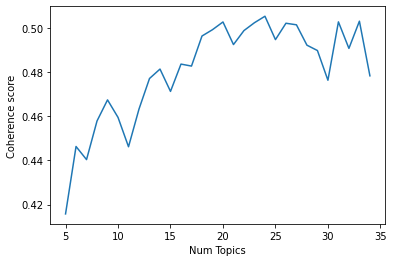

In [46]:
# Show graph
limit=35; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [47]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4158
Num Topics = 6 Coherence:  0.4463
Num Topics = 7 Coherence:  0.4404
Num Topics = 8 Coherence:  0.4579
Num Topics = 9 Coherence:  0.4674
Num Topics = 10 Coherence:  0.4595
Num Topics = 11 Coherence:  0.4462
Num Topics = 12 Coherence:  0.4633
Num Topics = 13 Coherence:  0.4771
Num Topics = 14 Coherence:  0.4814
Num Topics = 15 Coherence:  0.4713
Num Topics = 16 Coherence:  0.4836
Num Topics = 17 Coherence:  0.4827
Num Topics = 18 Coherence:  0.4963
Num Topics = 19 Coherence:  0.4992
Num Topics = 20 Coherence:  0.5027
Num Topics = 21 Coherence:  0.4925
Num Topics = 22 Coherence:  0.4988
Num Topics = 23 Coherence:  0.5024
Num Topics = 24 Coherence:  0.5053
Num Topics = 25 Coherence:  0.4947
Num Topics = 26 Coherence:  0.5021
Num Topics = 27 Coherence:  0.5014
Num Topics = 28 Coherence:  0.4922
Num Topics = 29 Coherence:  0.4898
Num Topics = 30 Coherence:  0.4763
Num Topics = 31 Coherence:  0.5028
Num Topics = 32 Coherence:  0.4907
Num Topics = 33 Coherence

In [48]:
# Coherence for 24-topic model
print(coherence_values[19])

# Topics for 24-topic model
malletModel_24 = model_list[19]
model_topics_24 = malletModel_24.show_topics(formatted=False)
pprint(sorted(malletModel_24.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA24 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_24)

# Visualize the topics
pyLDAvis.enable_notebook()
vis24 = pyLDAvis.gensim.prepare(MalletLDA24, corpus, id2word, sort_topics=False)
vis24

0.5052998916233874
[(1,
  '0.075*"hand" + 0.043*"give" + 0.038*"man" + 0.031*"eye" + 0.024*"meet" + '
  '0.023*"build" + 0.022*"hear" + 0.019*"begin" + 0.018*"stand" + '
  '0.017*"time"'),
 (2,
  '0.065*"give" + 0.045*"place" + 0.043*"church" + 0.031*"meet" + '
  '0.024*"remain" + 0.021*"visit" + 0.021*"follow" + 0.021*"attend" + '
  '0.019*"town" + 0.018*"day"'),
 (3,
  '0.087*"bring" + 0.024*"water" + 0.024*"tea" + 0.019*"thing" + 0.019*"pork" '
  '+ 0.017*"bread" + 0.014*"box" + 0.014*"supply" + 0.013*"buy" + 0.013*"set"'),
 (4,
  '0.059*"feel" + 0.040*"heart" + 0.037*"friend" + 0.036*"life" + '
  '0.035*"death" + 0.028*"die" + 0.024*"bear" + 0.022*"suffer" + '
  '0.020*"flower" + 0.015*"soul"'),
 (5,
  '0.053*"book" + 0.040*"write" + 0.040*"paper" + 0.032*"read" + 0.028*"send" '
  '+ 0.024*"copy" + 0.019*"work" + 0.017*"publish" + 0.016*"sell" + '
  '0.015*"term"'),
 (7,
  '0.109*"child" + 0.064*"girl" + 0.055*"boy" + 0.046*"hear" + 0.026*"give" + '
  '0.025*"learn" + 0.024*"fear" 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.101085  0.189739       1        1  4.002812
1     -0.174393  0.021026       2        1  3.981439
2     -0.182952 -0.099991       3        1  4.061429
3      0.118597 -0.042860       4        1  4.225234
4      0.015491  0.229899       5        1  4.160843
5      0.082006  0.226540       6        1  4.097469
6     -0.051393 -0.015144       7        1  4.082932
7     -0.157369  0.040150       8        1  4.026079
8     -0.046696 -0.033376       9        1  4.132432
9      0.053326  0.014764      10        1  4.010490
10    -0.037329 -0.043014      11        1  4.301649
11    -0.052014 -0.136949      12        1  4.182603
12     0.100951 -0.087906      13        1  4.094060
13    -0.090701  0.251169      14        1  4.197243
14    -0.104855 -0.028585      15        1  4.262145
15    -0.096636  0.042484      16        1  4.052302
16     0.155397 -0.009287      17        1  4.209142
17    -0.104518 -0.097938      18        1  4.285314
18     0.268732 -0.094924      19        1  4.858698
19    -0.137400 -0.129044      20        1  4.081112
20     0.013767  0.030424      21        1  4.059535
21     0.034859 -0.025254      22        1  4.144174
22     0.058594 -0.131262      23        1  4.113086
23     0.233449 -0.070661      24        1  4.377779, topic_info=            Term         Freq        Total Category  logprob  loglift
186         work  1133.000000  1133.000000  Default  30.0000  30.0000
654      country   873.000000   873.000000  Default  29.0000  29.0000
123         send   823.000000   823.000000  Default  28.0000  28.0000
26        letter   690.000000   690.000000  Default  27.0000  27.0000
260         time  1213.000000  1213.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
3483  employment    61.067408   149.056181  Topic24  -4.5669   2.2363
802         half    51.591431   118.460118  Topic24  -4.7355   2.2974
139          day   133.716565  1290.390841  Topic24  -3.7831   0.8617
270       person    75.807816   328.508816  Topic24  -4.3506   1.6623
171        house    76.860703   560.709821  Topic24  -4.3368   1.1414

[1839 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
188      15  0.995786      abide
3964      9  1.004833    absence
3217     17  0.938272     absent
2801     10  1.004366  abundance
717      16  0.995974    academy
...     ...       ...        ...
282       9  0.975070  yesterday
282      20  0.019119  yesterday
4721     19  0.976348       yoke
6385     10  0.983295       youe
1360      1  0.876472   yuletide

[2500 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [49]:
MalletLDA23.save('20240406_PhD_TopicLtrChkMAL23')
pyLDAvis.save_html(vis23, '20240406_PhD_TopicLtrChkMAL23.html')

In [50]:
MalletLDA24.save('20240406_PhD_TopicLtrMAL24')
pyLDAvis.save_html(vis24, '20240406_PhD_TopicLtrMAL24.html')